<span style="color: blue;font-weight: bold; font-size: 40px;">PyCaret: ISBSG-SDV Data Analysis & Regression </span>


In [1]:
# <span style="color: blue;">ISBSG Data Analysis & Regression</span>


In [2]:
import sys

print(sys.executable)

C:\Users\jdche\.conda\envs\pycaret311\python.exe


In [3]:
# # ISBSG Data Analysis and Regression Modeling
# 
# This notebook performs data cleaning, preprocessing, and regression modeling on the ISBSG dataset.

# ## Setup and Environment Configuration

# Install required packages (uncomment if needed)
#!pip install -r "../requirements.txt" --only-binary=all

In [4]:
# Import basic libraries
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pycaret
from datetime import datetime
import re
import seaborn as sns
import sklearn
import shap

In [37]:
# Define the foler path
models_folder = '../models'
config_folder = '../config'
skeleton_models_folder = '../skeleton_models'
plots_folder = '../plots'
temp_folder = '../temp'
data_folder = '../data'
logs_folder = '../logs'
sample_file = 'sample_clean_a_agile_only_cleaned_no_add.csv'
data_file = 'synthetic_ISBSG2016R1_1_agile_SDV_generated.csv'

# Identify target column
TARGET_COL = 'project_prf_normalised_work_effort'
print(f"\nTarget variable: '{TARGET_COL}'")


Target variable: 'project_prf_normalised_work_effort'
Cell executed at: 2025-06-05 14:52:37.783399


<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Data Profiling
- [Part 4](#part4)- Module Building with PyCaret
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End


In [6]:
# Configure timestamp callback for Jupyter cells
from IPython import get_ipython

def setup_timestamp_callback():
    """Setup a timestamp callback for Jupyter cells without clearing existing callbacks."""
    ip = get_ipython()
    if ip is not None:
        # Define timestamp function
        def print_timestamp(*args, **kwargs):
            """Print timestamp after cell execution."""
            print(f"Cell executed at: {datetime.now()}")
        
        # Check if our callback is already registered
        callbacks = ip.events.callbacks.get('post_run_cell', [])
        for cb in callbacks:
            if hasattr(cb, '__name__') and cb.__name__ == 'print_timestamp':
                # Already registered
                return
                
        # Register new callback if not already present
        ip.events.register('post_run_cell', print_timestamp)
        print("Timestamp printing activated.")
    else:
        print("Not running in IPython/Jupyter environment.")

# Setup timestamp callback
setup_timestamp_callback()

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Timestamp printing activated.
Cell executed at: 2025-06-05 12:25:44.403269


[Back to top](#Index:)

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [7]:
# Load the data

from pathlib import Path

print("Loading data...")

file_path = f"{data_folder}/{data_file}"  #should use data_file
file_name_no_ext = Path(file_path).stem                
print(file_name_no_ext)


df = pd.read_csv(file_path)


Loading data...
synthetic_ISBSG2016R1_1_agile_SDV_generated
Cell executed at: 2025-06-05 12:25:44.573916


# Exploratory Data Analysis

## Data Overview

Dataset shape: (10000, 159)
First 5 rows:


isbsg_project_id  project_prf_year_of_project external_eef_industry_sector  \
0             26702                         2014                manufacturing   
1             32668                         2015        medical & health care   
2             24373                         2015                    insurance   
3             12390                         2015        medical & health care   
4             32718                         2014        medical & health care   

  tech_tf_primary_programming_language  project_prf_functional_size  \
0                                 pl/i                          306   
1                               siebel                           18   
2                                 pl/i                           97   
3                                 java                          254   
4                                 java                           92   

   project_prf_normalised_work_effort_level_1  \
0                                         709   
1                                        3192   
2                                        5408   
3                                        3612   
4                                        8118   

   project_prf_normalised_work_effort  project_prf_normalised_level_1_pdr_ufp  \
0                                 405                               11.136001   
1                                1604                               46.664330   
2                                5508                              118.617650   
3                                7612                               63.244305   
4                                8748                              100.224820   

   project_prf_normalised_pdr_ufp  project_prf_speed_of_delivery  ...  \
0                        9.700681                      98.513860  ...   
1                       47.643230                       7.555258  ...   
2                      129.114530                       1.987838  ...   
3                       45.649982                      37.364906  ...   
4                      102.044640                      24.796750  ...   

   project_prf_development_type_not_defined  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

  tech_tf_development_platform_hand_held  project_prf_relative_size_xxxl  \
0                                  False                           False   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                           False   

  tech_tf_architecture_multi_tier_client_server  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   tech_tf_client_server_not_applicable  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

  tech_tf_type_of_server_proprietary_midrange  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

  project_prf_application_type_top_transaction/production system  \
0                                                NaN               
1                                                NaN               
2                                                NaN           

Last 5 rows:


isbsg_project_id  project_prf_year_of_project  \
9995             12729                         2008   
9996             31166                         2006   
9997             17234                         2015   
9998             21881                         2000   
9999             20341                         2012   

     external_eef_industry_sector tech_tf_primary_programming_language  \
9995                    financial                                 pl/i   
9996                       mining                               c_lang   
9997                    insurance                                 java   
9998                   government                                 pl/i   
9999                   government                               c_lang   

      project_prf_functional_size  project_prf_normalised_work_effort_level_1  \
9995                          194                                        9105   
9996                          332                                        5123   
9997                          105                                        3787   
9998                           77                                        3673   
9999                          199                                        6229   

      project_prf_normalised_work_effort  \
9995                               14330   
9996                                9899   
9997                                1917   
9998                                4698   
9999                                2500   

      project_prf_normalised_level_1_pdr_ufp  project_prf_normalised_pdr_ufp  \
9995                              106.244410                      112.878200   
9996                                5.276229                        6.450372   
9997                               40.845215                       27.973942   
9998                              123.681550                      112.222520   
9999                               16.686850                        8.098407   

      project_prf_speed_of_delivery  ...  \
9995                       5.766078  ...   
9996                      39.327496  ...   
9997                      15.762124  ...   
9998                       1.232115  ...   
9999                      37.300655  ...   

      project_prf_development_type_not_defined  \
9995                                     False   
9996                                     False   
9997                                     False   
9998                                     False   
9999                                     False   

     tech_tf_development_platform_hand_held  project_prf_relative_size_xxxl  \
9995                                  False                           False   
9996                                  False                           False   
9997                                  False                           False   
9998                                  False                           False   
9999                                  False                           False   

     tech_tf_architecture_multi_tier_client_server  \
9995                                         False   
9996                                         False   
9997                                         False   
9998                                         False   
9999                                         False   

      tech_tf_client_server_not_applicable  \
9995                                 False   
9996                                 False   
9997                                 False   
9998                                 False   
9999                                 False   

     tech_tf_type_of_server_proprietary_midrange  \
9995                                       False   
9996                                       False   
9997                                       False   
9998                                       False   
9999                                       False   

     project_prf_application_type_top_tra

## Duplicate Rows

Number of duplicate rows: 0


## Data Types and Memory Usage

Data Type  Memory Usage (MB)
Index                                         NaN           0.000126
external_eef_data_quality_rating_a           bool           0.009537
external_eef_data_quality_rating_b           bool           0.009537
external_eef_data_quality_rating_c_lang      bool           0.009537
external_eef_data_quality_rating_d           bool           0.009537
...                                           ...                ...
tech_tf_type_of_server_standalone            bool           0.009537
tech_tf_type_of_server_unix                  bool           0.009537
tech_tf_type_of_server_webserver             bool           0.009537
tech_tf_web_development_nan                  bool           0.009537
tech_tf_web_development_web                  bool           0.009537

[160 rows x 2 columns]

## Unique Values Per Column

isbsg_project_id: 3571 unique values
project_prf_year_of_project: 27 unique values
external_eef_industry_sector: 16 unique values
tech_tf_primary_programming_language: 73 unique values
project_prf_functional_size: 1087 unique values
project_prf_normalised_work_effort_level_1: 5612 unique values
project_prf_normalised_work_effort: 5738 unique values
project_prf_normalised_level_1_pdr_ufp: 10000 unique values
project_prf_normalised_pdr_ufp: 10000 unique values
project_prf_speed_of_delivery: 9999 unique values
project_prf_project_elapsed_time: 9999 unique values
project_prf_team_size_group: 15 unique values
project_prf_max_team_size: 9999 unique values
process_pmf_development_methodologies: 1 unique values
process_pmf_docs: 21 unique values
tech_tf_client_roles: 2 unique values
tech_tf_server_roles: 71 unique values
tech_tf_tools_used: 11 unique values
project_prf_cost_currency: 1 unique values
project_prf_application_group_business_application: 2 unique values
project_prf_application_gro

## Type Conversion Suggestions

Consider converting to 'category' dtype for memory/performance:
['external_eef_industry_sector', 'tech_tf_primary_programming_language', 'project_prf_team_size_group', 'process_pmf_development_methodologies', 'tech_tf_client_roles', 'tech_tf_server_roles', 'project_prf_cost_currency', 'tech_tf_clientserver_description', 'tech_tf_development_platform_hand_held']


## Summary Statistics

## Missing Values

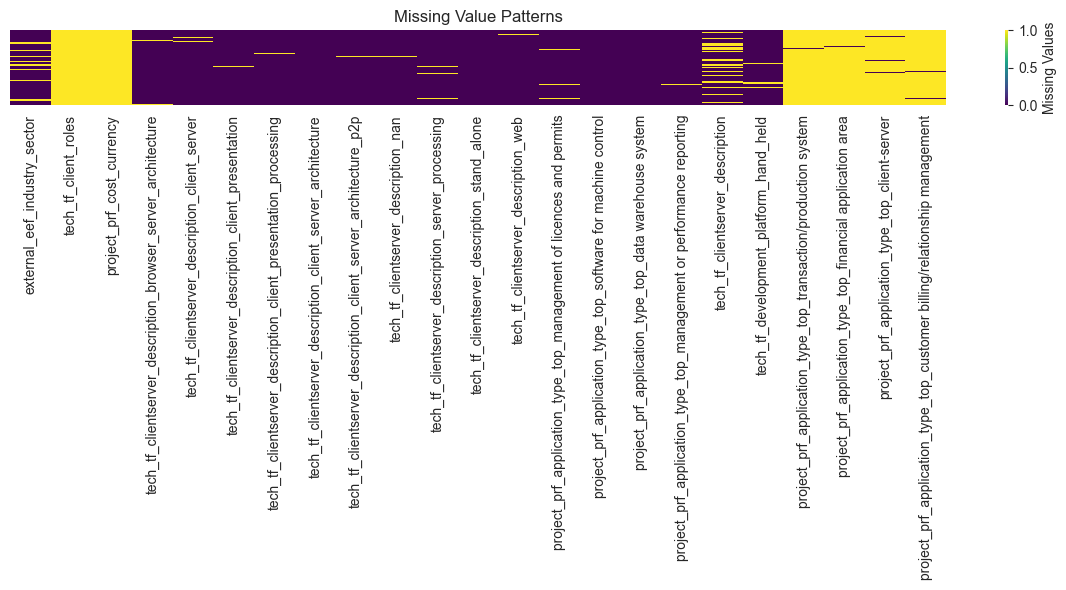

## Distribution of Numerical Features

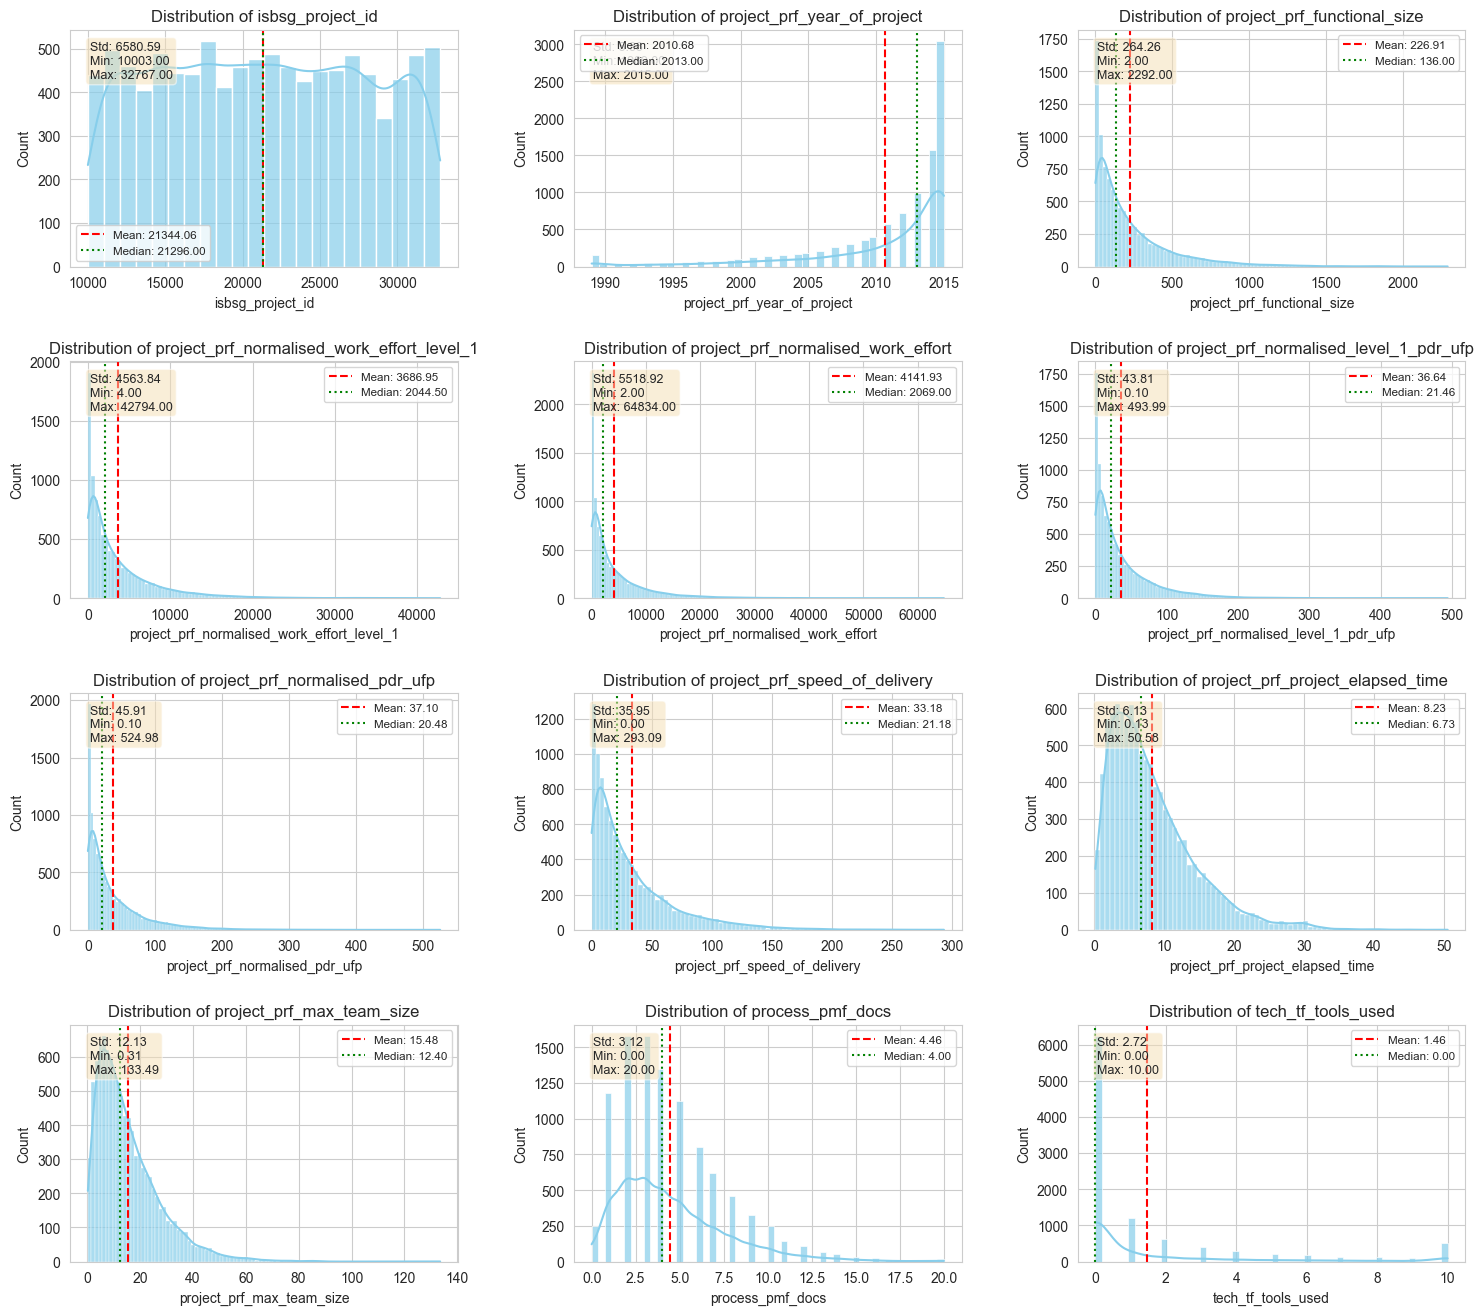

## Correlation Matrix

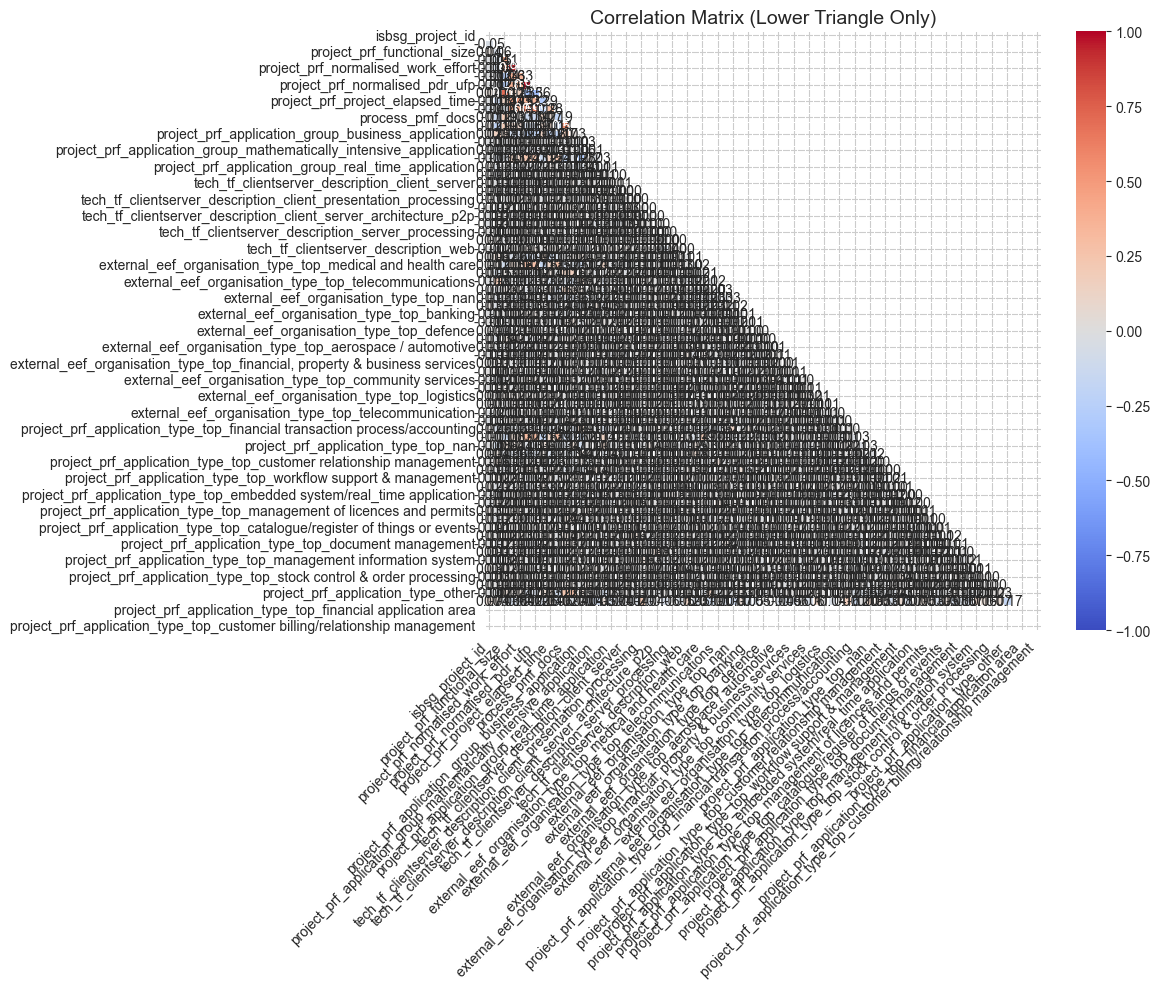

## Top Correlations

project_prf_normalised_level_1_pdr_ufp — project_prf_normalised_pdr_ufp: 0.98
project_prf_normalised_pdr_ufp — project_prf_normalised_level_1_pdr_ufp: 0.98
project_prf_normalised_work_effort — project_prf_normalised_work_effort_level_1: 0.93
project_prf_normalised_work_effort_level_1 — project_prf_normalised_work_effort: 0.93
project_prf_functional_size — project_prf_speed_of_delivery: 0.70
project_prf_speed_of_delivery — project_prf_functional_size: 0.70
project_prf_max_team_size — project_prf_normalised_pdr_ufp: 0.59
project_prf_normalised_level_1_pdr_ufp — project_prf_max_team_size: 0.59
project_prf_max_team_size — project_prf_normalised_level_1_pdr_ufp: 0.59
project_prf_normalised_pdr_ufp — project_prf_max_team_size: 0.59
tech_tf_tools_used — process_pmf_docs: 0.56
process_pmf_docs — tech_tf_tools_used: 0.56
project_prf_normalised_work_effort — project_prf_functional_size: 0.46
project_prf_functional_size — project_prf_normalised_work_effort: 0.46
project_prf_normalised_work_effort

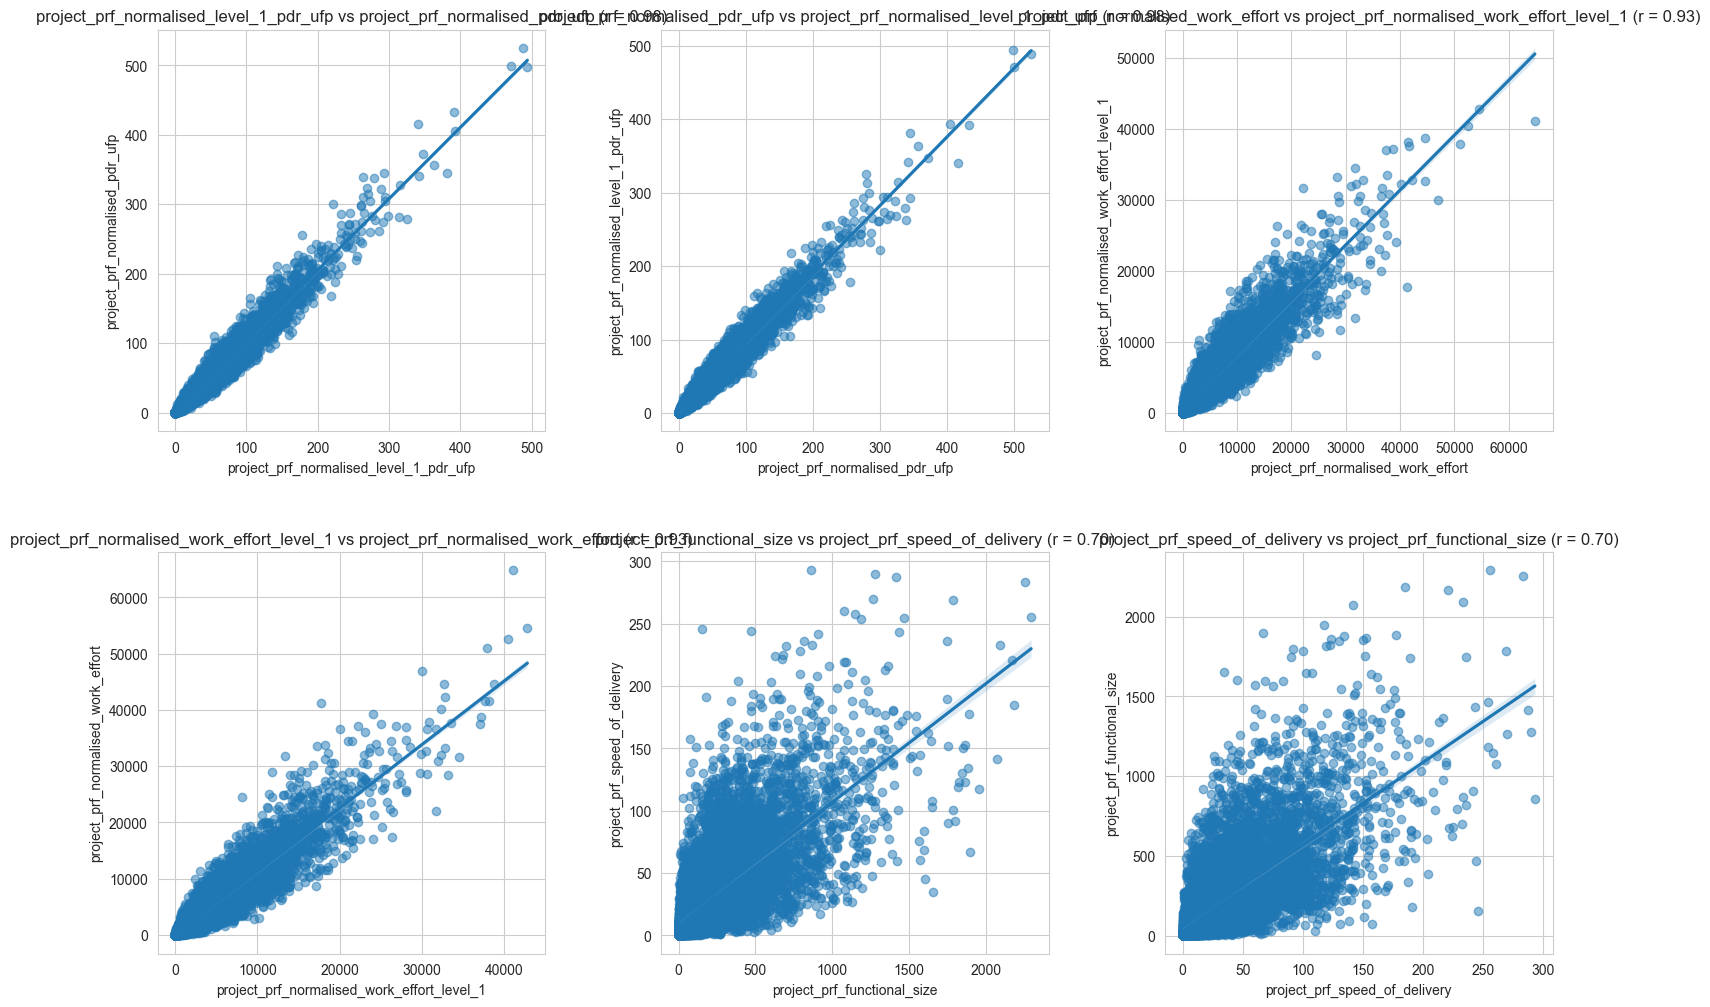

## Categorical Features

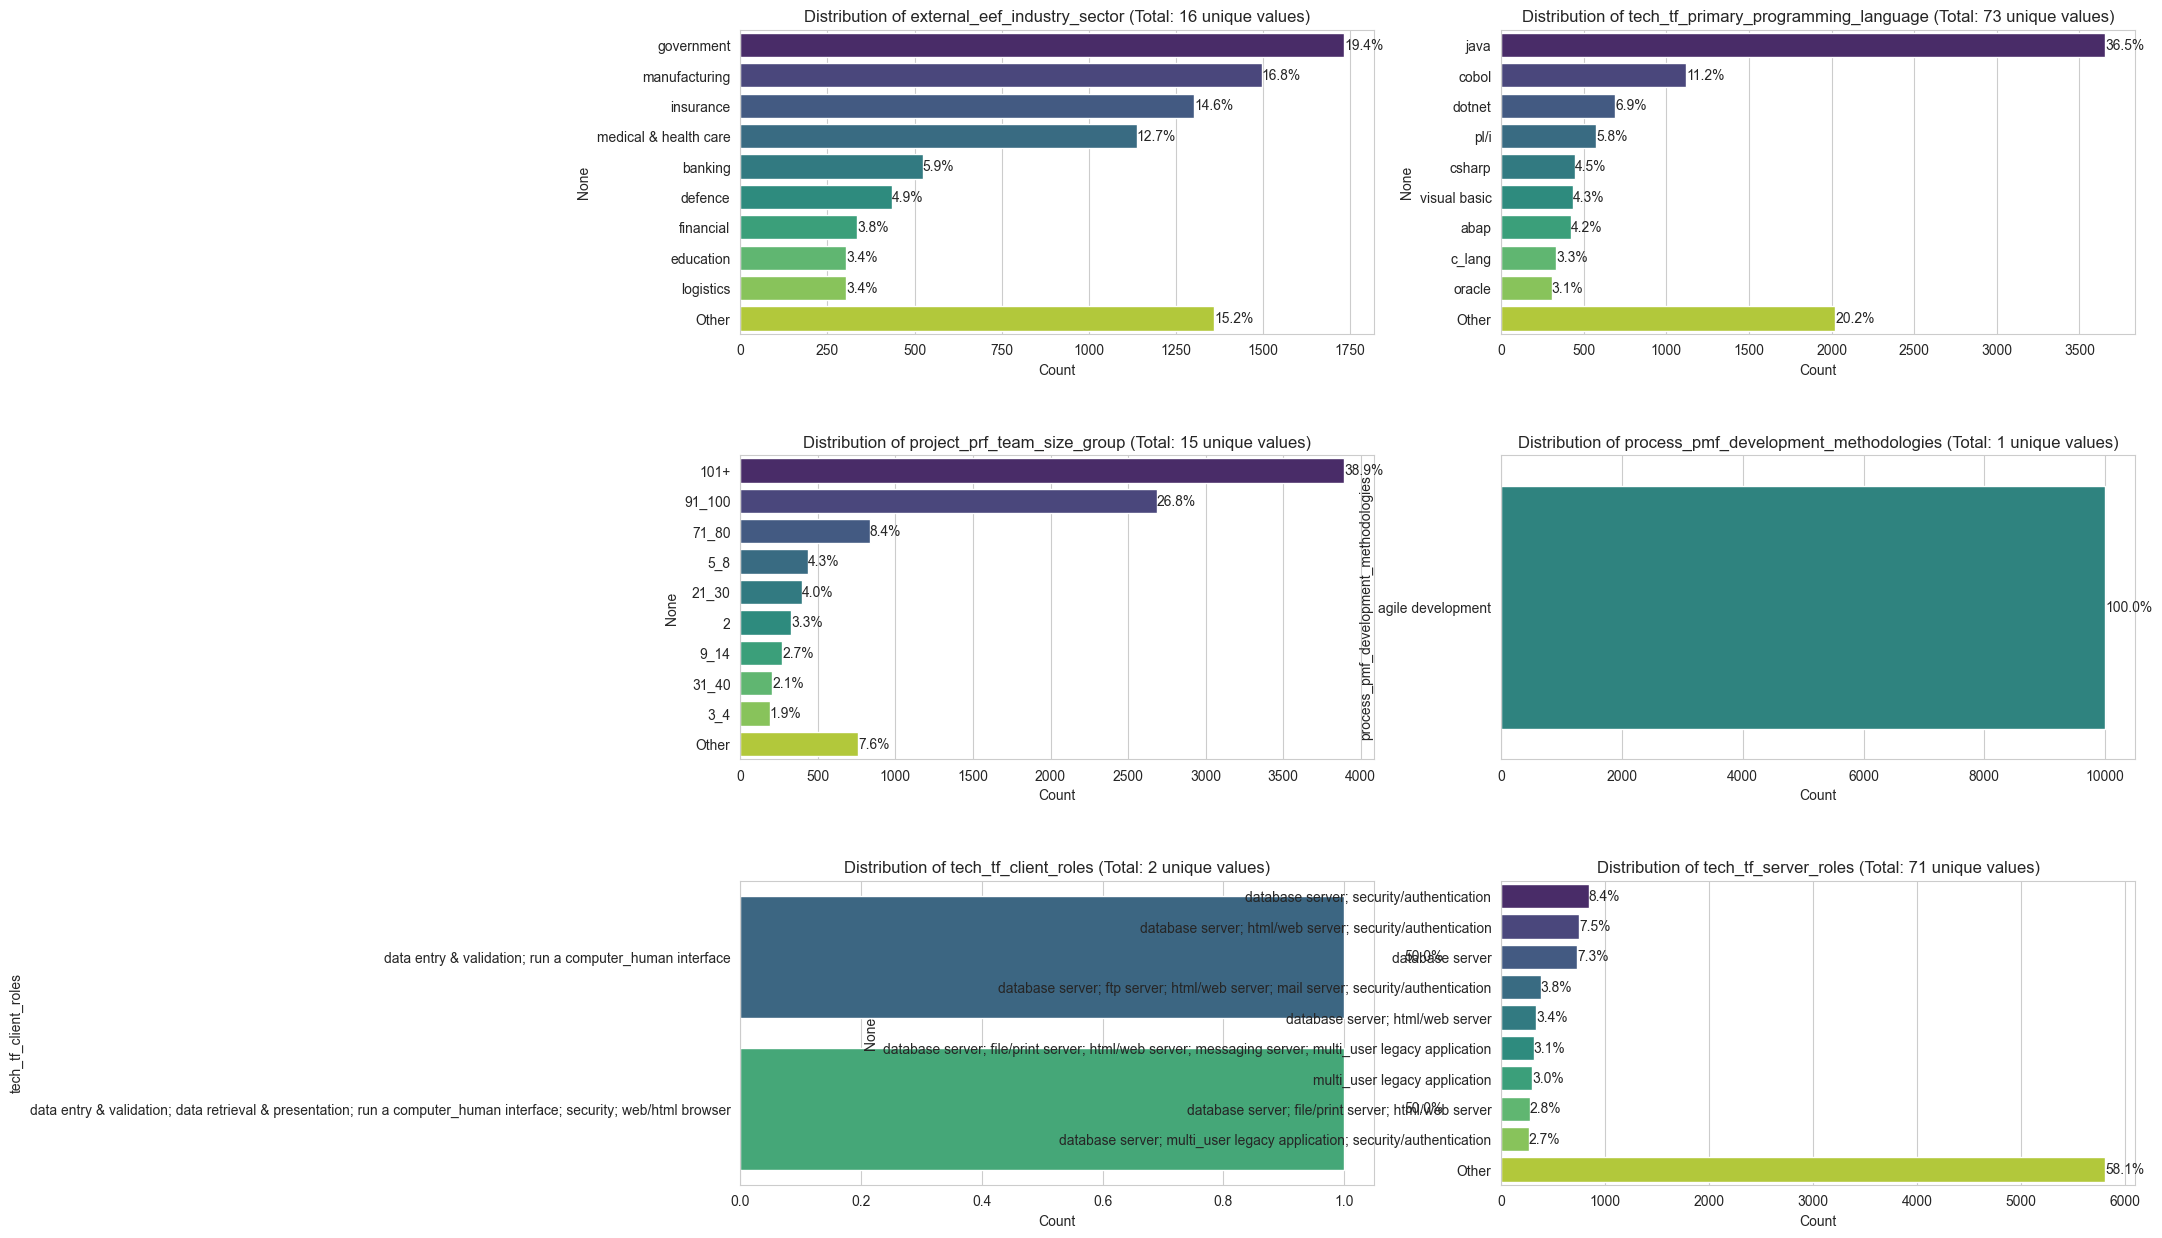

## Categorical-Numerical Relationships

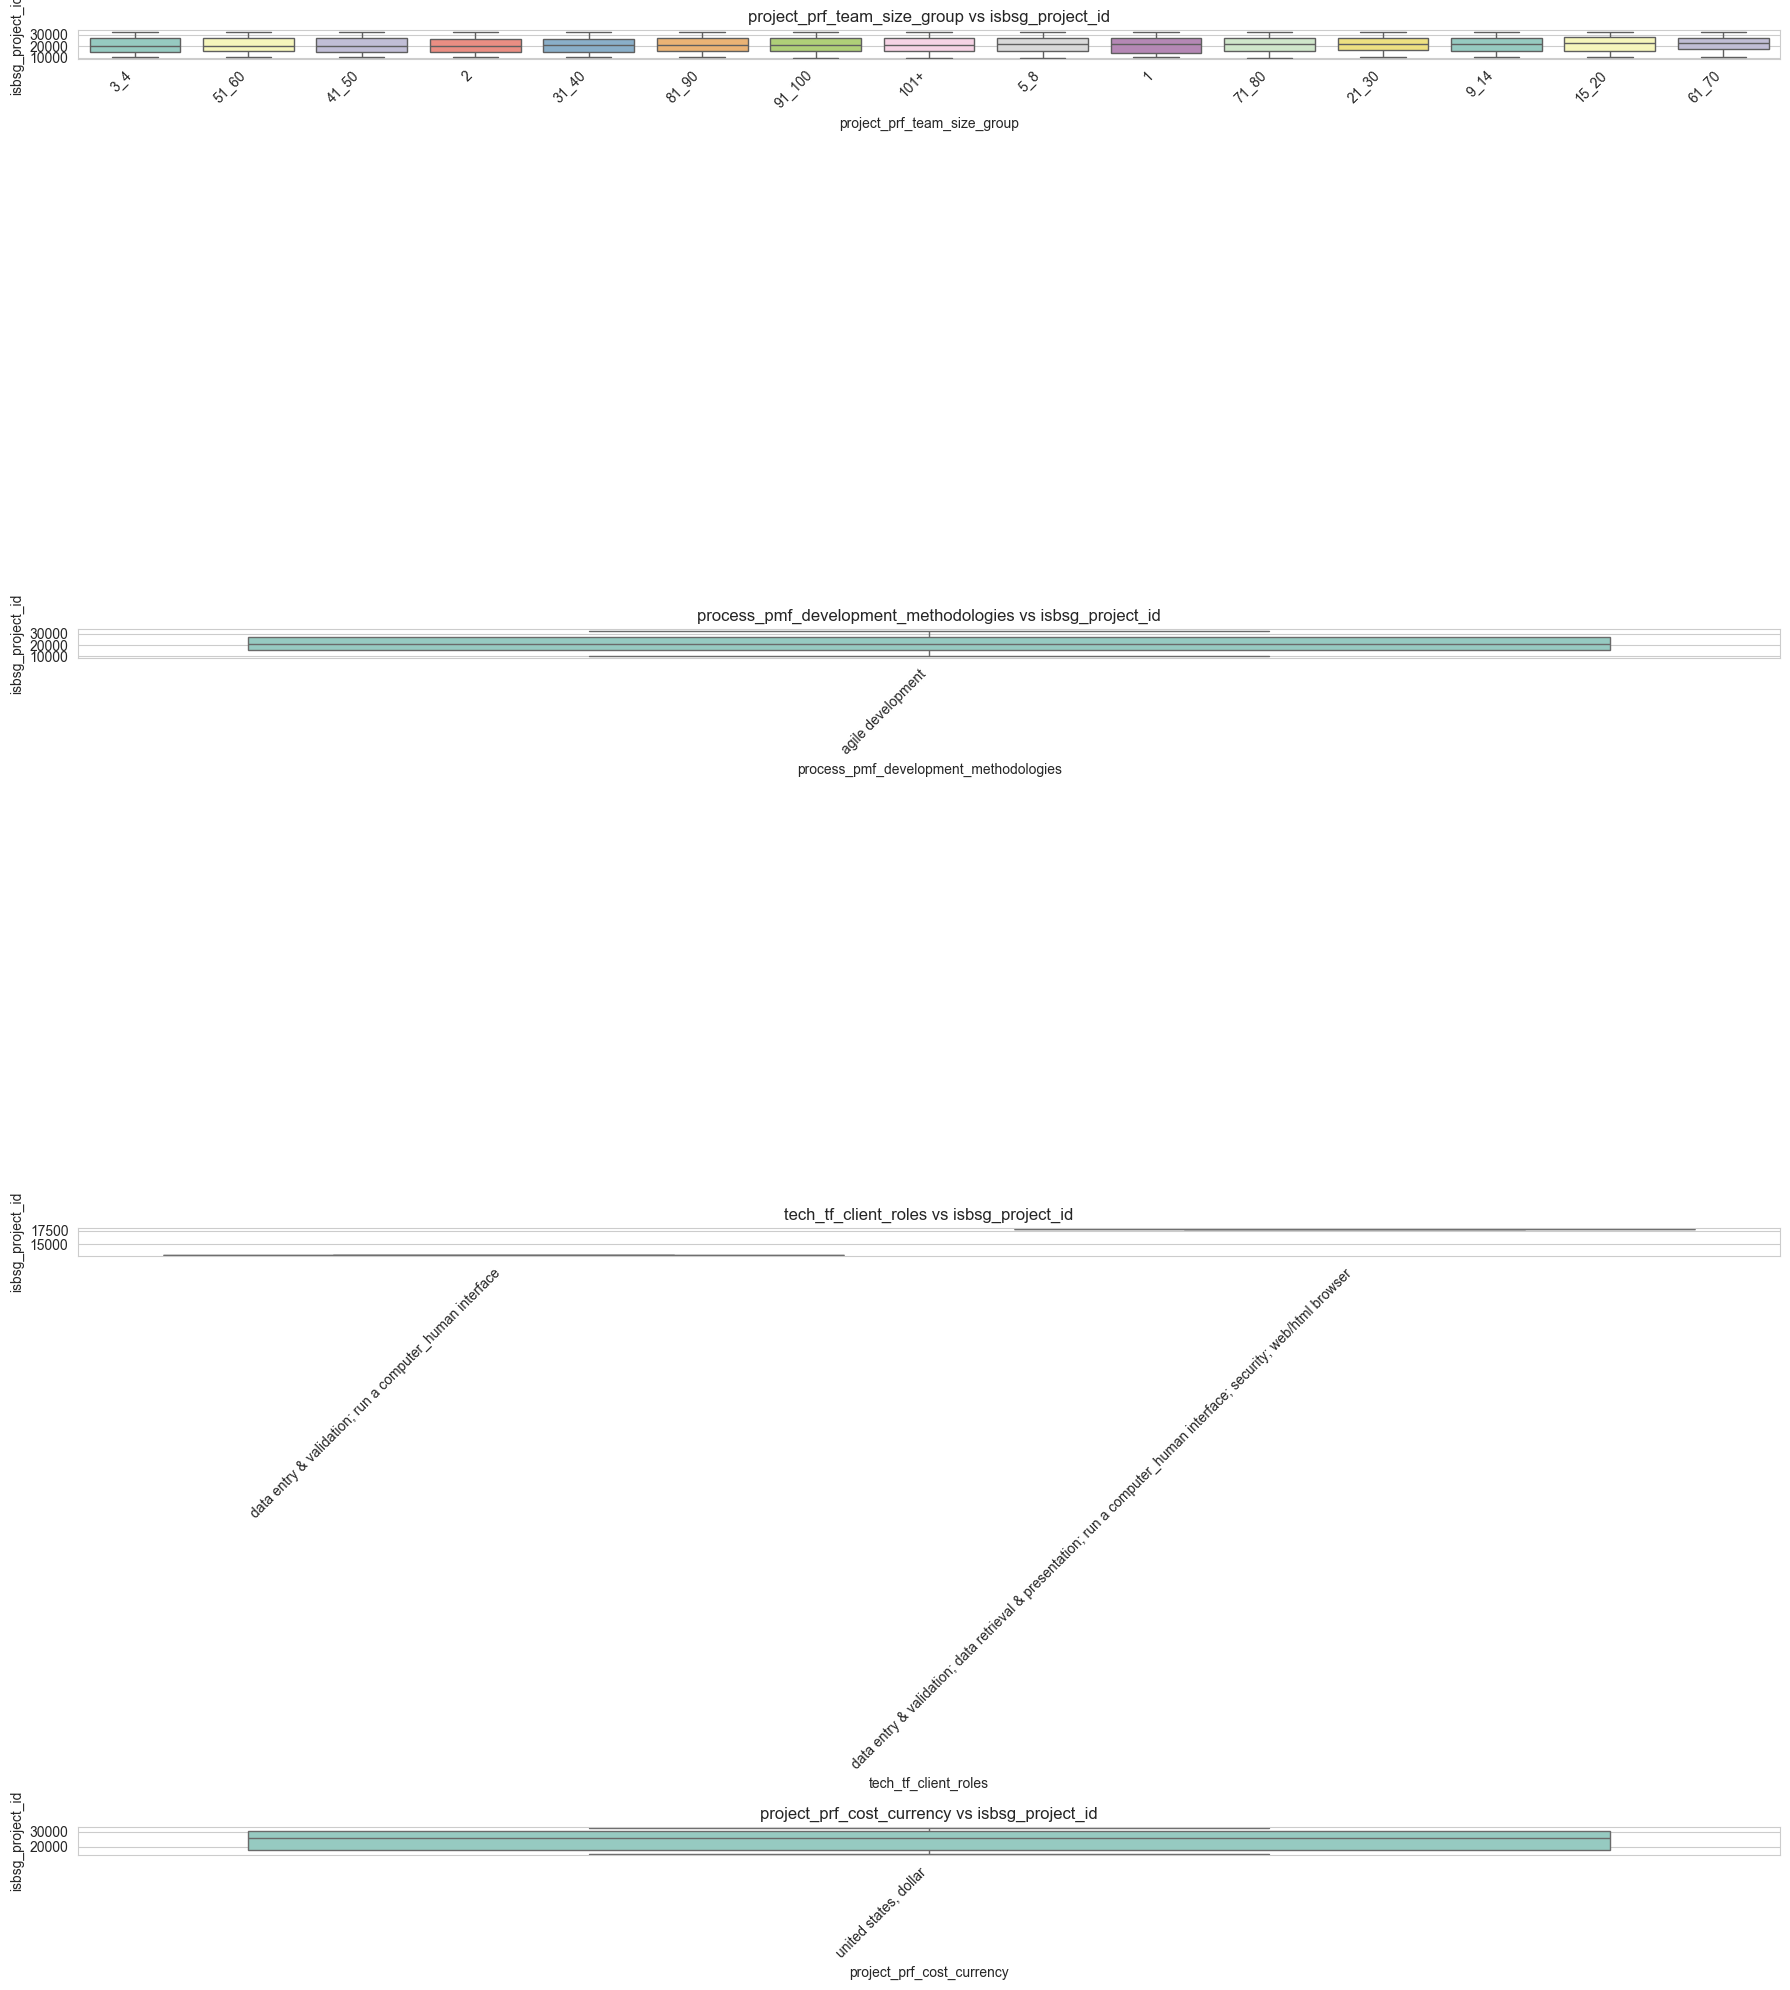

Cell executed at: 2025-06-05 12:26:02.761180


In [8]:
def display_header(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"# {text}"))
    except ImportError:
        print(f"\n=== {text} ===\n")

def display_subheader(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"## {text}"))
    except ImportError:
        print(f"\n-- {text} --\n")

def explore_data(df: pd.DataFrame) -> None:
    """
    Perform exploratory data analysis on the input DataFrame with nicely aligned plots.
    Args:
        df: Input DataFrame
    """
    from IPython.display import display

    display_header("Exploratory Data Analysis")
    
    # Data Overview
    display_subheader("Data Overview")
    print(f"Dataset shape: {df.shape}")
    if df.shape[0] > 20:
        print("First 5 rows:")
        display(df.head())
        print("Last 5 rows:")
        display(df.tail())
    else:
        display(df)
    
    # Duplicate Row Checking
    display_subheader("Duplicate Rows")
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Data Types and Memory Usage
    display_subheader("Data Types and Memory Usage")
    dtype_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Memory Usage (MB)': df.memory_usage(deep=True) / 1024 / 1024
    })
    display(dtype_info)
    
    # Unique Values Per Column
    display_subheader("Unique Values Per Column")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    
    # Type Conversion Suggestions
    display_subheader("Type Conversion Suggestions")
    potential_cat = [
        col for col in df.select_dtypes(include=['object']).columns
        if df[col].nunique() < max(30, 0.05*df.shape[0])
    ]
    if potential_cat:
        print("Consider converting to 'category' dtype for memory/performance:")
        print(potential_cat)
    else:
        print("No obvious candidates for 'category' dtype conversion.")
    
    # Summary Statistics
    display_subheader("Summary Statistics")
    try:
        display(df.describe(include='all').T.style.background_gradient(cmap='Blues', axis=1))
    except Exception:
        display(df.describe(include='all').T)
    
    # Missing Values
    display_subheader("Missing Values")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent.round(2)
    })
    if missing.sum() > 0:
        display(missing_info[missing_info['Missing Values'] > 0]
                .sort_values('Missing Values', ascending=False)
                .style.background_gradient(cmap='Reds'))
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        cols_with_missing = missing_info[missing_info['Missing Values'] > 0].index
        if len(cols_with_missing) > 0:
            sns.heatmap(df[cols_with_missing].isnull(), 
                        cmap='viridis', 
                        yticklabels=False, 
                        cbar_kws={'label': 'Missing Values'})
            plt.title('Missing Value Patterns')
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values in the dataset.")
    
    # Numerical Distributions
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if len(numerical_cols) > 0:
        display_subheader("Distribution of Numerical Features")
        sample_cols = numerical_cols[:min(12, len(numerical_cols))]
        num_cols = len(sample_cols)
        num_rows = (num_cols + 2) // 3  # 3 plots per row, rounded up
        fig = plt.figure(figsize=(18, num_rows * 4))
        grid = plt.GridSpec(num_rows, 3, figure=fig, hspace=0.4, wspace=0.3)
        for i, col in enumerate(sample_cols):
            row, col_pos = divmod(i, 3)
            ax = fig.add_subplot(grid[row, col_pos])
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue', alpha=0.7)
            mean_val = df[col].mean()
            median_val = df[col].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
            stats_text = (f"Std: {df[col].std():.2f}\n"
                          f"Min: {df[col].min():.2f}\n"
                          f"Max: {df[col].max():.2f}")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
                    verticalalignment='top', bbox=props)
            ax.set_title(f'Distribution of {col}')
            ax.legend(fontsize='small')
        plt.tight_layout()
        plt.show()
        # Correlation matrix and top correlations
        if len(numerical_cols) > 1:
            display_subheader("Correlation Matrix")
            corr = df[numerical_cols].corr().round(2)
            mask = np.triu(np.ones_like(corr, dtype=bool))
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
                        fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, 
                        annot_kws={"size": 10})
            plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
            # Top correlations
            if len(numerical_cols) > 5:
                corr_unstack = corr.unstack()
                corr_abs = corr_unstack.apply(abs)
                corr_abs = corr_abs[corr_abs < 1.0]
                highest_corrs = corr_abs.sort_values(ascending=False).head(15)
                display_subheader("Top Correlations")
                for (col1, col2), corr_val in highest_corrs.items():
                    actual_val = corr.loc[col1, col2]
                    print(f"{col1} — {col2}: {actual_val:.2f}")
                pairs_to_plot = [(idx[0], idx[1]) for idx in highest_corrs.index][:6]
                if pairs_to_plot:
                    fig = plt.figure(figsize=(18, 12))
                    grid = plt.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
                    for i, (col1, col2) in enumerate(pairs_to_plot):
                        row, col_pos = divmod(i, 3)
                        ax = fig.add_subplot(grid[row, col_pos])
                        sns.regplot(x=df[col1], y=df[col2], ax=ax, scatter_kws={'alpha':0.5})
                        r_value = df[col1].corr(df[col2])
                        ax.set_title(f'{col1} vs {col2} (r = {r_value:.2f})')
                    plt.tight_layout()
                    plt.show()
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(categorical_cols) > 0:
        display_subheader("Categorical Features")
        sample_cat_cols = categorical_cols[:min(6, len(categorical_cols))]
        num_cat_cols = len(sample_cat_cols)
        num_cat_rows = (num_cat_cols + 1) // 2
        fig = plt.figure(figsize=(18, num_cat_rows * 5))
        grid = plt.GridSpec(num_cat_rows, 2, figure=fig, hspace=0.4, wspace=0.2)
        for i, col in enumerate(sample_cat_cols):
            row, col_pos = divmod(i, 2)
            ax = fig.add_subplot(grid[row, col_pos])
            value_counts = df[col].value_counts().sort_values(ascending=False)
            top_n = min(10, len(value_counts))
            if len(value_counts) > top_n:
                top_values = value_counts.head(top_n-1)
                other_count = value_counts.iloc[top_n-1:].sum()
                plot_data = pd.concat([top_values, pd.Series({'Other': other_count})])
            else:
                plot_data = value_counts
            sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {col} (Total: {len(value_counts)} unique values)')
            ax.set_xlabel('Count')
            total = plot_data.sum()
            for j, v in enumerate(plot_data.values):
                percentage = v / total * 100
                ax.text(v + 0.1, j, f'{percentage:.1f}%', va='center')
        plt.tight_layout()
        plt.show()
        # Categorical-numerical boxplots
        if numerical_cols and len(categorical_cols) > 0:
            display_subheader("Categorical-Numerical Relationships")
            numerical_variances = df[numerical_cols].var()
            target_numerical = numerical_variances.idxmax()
            sample_cat_for_box = [col for col in categorical_cols 
                                  if df[col].nunique() <= 15][:4]
            if sample_cat_for_box:
                fig = plt.figure(figsize=(18, 5 * len(sample_cat_for_box)))
                for i, cat_col in enumerate(sample_cat_for_box):
                    ax = fig.add_subplot(len(sample_cat_for_box), 1, i+1)
                    order = df.groupby(cat_col)[target_numerical].median().sort_values().index
                    sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax, 
                                order=order, palette='Set3')
                    ax.set_title(f'{cat_col} vs {target_numerical}')
                    ax.set_xlabel(cat_col)
                    ax.set_ylabel(target_numerical)
                    plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

# Exploratory Data Analysis
explore_data(df)


[Back to top](#Index:)

<a id='#part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [9]:
# Analyse missing values
print("\nAnalysing missing values...")
missing_pct = df.isnull().mean() * 100
missing_sorted = missing_pct.sort_values(ascending=False)
print("Top 10 columns with highest missing percentages:")
print(missing_sorted)


Analysing missing values...
Top 10 columns with highest missing percentages:
tech_tf_client_roles                                              99.98
project_prf_cost_currency                                         99.94
project_prf_application_type_top_transaction/production system    98.61
project_prf_application_type_top_financial application area       98.12
project_prf_application_type_top_client-server                    98.04
                                                                  ...  
project_prf_relative_size_xs                                       0.00
project_prf_relative_size_xxl                                      0.00
project_prf_relative_size_xxs                                      0.00
project_prf_case_tool_used_don_t_know                              0.00
tech_tf_client_server_nan                                          0.00
Length: 159, dtype: float64
Cell executed at: 2025-06-05 12:26:02.782454


In [10]:
# Identify columns with high missing values (>70%)
high_missing_cols = missing_pct[missing_pct > 70].index.tolist()
print(f"\nColumns with >70% missing values ({len(high_missing_cols)} columns):")
for col in high_missing_cols[:]:  # Show first 5
    print(f"  - {col}: {missing_pct[col]:.2f}% missing")
if len(high_missing_cols) > 5:
    print(f"  - ... and {len(high_missing_cols) - 5} more columns")

print(f"Columns are: {list(df.columns)}")


Columns with >70% missing values (6 columns):
  - tech_tf_client_roles: 99.98% missing
  - project_prf_cost_currency: 99.94% missing
  - project_prf_application_type_top_transaction/production system: 98.61% missing
  - project_prf_application_type_top_financial application area: 98.12% missing
  - project_prf_application_type_top_client-server: 98.04% missing
  - project_prf_application_type_top_customer billing/relationship management: 97.80% missing
  - ... and 1 more columns
Columns are: ['isbsg_project_id', 'project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_project_elapsed_time', 'project_prf_team_size_group', 'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs

In [11]:
# Create a clean dataframe by dropping high-missing columns

cols_to_keep = ['project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 
                'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_team_size_group', 
                'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_client_roles', 
                'tech_tf_server_roles', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 
                'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 
                'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 
                'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 
                'tech_tf_clientserver_description_client_presentation', 'tech_tf_clientserver_description_client_presentation_processing', 
                'tech_tf_clientserver_description_client_server_architecture', 'tech_tf_clientserver_description_client_server_architecture_p2p', 
                'tech_tf_clientserver_description_nan', 'tech_tf_clientserver_description_server_processing', 
                'tech_tf_clientserver_description_stand_alone', 'tech_tf_clientserver_description_web', 'project_prf_development_type_enhancement', 
                'project_prf_development_type_new_development', 'project_prf_development_type_other', 'project_prf_development_type_poc', 
                'project_prf_development_type_porting', 'project_prf_development_type_re_development', 'tech_tf_development_platform_mf', 
                'tech_tf_development_platform_mr', 'tech_tf_development_platform_multi', 'tech_tf_development_platform_nan', 
                'tech_tf_development_platform_pc', 'tech_tf_development_platform_proprietary', 'tech_tf_language_type_2gl', 
                'tech_tf_language_type_3gl', 'tech_tf_language_type_4gl', 'tech_tf_language_type_5gl', 'tech_tf_language_type_apg', 
                'tech_tf_language_type_nan', 'project_prf_relative_size_l', 'project_prf_relative_size_m1', 'project_prf_relative_size_m2', 
                'project_prf_relative_size_nan', 'project_prf_relative_size_s', 'project_prf_relative_size_xl', 'project_prf_relative_size_xs', 
                'project_prf_relative_size_xxl', 'project_prf_relative_size_xxs', 'project_prf_case_tool_used_don_t_know', 
                'project_prf_case_tool_used_nan', 'project_prf_case_tool_used_no', 'project_prf_case_tool_used_yes', 
                'process_pmf_prototyping_used_nan', 'process_pmf_prototyping_used_yes', 'tech_tf_architecture_client_server', 
                'tech_tf_architecture_multi_tier', 'tech_tf_architecture_multi_tier_with_web_interface', 
                'tech_tf_architecture_multi_tier_with_web_public_interface', 'tech_tf_architecture_nan', 'tech_tf_architecture_stand_alone', 
                'tech_tf_architecture_standalone', 'tech_tf_client_server_don_t_know', 'tech_tf_client_server_nan', 'tech_tf_client_server_no', 
                'tech_tf_client_server_yes', 'tech_tf_type_of_server_back_end', 'tech_tf_type_of_server_client_server', 
                'tech_tf_type_of_server_lan_based', 'tech_tf_type_of_server_mainframe', 
                'tech_tf_type_of_server_multi_tier_with_web_public_interface', 'tech_tf_type_of_server_nan', 'tech_tf_type_of_server_standalone', 
                'tech_tf_type_of_server_unix', 'tech_tf_type_of_server_webserver', 'tech_tf_web_development_nan', 'tech_tf_web_development_web', 
                'tech_tf_dbms_used_nan', 'tech_tf_dbms_used_no', 'tech_tf_dbms_used_yes', 'people_prf_project_user_involvement_best', 
                'people_prf_project_user_involvement_don_t_know', 'people_prf_project_user_involvement_low', 
                'people_prf_project_user_involvement_nan', 'people_prf_project_user_involvement_no', 'people_prf_project_user_involvement_yes', 
                'external_eef_organisation_type_top_insurance', 'external_eef_organisation_type_top_medical and health care', 
                'external_eef_organisation_type_top_manufacturing', 'external_eef_organisation_type_top_telecommunications', 
                'external_eef_organisation_type_top_government', 'external_eef_organisation_type_top_nan', 
                'external_eef_organisation_type_top_communications', 'external_eef_organisation_type_top_banking', 
                'external_eef_organisation_type_top_computers & software', 'external_eef_organisation_type_top_defence', 
                'external_eef_organisation_type_top_public administration', 'external_eef_organisation_type_top_aerospace / automotive', 
                'external_eef_organisation_type_top_transport & storage', 
                'external_eef_organisation_type_top_financial, property & business services', 
                'external_eef_organisation_type_top_education institution', 'external_eef_organisation_type_top_community services', 
                'external_eef_organisation_type_top_electricity, gas, water', 'external_eef_organisation_type_top_logistics', 
                'external_eef_organisation_type_top_wholesale & retail trade', 'external_eef_organisation_type_top_telecommunication', 
                'external_eef_organisation_type_other', 'project_prf_application_type_top_financial transaction process/accounting', 
                'project_prf_application_type_top_not recorded', 'project_prf_application_type_top_nan', 'project_prf_application_type_top_unknown', 
                'project_prf_application_type_top_customer relationship management', 'project_prf_application_type_top_relatively complex application',
                'project_prf_application_type_top_workflow support & management', 'project_prf_application_type_top_business application', 
                'project_prf_application_type_top_embedded system/real_time application', 'project_prf_application_type_top_online. esales', 
                'project_prf_application_type_top_management of licences and permits', 
                'project_prf_application_type_top_online analysis and reporting', 
                'project_prf_application_type_top_catalogue/register of things or events', 
                'project_prf_application_type_top_software for machine control', 'project_prf_application_type_top_document management', 
                'project_prf_application_type_top_electronic data interchange', 'project_prf_application_type_top_management information system', 
                'project_prf_application_type_top_data warehouse system', 'project_prf_application_type_top_stock control & order processing', 
                'project_prf_application_type_top_management or performance reporting', 'project_prf_application_type_other', 
                'tech_tf_clientserver_description', 'project_prf_development_type_not_defined', 'tech_tf_development_platform_hand_held', 
                'project_prf_relative_size_xxxl', 'tech_tf_architecture_multi_tier_client_server', 'tech_tf_client_server_not_applicable', 
                'tech_tf_type_of_server_proprietary_midrange', 'project_prf_application_type_top_transaction/production system', 
                'project_prf_application_type_top_financial application area', 'project_prf_application_type_top_client-server', 
                'project_prf_application_type_top_customer billing/relationship management', 'people_prf_personnel_changes']

# Filter high_missing_cols to remove any you want to keep
final_high_missing_cols = [col for col in high_missing_cols if col not in cols_to_keep]


df_clean = df.drop(columns=final_high_missing_cols)
print(f"\nData shape after dropping high-missing columns: {df_clean.shape}")
print(f"\nHigh missing columns got dropped are: {final_high_missing_cols}")

# Numerical columns
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical columns:")
print(num_cols)

# Categorical columns (object or category dtype)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:")
print(cat_cols)




Data shape after dropping high-missing columns: (10000, 158)

High missing columns got dropped are: ['project_prf_cost_currency']

Numerical columns:
['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 'tech_tf_clientserver_description_client_presentation', 'tech_tf_clientserver_d

In [12]:
# Convert the column to numeric (invalid values become NaN)
df_clean['tech_tf_development_platform_hand_held'] = pd.to_numeric(
    df_clean['tech_tf_development_platform_hand_held'],
    errors='coerce'  # This replaces invalid parsing with NaN
)

Cell executed at: 2025-06-05 12:26:02.825928


In [13]:
# Handle remaining missing values
print("\nHandling remaining missing values...")


Handling remaining missing values...
Cell executed at: 2025-06-05 12:26:02.829168


In [14]:
# Fill missing values in categorical columns with "Missing"
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_clean[col].fillna('Missing', inplace=True)

print(cat_cols)

Index(['external_eef_industry_sector', 'tech_tf_primary_programming_language',
       'project_prf_team_size_group', 'process_pmf_development_methodologies',
       'tech_tf_client_roles', 'tech_tf_server_roles',
       'tech_tf_clientserver_description'],
      dtype='object')
Cell executed at: 2025-06-05 12:26:02.849400


In [15]:
# Check remaining missing values
remaining_missing = df_clean.isnull().sum()
remaining_missing_count = sum(remaining_missing > 0)
print(f"\nColumns with remaining missing values: {remaining_missing_count}")
if remaining_missing_count > 0:
    print("Top columns with missing values:")
    print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Columns with remaining missing values: 19
Top columns with missing values:
project_prf_application_type_top_transaction/production system               9861
project_prf_application_type_top_financial application area                  9812
project_prf_application_type_top_client-server                               9804
project_prf_application_type_top_customer billing/relationship management    9780
tech_tf_development_platform_hand_held                                        353
project_prf_application_type_top_management of licences and permits           269
tech_tf_clientserver_description_client_presentation_processing               227
project_prf_application_type_top_data warehouse system                        215
project_prf_application_type_top_software for machine control                 208
tech_tf_clientserver_description_stand_alone                                  207
project_prf_application_type_top_management or performance reporting          201
tech_tf_clientserver_d

In [16]:
print(df_clean.columns.tolist())


['isbsg_project_id', 'project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_project_elapsed_time', 'project_prf_team_size_group', 'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 'tech_tf_clientserver_description_clie

In [17]:
# Verify target variable
print(f"\nTarget variable '{TARGET_COL}' summary:")
print(f"Unique values: {df_clean[TARGET_COL].nunique()}")
print(f"Missing values: {df_clean[TARGET_COL].isnull().sum()}")
print(f"Top value counts:")
print(df_clean[TARGET_COL].value_counts().head())



Target variable 'project_prf_normalised_work_effort' summary:
Unique values: 5738
Missing values: 0
Top value counts:
project_prf_normalised_work_effort
2    52
3    40
4    28
5    26
7    24
Name: count, dtype: int64
Cell executed at: 2025-06-05 12:26:02.887993


In [18]:
# Check for infinite values
inf_check = np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()
print(f"\nNumber of infinite values: {inf_check}")


Number of infinite values: 0
Cell executed at: 2025-06-05 12:26:02.899875


In [19]:
# Save cleaned data

file_name_no_ext

df_clean.to_csv(f"{data_folder}/{file_name_no_ext}_droppedcols.csv", index=False)
print(f'{data_folder}/{file_name_no_ext}_droppedcols.csv')


../data/synthetic_ISBSG2016R1_1_agile_SDV_generated_droppedcols.csv
Cell executed at: 2025-06-05 12:26:03.308715


[Back to top](#Index:)

<a id='part3'></a>

# Part 3 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [20]:
# Identify categorical columns and check cardinality
print("\nCategorical columns and their cardinality:")
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols[:5]:  # Show first 5
    print(f"  {col}: {df_clean[col].nunique()} unique values")
if len(cat_cols) > 5:
    print(f"  ... and {len(cat_cols) - 5} more columns")


Categorical columns and their cardinality:
  external_eef_industry_sector: 17 unique values
  tech_tf_primary_programming_language: 73 unique values
  project_prf_team_size_group: 15 unique values
  process_pmf_development_methodologies: 1 unique values
  tech_tf_client_roles: 3 unique values
  ... and 2 more columns
Cell executed at: 2025-06-05 12:26:03.335417


In [21]:
# ================================
# Identify columns with semicolons
# ================================
semicolon_cols = [
    col for col in df_clean.columns
    if df_clean[col].dropna().astype(str).str.contains(';').any()
]

print("Columns with semicolons:", semicolon_cols)


Columns with semicolons: ['tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_clientserver_description']
Cell executed at: 2025-06-05 12:26:04.367822


In [22]:
# One-hot encode categorical columns with low cardinality (<10 unique values)
low_card_cols = [col for col in cat_cols if df_clean[col].nunique() < 10]
print(f"\nWill apply one-hot encoding to {len(low_card_cols)} low-cardinality columns:")
for col in low_card_cols[:]:  # Show first 5
    print(f"  - {col}")
if len(low_card_cols) > 5:
    print(f"  - ... and {len(low_card_cols) - 5} more columns")



Will apply one-hot encoding to 3 low-cardinality columns:
  - process_pmf_development_methodologies
  - tech_tf_client_roles
  - tech_tf_clientserver_description
Cell executed at: 2025-06-05 12:26:04.390318



Analyzing feature correlations...
Rows after dropping all-NaN columns: 10000
Columns after dropping all-NaN columns: 73
Any column with all NaNs? False
Missing value count per column after cleaning:
isbsg_project_id                                                             0
project_prf_year_of_project                                                  0
project_prf_functional_size                                                  0
project_prf_normalised_work_effort_level_1                                   0
project_prf_normalised_work_effort                                           0
                                                                            ..
project_prf_application_type_other                                           0
project_prf_application_type_top_transaction/production system               0
project_prf_application_type_top_financial application area                  0
project_prf_application_type_top_client-server                               0
project_pr

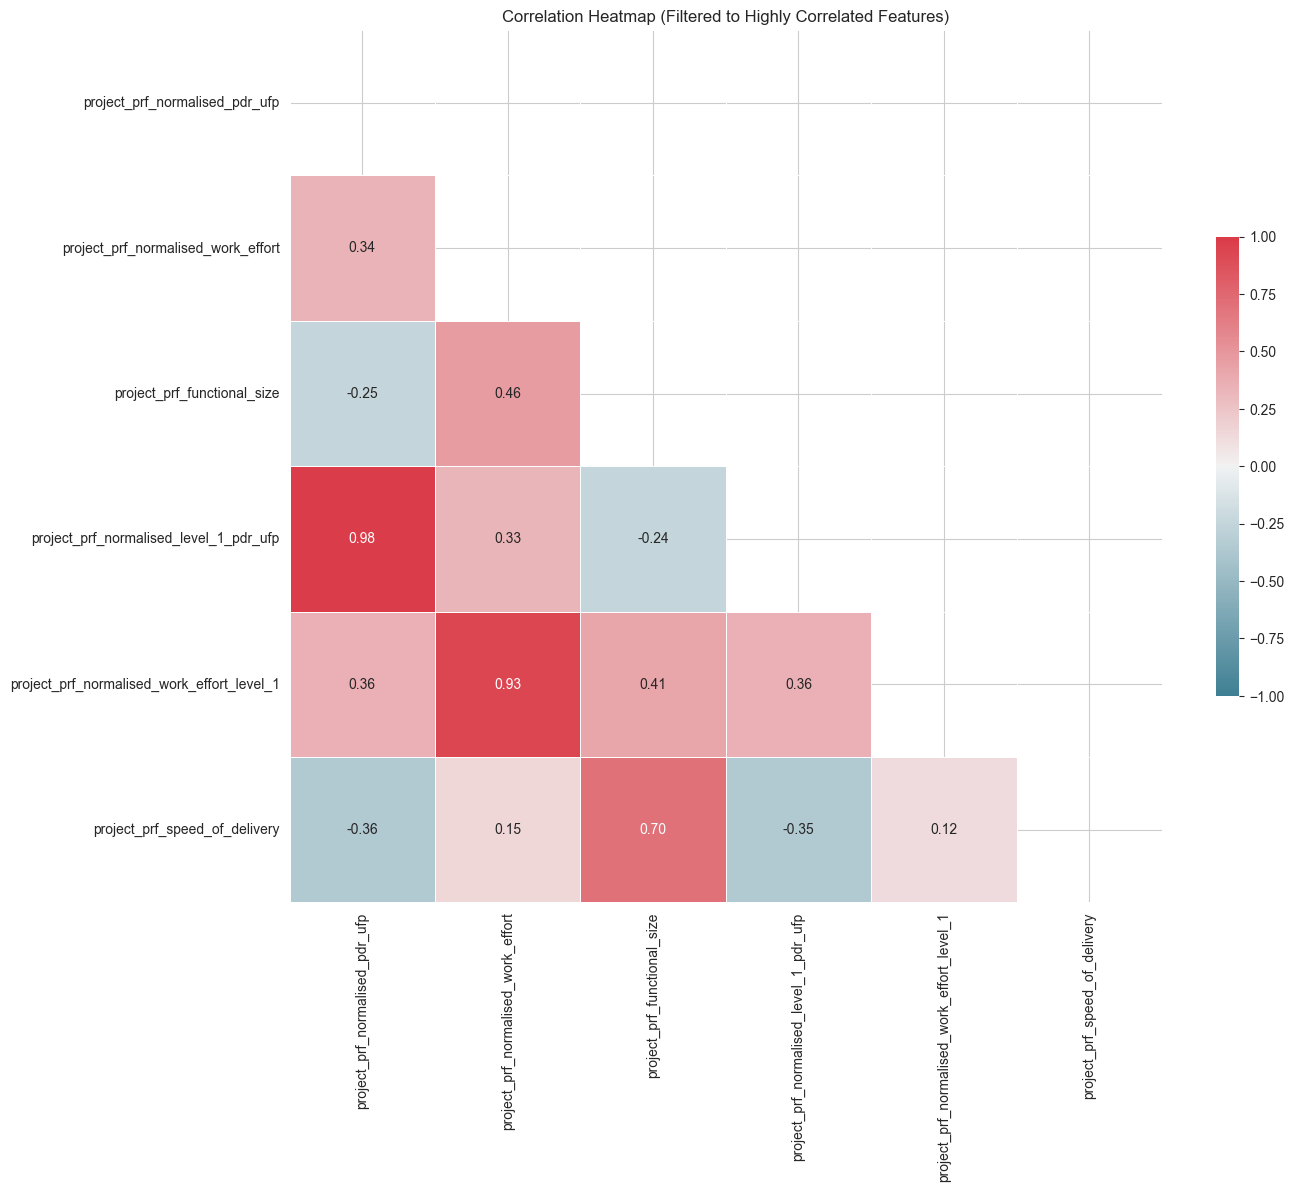

Correlation heatmap saved as ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_correlation_heatmap.png
Number of samples (rows): 10000
Number of features (columns): 73
Minimum number of rows needed to calculate VIF: 74


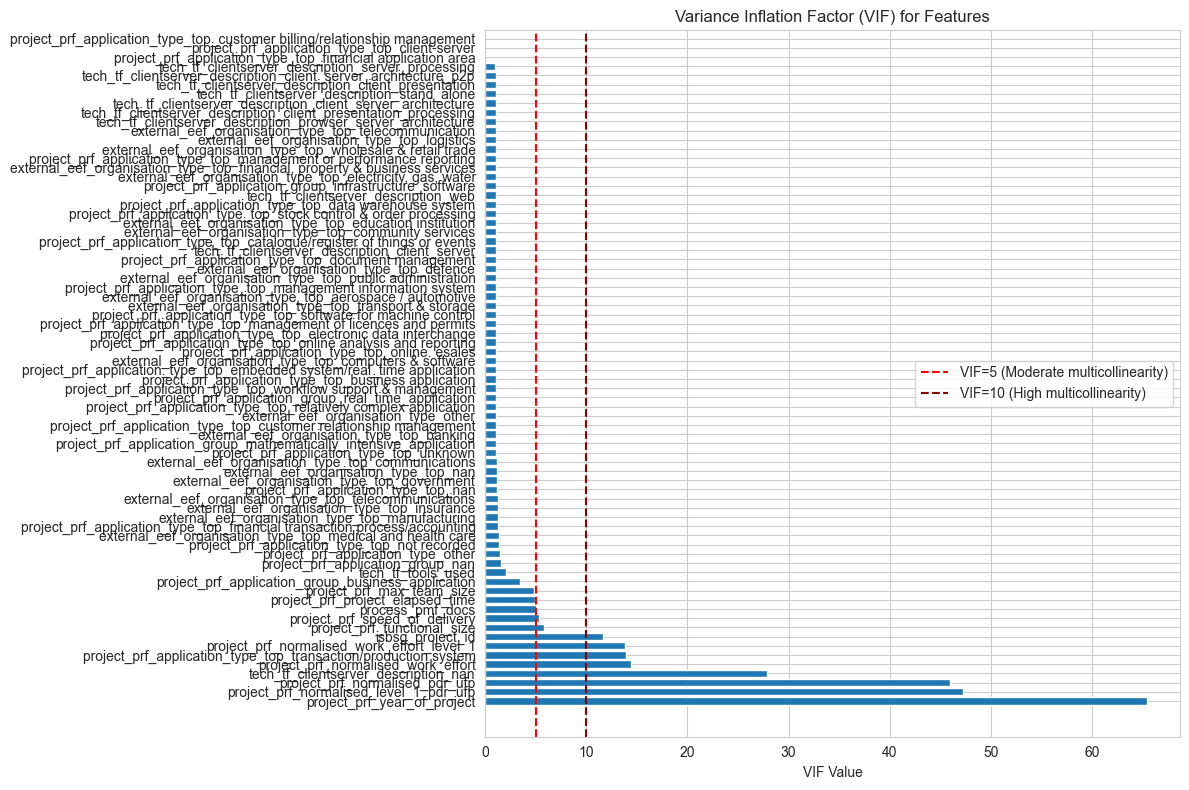

VIF values plot saved as ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_vif_values.png

Found 3 feature pairs with correlation > 0.7:
  • project_prf_normalised_level_1_pdr_ufp and project_prf_normalised_pdr_ufp: 0.9807
  • project_prf_normalised_work_effort_level_1 and project_prf_normalised_work_effort: 0.9337
  • project_prf_functional_size and project_prf_speed_of_delivery: 0.7006

Features with high VIF (> 10):
  • project_prf_year_of_project: 65.46
  • project_prf_normalised_level_1_pdr_ufp: 47.27
  • project_prf_normalised_pdr_ufp: 45.99
  • tech_tf_clientserver_description_nan: 27.86
  • project_prf_normalised_work_effort: 14.43
  • project_prf_application_type_top_transaction/production system: 13.94
  • project_prf_normalised_work_effort_level_1: 13.86
  • isbsg_project_id: 11.68

--- Multicollinearity Analysis Recommendations ---
Consider addressing multicollinearity by:
1. Removing one feature from each highly correlated pair
2. Creating new features by combining corr

In [23]:
print("\nAnalyzing feature correlations...")

try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    # Use your input DataFrame (before PyCaret setup)
    df_fixed = df

    # Optionally drop columns you know you want to ignore here, e.g.
    # df_fixed = df_fixed.drop(columns=ignore_cols, errors='ignore')

    # Create directory for plots
    os.makedirs(plots_folder, exist_ok=True)

    # Only numeric columns for analysis
    X_numeric = df_fixed.select_dtypes(include=[np.number])

    # --- Drop columns that are all NaN ---
    X_numeric = X_numeric.dropna(axis=1, how='all')

    # --- Replace inf/-inf with NaN and impute missing values with mean ---
    X_numeric_clean = X_numeric.replace([np.inf, -np.inf], np.nan)
    X_numeric_clean = X_numeric_clean.fillna(X_numeric_clean.mean())

    # Diagnostic prints
    print(f"Rows after dropping all-NaN columns: {X_numeric_clean.shape[0]}")
    print(f"Columns after dropping all-NaN columns: {X_numeric_clean.shape[1]}")
    print("Any column with all NaNs?", X_numeric_clean.isnull().all().any())
    print("Missing value count per column after cleaning:")
    print(X_numeric_clean.isnull().sum())

    # Number of features
    n_features = X_numeric_clean.shape[1]
    print(f"Analysing correlations among {n_features} numeric features")

    # Calculate correlation matrix
    corr_matrix = X_numeric_clean.corr()

    # Find highly correlated feature pairs
    correlation_threshold = 0.7
    high_corr_pairs = []
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                high_corr_pairs.append((
                    X_numeric_clean.columns[i],
                    X_numeric_clean.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(corr_matrix)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    if n_features > 20:
        print(f"Large number of features detected ({n_features}). Creating filtered correlation matrix.")
        high_corr_features = set()
        for feat1, feat2, _ in high_corr_pairs:
            high_corr_features.add(feat1)
            high_corr_features.add(feat2)
        if high_corr_features:
            high_corr_features = list(high_corr_features)
            filtered_corr = corr_matrix.loc[high_corr_features, high_corr_features]
            sns.heatmap(filtered_corr, mask=np.triu(filtered_corr),
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5},
                        annot=True, fmt=".2f")
            plt.title('Correlation Heatmap (Filtered to Highly Correlated Features)')
        else:
            sns.heatmap(corr_matrix, mask=mask,
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
            plt.title('Correlation Heatmap (All Features)')
    else:
        sns.heatmap(corr_matrix, mask=mask,
                    cmap=cmap, vmax=1, vmin=-1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                    annot=True, fmt=".2f")
        plt.title('Correlation Heatmap (All Features)')

    plt.tight_layout()
    plt.savefig(f"{plots_folder}/{file_name_no_ext}_correlation_heatmap.png")
    plt.show()
    plt.close()
    print(f"Correlation heatmap saved as {plots_folder}/{file_name_no_ext}_correlation_heatmap.png")

    # --- VIF calculation ---
    n_rows = X_numeric_clean.shape[0]
    n_features = X_numeric_clean.shape[1]
    min_rows_needed = n_features + 1
    print(f"Number of samples (rows): {n_rows}")
    print(f"Number of features (columns): {n_features}")
    print(f"Minimum number of rows needed to calculate VIF: {min_rows_needed}")

    vif_data = None
    if n_rows > n_features:
        try:
            from statsmodels.stats.outliers_influence import variance_inflation_factor

            vif_data = pd.DataFrame()
            vif_data["Feature"] = X_numeric_clean.columns
            vif_data["VIF"] = [variance_inflation_factor(X_numeric_clean.values, i)
                               for i in range(X_numeric_clean.shape[1])]

            vif_data = vif_data.sort_values("VIF", ascending=False)

            plt.figure(figsize=(12, 8))
            plt.barh(vif_data["Feature"], vif_data["VIF"])
            plt.axvline(x=5, color='r', linestyle='--', label='VIF=5 (Moderate multicollinearity)')
            plt.axvline(x=10, color='darkred', linestyle='--', label='VIF=10 (High multicollinearity)')
            plt.xlabel('VIF Value')
            plt.title('Variance Inflation Factor (VIF) for Features')
            plt.legend()
            plt.tight_layout()
            plt.savefig(f"{plots_folder}/{file_name_no_ext}_vif_values.png")
            plt.show()
            plt.close()
            print(f"VIF values plot saved as {plots_folder}/{file_name_no_ext}_vif_values.png")
        except Exception as vif_err:
            print(f"Could not calculate VIF: {vif_err}")
    else:
        print("Not enough samples to calculate VIF (need more samples than features)")

    # Print results
    print(f"\nFound {len(high_corr_pairs)} feature pairs with correlation > {correlation_threshold}:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  • {feat1} and {feat2}: {corr:.4f}")

    if vif_data is not None:
        high_vif_threshold = 10
        high_vif_features = vif_data[vif_data["VIF"] > high_vif_threshold]
        if not high_vif_features.empty:
            print(f"\nFeatures with high VIF (> {high_vif_threshold}):")
            for _, row in high_vif_features.iterrows():
                print(f"  • {row['Feature']}: {row['VIF']:.2f}")
        else:
            print(f"\nNo features have VIF > {high_vif_threshold}")

    print("\n--- Multicollinearity Analysis Recommendations ---")
    if high_corr_pairs:
        print("Consider addressing multicollinearity by:")
        print("1. Removing one feature from each highly correlated pair")
        print("2. Creating new features by combining correlated features")
        print("3. Applying dimensionality reduction techniques like PCA")
        if len(high_corr_pairs) > 0:
            print("\nPotential candidates for removal:")
            freq = {}
            for feat1, feat2, _ in high_corr_pairs:
                freq[feat1] = freq.get(feat1, 0) + 1
                freq[feat2] = freq.get(feat2, 0) + 1
            freq_df = pd.DataFrame({'Feature': list(freq.keys()),
                                    'Frequency in high corr pairs': list(freq.values())})
            freq_df = freq_df.sort_values('Frequency in high corr pairs', ascending=False)
            for _, row in freq_df.head(5).iterrows():
                print(f"  • {row['Feature']} (appears in {row['Frequency in high corr pairs']} high correlation pairs)")
    else:
        print("No significant multicollinearity detected based on correlation analysis.")

    if vif_data is not None and not high_vif_features.empty:
        print("\nBased on VIF analysis, consider removing or transforming these features with high VIF values.")

except Exception as e:
    print(f"Feature correlation analysis failed: {e}")



In [24]:
# Save this DataFrame with fixed column names

df_fixed.to_csv(f'{data_folder}/{file_name_no_ext}_fixed_columns_data.csv', index=False)
print(f"Saved data with fixed column names to '{data_folder}/{file_name_no_ext}_fixed_columns_data.csv'")

Saved data with fixed column names to '../data/synthetic_ISBSG2016R1_1_agile_SDV_generated_fixed_columns_data.csv'
Cell executed at: 2025-06-05 12:26:19.103495


[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Data Profiling

xxx

In [25]:
# ## Data Profiling (Optional)

try:
    from ydata_profiling import ProfileReport
    
    print("\nGenerating data profile report...")
    profile = ProfileReport(df_clean, title="ISBSG-SDV Dataset Profiling Report", minimal=True)
    profile.to_file(f"{data_folder}/{file_name_no_ext}_data_profile_sdv.html")
    print(f"Data profile report saved to '{data_folder}/{file_name_no_ext}_data_profile_sdv.html'")
except ImportError:
    print("\nSkipping data profiling (ydata_profiling not installed)")
    print("To install: pip install ydata-profiling")


Generating data profile report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/158 [00:00<?, ?it/s]
%|▌         | 9/158 [00:00<00:01, 81.04it/s]
%|█▏        | 18/158 [00:00<00:02, 52.79it/s]
%|█████     | 79/158 [00:00<00:00, 232.75it/s]
%|██████▉   | 109/158 [00:00<00:00, 229.61it/s]
100%|██████████| 158/158 [00:00<00:00, 191.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profile report saved to '../data/synthetic_ISBSG2016R1_1_agile_SDV_generated_data_profile_sdv.html'
Cell executed at: 2025-06-05 12:26:59.618401


[Back to top](#Index:)

<a id='part5'></a>

# Part 5 - PyCaret setup

xxx

In [26]:
print(sklearn.__version__)
print(pycaret.__version__)  

1.4.2
3.3.2
Cell executed at: 2025-06-05 12:26:59.629392


In [29]:
import pandas as pd
import numpy as np

# Debug your data before PyCaret setup
def debug_dataframe(df, target_col, ignore_cols):
    """Debug DataFrame to identify problematic columns"""
    
    print("=== DATAFRAME DEBUG INFO ===")
    print(f"Shape: {df.shape}")
    print(f"Target column: {target_col}")
    print(f"Ignored columns: {len(ignore_cols)}")
    
    # Check data types
    print("\n=== DATA TYPES ===")
    print(df.dtypes.value_counts())
    
    # Find mixed-type columns
    print("\n=== MIXED TYPE COLUMNS ===")
    for col in df.columns:
        if col not in ignore_cols:
            unique_types = df[col].apply(type).unique()
            if len(unique_types) > 1:
                print(f"{col}: {unique_types}")
    
    # Check for problematic values
    print("\n=== SAMPLE VALUES ===")
    for col in df.select_dtypes(include=['object']).columns:
        if col not in ignore_cols:
            sample_vals = df[col].dropna().unique()[:5]
            print(f"{col}: {sample_vals}")
    
    # Check missing values
    print("\n=== MISSING VALUES ===")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    print(missing.head(10))
    
    # Identify likely categorical vs numeric columns
    print("\n=== SUGGESTED COLUMN TYPES ===")
    likely_numeric = []
    likely_categorical = []
    
    for col in df.columns:
        if col not in ignore_cols and col != target_col:
            # Try to convert to numeric
            try:
                pd.to_numeric(df[col], errors='raise')
                likely_numeric.append(col)
            except:
                likely_categorical.append(col)
    
    print(f"Likely numeric ({len(likely_numeric)}): {likely_numeric}")
    print(f"Likely categorical ({len(likely_categorical)}): {likely_categorical[:10]}...")
    
    return likely_numeric, likely_categorical

# Run the debug
likely_numeric, likely_categorical = debug_dataframe(df_fixed, TARGET_COL, ignore_cols)

# Use the results in your PyCaret setup
setup_results = setup(
    data=df_fixed,
    target=TARGET_COL,
    ignore_features=ignore_cols,
    numeric_features=likely_numeric,
    categorical_features=likely_categorical,
    session_id=123,
    preprocess=True,
    normalize=True,
    normalize_method='zscore',
    verbose=False
)

=== DATAFRAME DEBUG INFO ===
Shape: (10000, 159)
Target column: project_prf_normalised_work_effort
Ignored columns: 24

=== DATA TYPES ===
bool       77
int64      50
float64    23
object      9
Name: count, dtype: int64

=== MIXED TYPE COLUMNS ===
external_eef_industry_sector: [<class 'str'> <class 'float'>]
tech_tf_client_roles: [<class 'float'> <class 'str'>]
tech_tf_clientserver_description: [<class 'float'> <class 'str'>]
tech_tf_development_platform_hand_held: [<class 'bool'> <class 'float'>]

=== SAMPLE VALUES ===
external_eef_industry_sector: ['manufacturing' 'medical & health care' 'insurance' 'utilities' 'defence']
tech_tf_primary_programming_language: ['pl/i' 'siebel' 'java' 'dotnet' 'cool:gen']
project_prf_team_size_group: ['71_80' '101+' '91_100' '15_20' '21_30']
process_pmf_development_methodologies: ['agile development']
tech_tf_client_roles: ['data entry & validation; run a computer_human interface'
 'data entry & validation; data retrieval & presentation; run a compute

In [28]:
import pandas as pd
import numpy as np
from pycaret.regression import setup, get_config
from sklearn.preprocessing import StandardScaler
import os
import joblib

def fix_mixed_type_columns_simple(df):
    """Fix mixed type columns before PyCaret setup"""
    df_copy = df.copy()
    
    # List of problematic mixed-type columns
    mixed_type_cols = [
        'external_eef_industry_sector',
        'tech_tf_client_roles', 
        'tech_tf_clientserver_description',
        'tech_tf_development_platform_hand_held'
    ]
    
    print("Fixing mixed type columns...")
    
    for col in mixed_type_cols:
        if col in df_copy.columns:
            print(f"Processing {col}")
            
            # For the boolean column
            if col == 'tech_tf_development_platform_hand_held':
                df_copy[col] = df_copy[col].fillna(False).astype(bool)
            else:
                # For string columns with float NaN values
                df_copy[col] = df_copy[col].astype(str)
                df_copy[col] = df_copy[col].replace('nan', np.nan)
    
    return df_copy

# Fix your dataframe
df_fixed_types = fix_mixed_type_columns_simple(df_fixed)

# Define ignore columns
ignore_cols = ['isbsg_project_id', 'external_eef_data_quality_rating', 'external_eef_data_quality_rating_b', 
               'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_level_1_pdr_ufp', 
               'project_prf_normalised_pdr_ufp', 'project_prf_project_elapsed_time', 
               'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 
               'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 
               'people_prf_it_experience_1_to_3_yr', 'people_prf_it_experience_great_than_3_yr', 
               'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 
               'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 
               'project_prf_total_project_cost', 'project_prf_cost_currency', 'project_prf_currency_multiple', 
               'project_prf_speed_of_delivery', 'people_prf_project_manage_changes', 
               'project_prf_defect_density', 'project_prf_manpower_delivery_rate']

# Make column names lowercase
df_fixed_types.columns = [col.lower() for col in df_fixed_types.columns]
ignore_cols = [col.lower() for col in ignore_cols]

print(f"DataFrame shape: {df_fixed_types.shape}")
print(f"Target column: {TARGET_COL}")
print(f"Ignore columns: {len(ignore_cols)}")

# Let PyCaret auto-detect column types - much simpler!
try:
    print("Attempting PyCaret setup with auto-detection...")
    setup_results = setup(
        data=df_fixed_types,
        target=TARGET_COL,
        ignore_features=ignore_cols,
        session_id=123,
        preprocess=True,
        normalize=True,
        normalize_method='zscore',
        imputation_type='simple',
        numeric_imputation='mean',
        categorical_imputation='mode',
        verbose=True
    )
    
    print("✅ PyCaret setup successful!")
    
    # Get the fitted pipeline from PyCaret
    preprocessor = get_config('pipeline')
    
    # Save the scaler
    scaler_model = preprocessor.named_steps['normalize'].transformer
    
    # Create models folder and save
    if not os.path.exists(models_folder):
        os.makedirs(models_folder)
        print(f"Created folder: {models_folder}")
    
    scaler_filename = os.path.join(models_folder, 'standard_scaler.pkl')
    joblib.dump(scaler_model, scaler_filename)
    print(f"Scaler model saved to: {scaler_filename}")
    
    print(f"Scaler type: {type(scaler_model)}")
    if isinstance(scaler_model, StandardScaler):
        print(f"Scaler features: {len(scaler_model.mean_)} features")
        print(f"First 5 means: {scaler_model.mean_[:5]}")
        print(f"First 5 scales: {scaler_model.scale_[:5]}")
    
except Exception as e:
    print(f"❌ Setup failed: {e}")
    
    # If it still fails, try without normalization
    print("\nTrying without normalization...")
    try:
        setup_results = setup(
            data=df_fixed_types,
            target=TARGET_COL,
            ignore_features=ignore_cols,
            session_id=123,
            preprocess=True,
            normalize=False,  # Disable normalization
            imputation_type='simple',
            numeric_imputation='mean',
            categorical_imputation='mode',
            verbose=True
        )
        print("✅ Setup successful without normalization!")
        
        # You can manually add normalization later if needed
        preprocessor = get_config('pipeline')
        
    except Exception as e2:
        print(f"❌ Setup failed even without normalization: {e2}")
        
        # Last resort: minimal setup
        print("\nTrying minimal setup...")
        setup_results = setup(
            data=df_fixed_types,
            target=TARGET_COL,
            ignore_features=ignore_cols,
            session_id=123,
            preprocess=False,  # Disable all preprocessing
            verbose=True
        )
        print("✅ Minimal setup successful!")

Fixing mixed type columns...
Processing external_eef_industry_sector
Processing tech_tf_client_roles
Processing tech_tf_clientserver_description
Processing tech_tf_development_platform_hand_held
DataFrame shape: (10000, 159)
Target column: project_prf_normalised_work_effort
Ignore columns: 24
Attempting PyCaret setup with auto-detection...


✅ PyCaret setup successful!
Scaler model saved to: ../models\standard_scaler.pkl
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Scaler features: 182 features
First 5 means: [2.01072557e+03 1.11142857e-01 2.71428571e-02 2.65714286e-02
 1.28285714e-01]
First 5 scales: [5.80829238 0.31430896 0.16249961 0.1608272  0.33440767]
Cell executed at: 2025-06-05 12:28:46.586573


In [30]:
"""
To BE removed

from pycaret.regression import setup, get_config
from sklearn.preprocessing import StandardScaler
import os

ignore_cols = ['isbsg_project_id', 'external_eef_data_quality_rating', 'external_eef_data_quality_rating_b', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 
               'project_prf_project_elapsed_time', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 
               'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr', 
               'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 
               'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'project_prf_total_project_cost', 
               'project_prf_cost_currency', 'project_prf_currency_multiple', 'project_prf_speed_of_delivery', 'people_prf_project_manage_changes', 
               'project_prf_defect_density','project_prf_manpower_delivery_rate'
            ]

# Make all column names lowercase and underscores
df_fixed.columns = [col.lower() for col in df_fixed.columns]
ignore_cols = [col.lower() for col in ignore_cols]

#print(f"Final encoded feature list: {encoded_columns_fixed}")
# print(f"\nIgnred feature columns: {ignore_cols}")
setup_results = setup(
    data=df_fixed,
    target=TARGET_COL,
    ignore_features=ignore_cols,
    session_id=123,
    preprocess=True,
    # Add these lines to enable normalization (scaling)
    normalize=True,             # This will use StandardScaler (Z-score normalization) by default
    normalize_method='zscore',  # Explicitly state 'zscore', or choose 'minmax', 'maxabs', 'robust'
    verbose=False
)

# Get the fitted pipeline from PyCaret
preprocessor = get_config('pipeline')

# --- Capture the scaler model ---
# Access the 'normalize' step from the pipeline's named_steps
# The actual scaler object is inside the 'transformer' attribute of the TransformerWrapper
scaler_model = preprocessor.named_steps['normalize'].transformer

# Create the models folder if it doesn't exist
if not os.path.exists(models_folder):
    os.makedirs(models_folder)
    print(f"Created folder: {models_folder}")

# Define the file path for the scaler model
scaler_filename = os.path.join(models_folder, 'standard_scaler.pkl') # .pkl is a common extension for pickled files

# Create the models folder if it doesn't exist
if not os.path.exists(models_folder):
    os.makedirs(models_folder)
    print(f"Created folder: {models_folder}")

# Save the scaler model
joblib.dump(scaler_model, scaler_filename)
print(f"Scaler model saved to: {scaler_filename}")

# You can now print it to verify
print(scaler_model)

# You can also check its type
print(type(scaler_model))

# If it's a StandardScaler, it will have .mean_ and .scale_ attributes after fitting
if isinstance(scaler_model, StandardScaler):
    print(f"Scaler Mean: {scaler_model.mean_}")
    print(f"Scaler Scale (Std Dev): {scaler_model.scale_}")

# --- Example of using the captured scaler (on new data, assuming it's in the same format) ---
# Note: You typically use the entire PyCaret pipeline for new data,
# but if you specifically needed just the scaler for some custom preprocessing,
# you could do it like this:
#
# # Assuming 'new_numerical_data' is a pandas DataFrame or numpy array
# # containing only the numerical features that were scaled by PyCaret
# # (i.e., 'project_prf_year_of_project', 'project_prf_functional_size', etc.)
# scaled_data_custom = scaler_model.transform(new_numerical_data)
# print(scaled_data_custom)


"""

'\nTo BE removed\n\nfrom pycaret.regression import setup, get_config\nfrom sklearn.preprocessing import StandardScaler\nimport os\n\nignore_cols = [\'isbsg_project_id\', \'external_eef_data_quality_rating\', \'external_eef_data_quality_rating_b\', \'project_prf_normalised_work_effort_level_1\', \'project_prf_normalised_level_1_pdr_ufp\', \'project_prf_normalised_pdr_ufp\', \n               \'project_prf_project_elapsed_time\', \'people_prf_ba_team_experience_less_than_1_yr\', \'people_prf_ba_team_experience_1_to_3_yr\', \n               \'people_prf_ba_team_experience_great_than_3_yr\', \'people_prf_it_experience_less_than_1_yr\', \'people_prf_it_experience_1_to_3_yr\', \n               \'people_prf_it_experience_great_than_3_yr\', \'people_prf_it_experience_less_than_3_yr\', \'people_prf_it_experience_3_to_9_yr\', \n               \'people_prf_it_experience_great_than_9_yr\', \'people_prf_project_manage_experience\', \'project_prf_total_project_cost\', \n               \'project_prf_c

Cell executed at: 2025-06-05 12:30:41.027207


[Back to top](#Index:)

<a id='part6'></a>

# Part 6 - Model Building with PyCaret

xxx

In [ ]:
"""
Flexible Model Saving System for PyCaret
No hard-coded values - fully configurable and adaptable


import os
import json
import time
import pickle
import joblib
import pandas as pd
import numpy as np
from datetime import datetime
from pathlib import Path
from typing import Dict, List, Any, Optional, Tuple, Union
import logging
from dataclasses import dataclass, asdict
from pycaret.regression import *
import hashlib
import yaml

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

@dataclass
class ModelConfig:
    """Configuration for model saving behavior"""
    save_formats: List[str]  # e.g., ['pycaret', 'sklearn_pipeline', 'sklearn_model', 'onnx', 'deployment']
    directory_structure: Dict[str, str]  # Custom directory names
    file_naming: Dict[str, str]  # Naming patterns
    metadata_fields: List[str]  # Which metadata to collect
    verification_tests: List[str]  # Which tests to run
    deployment_options: Dict[str, Any]  # Deployment-specific settings
    compression: Optional[str]  # Compression method if any
    version_control: bool  # Whether to use versioning
    backup_existing: bool  # Whether to backup existing files

@dataclass
class ModelMetadata:
    """Flexible metadata structure"""
    core_info: Dict[str, Any]
    metrics: Dict[str, float]
    file_info: Dict[str, Dict[str, Any]]
    system_info: Dict[str, str]
    custom_fields: Dict[str, Any]

class FlexibleModelSaver:
    """Completely configurable model saving system"""
    
    def __init__(self, config: Optional[Union[Dict, str, ModelConfig]] = None, base_dir: str = "."):
        self.base_dir = Path(base_dir)
        self.config = self._load_config(config)
        self.timestamp = datetime.now().strftime(self.config.file_naming.get('timestamp_format', '%Y%m%d_%H%M%S'))
        
        # Create directories based on config
        self.dirs = {}
        for key, dir_name in self.config.directory_structure.items():
            self.dirs[key] = self.base_dir / dir_name
            self.dirs[key].mkdir(parents=True, exist_ok=True)
        
        logger.info(f"FlexibleModelSaver initialized with {len(self.dirs)} directories")
    
    def _load_config(self, config: Optional[Union[Dict, str, ModelConfig]]) -> ModelConfig:
        """Load configuration from various sources"""
        
        if config is None:
            # Default configuration
            return self._get_default_config()
        
        elif isinstance(config, ModelConfig):
            return config
        
        elif isinstance(config, dict):
            return self._dict_to_config(config)
        
        elif isinstance(config, str):
            # Load from file
            if config.endswith('.yaml') or config.endswith('.yml'):
                with open(config, 'r') as f:
                    config_dict = yaml.safe_load(f)
            elif config.endswith('.json'):
                with open(config, 'r') as f:
                    config_dict = json.load(f)
            else:
                raise ValueError(f"Unsupported config file format: {config}")
            
            return self._dict_to_config(config_dict)
        
        else:
            raise ValueError(f"Invalid config type: {type(config)}")
    
    def _get_default_config(self) -> ModelConfig:
        """Generate sensible default configuration"""
        return ModelConfig(
            save_formats=['pycaret', 'sklearn_pipeline', 'sklearn_model'],
            directory_structure={
                'models': 'models',
                'sklearn': 'sklearn_models',
                'onnx': 'onnx_models',
                'deployment': 'deployment_ready',
                'metadata': 'model_metadata',
                'logs': 'logs',
                'data': 'data',
                'configs': 'configs',
                'backups': 'backups'
            },
            file_naming={
                'timestamp_format': '%Y%m%d_%H%M%S',
                'model_pattern': '{prefix}_{rank}_{algorithm}_{timestamp}',
                'metadata_pattern': '{model_name}_metadata_{timestamp}',
                'backup_pattern': '{original_name}_backup_{timestamp}'
            },
            metadata_fields=[
                'algorithm', 'hyperparameters', 'metrics', 'features', 
                'preprocessing', 'system_info', 'file_paths', 'performance'
            ],
            verification_tests=['load_test', 'prediction_test', 'feature_test'],
            deployment_options={
                'create_prediction_script': True,
                'create_requirements': True,
                'include_preprocessing': True,
                'standalone_package': True
            },
            compression=None,
            version_control=True,
            backup_existing=True
        )
    
    def _dict_to_config(self, config_dict: Dict) -> ModelConfig:
        """Convert dictionary to ModelConfig"""
        default_config = self._get_default_config()
        
        # Update default with provided values
        for field_name, field_value in config_dict.items():
            if hasattr(default_config, field_name):
                setattr(default_config, field_name, field_value)
        
        return default_config
    
    def save_config(self, config_path: Optional[str] = None) -> str:
        """Save current configuration for reuse"""
        if config_path is None:
            config_path = self.dirs['configs'] / f"model_saver_config_{self.timestamp}.yaml"
        
        config_dict = asdict(self.config)
        
        with open(config_path, 'w') as f:
            yaml.dump(config_dict, f, default_flow_style=False)
        
        logger.info(f"Configuration saved to: {config_path}")
        return str(config_path)
    
    def generate_filename(self, pattern_key: str, **kwargs) -> str:
        """Generate filename based on pattern and provided variables"""
        pattern = self.config.file_naming.get(pattern_key, '{name}_{timestamp}')
        
        # Add timestamp if not provided
        if 'timestamp' not in kwargs:
            kwargs['timestamp'] = self.timestamp
        
        try:
            return pattern.format(**kwargs)
        except KeyError as e:
            logger.warning(f"Missing variable {e} for pattern '{pattern}', using fallback")
            return f"{kwargs.get('name', 'model')}_{self.timestamp}"
    
    def extract_model_info(self, model, tuned_results: Optional[pd.DataFrame] = None) -> Dict[str, Any]:
        """Extract model information based on configuration"""
        info = {}
        
        # Extract based on configured metadata fields
        if 'algorithm' in self.config.metadata_fields:
            info['algorithm'] = type(model).__name__
            info['model_class'] = str(type(model))
        
        if 'hyperparameters' in self.config.metadata_fields:
            info['hyperparameters'] = self._extract_hyperparameters(model)
        
        if 'metrics' in self.config.metadata_fields and tuned_results is not None:
            info['metrics'] = self._extract_metrics(tuned_results)
        
        if 'features' in self.config.metadata_fields:
            info['features'] = self._extract_feature_info(model)
        
        if 'preprocessing' in self.config.metadata_fields:
            info['preprocessing'] = self._extract_preprocessing_info()
        
        if 'system_info' in self.config.metadata_fields:
            info['system_info'] = self._get_system_info()
        
        return info
    
    def _extract_hyperparameters(self, model) -> Dict[str, Any]:
        """Extract hyperparameters safely"""
        try:
            if hasattr(model, 'get_params'):
                params = model.get_params()
                # Convert non-serializable values to strings
                return {k: str(v) if not isinstance(v, (int, float, str, bool, type(None))) else v 
                       for k, v in params.items()}
            return {}
        except Exception as e:
            logger.warning(f"Could not extract hyperparameters: {e}")
            return {}
    
    def _extract_metrics(self, tuned_results: pd.DataFrame) -> Dict[str, float]:
        """Extract metrics from tuned results"""
        metrics = {}
        
        try:
            # Try to find the right column for mean values
            mean_column = None
            for col in tuned_results.columns:
                if 'mean' in col.lower() or 'avg' in col.lower():
                    mean_column = col
                    break
            
            if mean_column is None and len(tuned_results.columns) > 0:
                # Use the last column as fallback
                mean_column = tuned_results.columns[-1]
            
            if mean_column:
                # Extract all numeric metrics
                for metric in tuned_results.index:
                    try:
                        value = tuned_results.loc[metric, mean_column]
                        if isinstance(value, (int, float)) and not pd.isna(value):
                            metrics[metric] = float(value)
                    except:
                        continue
        
        except Exception as e:
            logger.warning(f"Could not extract metrics: {e}")
        
        return metrics
    
    def _extract_feature_info(self, model) -> Dict[str, Any]:
        """Extract feature information"""
        feature_info = {}
        
        try:
            # Try to get feature names from various sources
            feature_names = None
            
            if hasattr(model, 'feature_names_in_'):
                feature_names = list(model.feature_names_in_)
            else:
                # Try to get from PyCaret config
                try:
                    X = get_config("X")
                    if X is not None:
                        feature_names = list(X.columns)
                except:
                    pass
            
            if feature_names:
                feature_info['names'] = feature_names
                feature_info['count'] = len(feature_names)
                feature_info['types'] = self._infer_feature_types(feature_names)
        
        except Exception as e:
            logger.warning(f"Could not extract feature info: {e}")
        
        return feature_info
    
    def _infer_feature_types(self, feature_names: List[str]) -> Dict[str, str]:
        """Infer feature types from names"""
        try:
            X = get_config("X")
            if X is not None:
                return {name: str(X[name].dtype) for name in feature_names if name in X.columns}
        except:
            pass
        return {}
    
    def _extract_preprocessing_info(self) -> Dict[str, Any]:
        """Extract preprocessing information"""
        preprocessing_info = {}
        
        try:
            # Get PyCaret setup configuration
            setup_config = get_config('setup')
            if setup_config:
                # Extract relevant preprocessing steps
                relevant_keys = [
                    'normalize', 'transformation', 'handle_unknown_categorical',
                    'unknown_categorical_method', 'pca', 'pca_method', 'pca_components',
                    'ignore_low_variance', 'combine_rare_levels', 'rare_level_threshold',
                    'bin_numeric_features', 'remove_multicollinearity', 'multicollinearity_threshold'
                ]
                
                for key in relevant_keys:
                    if key in setup_config:
                        preprocessing_info[key] = setup_config[key]
        
        except Exception as e:
            logger.warning(f"Could not extract preprocessing info: {e}")
        
        return preprocessing_info
    
    def _get_system_info(self) -> Dict[str, str]:
        """Get system information"""
        import sys
        import platform
        
        system_info = {
            'python_version': sys.version.split()[0],
            'platform': platform.platform(),
            'timestamp': datetime.now().isoformat()
        }
        
        # Get package versions
        try:
            import sklearn
            system_info['scikit_learn_version'] = sklearn.__version__
        except:
            pass
        
        try:
            system_info['pycaret_version'] = get_config('version')
        except:
            pass
        
        try:
            system_info['pandas_version'] = pd.__version__
        except:
            pass
        
        try:
            system_info['numpy_version'] = np.__version__
        except:
            pass
        
        return system_info
    
    def save_model_format(self, model, format_name: str, model_info: Dict[str, Any], 
                         rank: int, **kwargs) -> Dict[str, Any]:
        """Save model in specified format"""
        
        algorithm = model_info.get('algorithm', 'UnknownModel')
        filename = self.generate_filename(
            'model_pattern',
            prefix=format_name,
            rank=rank,
            algorithm=algorithm
        )
        
        if format_name == 'pycaret':
            return self._save_pycaret_format(model, filename, **kwargs)
        
        elif format_name == 'sklearn_pipeline':
            return self._save_sklearn_pipeline(model, filename, **kwargs)
        
        elif format_name == 'sklearn_model':
            return self._save_sklearn_model(model, filename, **kwargs)
        
        elif format_name == 'onnx':
            return self._save_onnx_format(model, filename, **kwargs)
        
        elif format_name == 'deployment':
            return self._save_deployment_package(model, filename, model_info, **kwargs)
        
        else:
            logger.warning(f"Unknown save format: {format_name}")
            return {'status': 'unknown_format', 'format': format_name}
    
    def _save_pycaret_format(self, model, filename: str, **kwargs) -> Dict[str, Any]:
        """Save in PyCaret format"""
        try:
            model_path = self.dirs['models'] / filename
            save_model(model, str(model_path))
            
            full_path = f"{model_path}.pkl"
            
            # Verify save
            if not os.path.exists(full_path):
                raise FileNotFoundError(f"PyCaret model not saved properly")
            
            # Test loading if verification is enabled
            if 'load_test' in self.config.verification_tests:
                test_model = load_model(str(model_path))
            
            return {
                'status': 'success',
                'path': full_path,
                'size_mb': os.path.getsize(full_path) / (1024 * 1024),
                'format': 'pycaret'
            }
        
        except Exception as e:
            logger.error(f"Failed to save PyCaret model: {e}")
            return {'status': 'failed', 'error': str(e), 'format': 'pycaret'}
    
    def _save_sklearn_pipeline(self, model, filename: str, **kwargs) -> Dict[str, Any]:
        """Save complete sklearn pipeline"""
        try:
            final_model = finalize_model(model)
            model_path = self.dirs['sklearn'] / f"{filename}_pipeline.pkl"
            
            # Preserve feature names
            feature_names = kwargs.get('feature_names', [])
            if feature_names:
                self._preserve_feature_names(final_model, feature_names)
            
            # Save with compression if configured
            if self.config.compression:
                joblib.dump(final_model, model_path, compress=self.config.compression)
            else:
                joblib.dump(final_model, model_path)
            
            # Verify if enabled
            if 'load_test' in self.config.verification_tests:
                test_model = joblib.load(model_path)
                
                if 'feature_test' in self.config.verification_tests and feature_names:
                    self._verify_features(test_model, feature_names)
            
            return {
                'status': 'success',
                'path': str(model_path),
                'size_mb': model_path.stat().st_size / (1024 * 1024),
                'format': 'sklearn_pipeline'
            }
        
        except Exception as e:
            logger.error(f"Failed to save sklearn pipeline: {e}")
            return {'status': 'failed', 'error': str(e), 'format': 'sklearn_pipeline'}
    
    def _save_sklearn_model(self, model, filename: str, **kwargs) -> Dict[str, Any]:
        """Save core sklearn model only"""
        try:
            final_model = finalize_model(model)
            core_model = self._extract_core_model(final_model)
            
            if core_model is None:
                return {'status': 'failed', 'error': 'Could not extract core model', 'format': 'sklearn_model'}
            
            model_path = self.dirs['sklearn'] / f"{filename}_model.pkl"
            
            # Preserve feature names
            feature_names = kwargs.get('feature_names', [])
            if feature_names:
                self._preserve_feature_names(core_model, feature_names)
            
            if self.config.compression:
                joblib.dump(core_model, model_path, compress=self.config.compression)
            else:
                joblib.dump(core_model, model_path)
            
            return {
                'status': 'success',
                'path': str(model_path),
                'size_mb': model_path.stat().st_size / (1024 * 1024),
                'format': 'sklearn_model'
            }
        
        except Exception as e:
            logger.error(f"Failed to save sklearn model: {e}")
            return {'status': 'failed', 'error': str(e), 'format': 'sklearn_model'}
    
    def _save_onnx_format(self, model, filename: str, **kwargs) -> Dict[str, Any]:
        """Save in ONNX format"""
        try:
            from skl2onnx import convert_sklearn
            from skl2onnx.common.data_types import FloatTensorType
            
            final_model = finalize_model(model)
            core_model = self._extract_core_model(final_model)
            
            if core_model is None:
                return {'status': 'failed', 'error': 'Could not extract core model for ONNX', 'format': 'onnx'}
            
            # Get input shape
            feature_count = kwargs.get('feature_count', 10)
            initial_type = [('float_input', FloatTensorType([None, feature_count]))]
            
            # Convert to ONNX
            onnx_model = convert_sklearn(core_model, initial_types=initial_type)
            
            # Save
            model_path = self.dirs['onnx'] / f"{filename}.onnx"
            with open(model_path, "wb") as f:
                f.write(onnx_model.SerializeToString())
            
            return {
                'status': 'success',
                'path': str(model_path),
                'size_mb': model_path.stat().st_size / (1024 * 1024),
                'format': 'onnx'
            }
        
        except ImportError:
            return {'status': 'skipped', 'error': 'skl2onnx not available', 'format': 'onnx'}
        except Exception as e:
            logger.error(f"Failed to save ONNX model: {e}")
            return {'status': 'failed', 'error': str(e), 'format': 'onnx'}
    
    def _save_deployment_package(self, model, filename: str, model_info: Dict, **kwargs) -> Dict[str, Any]:
        """Create deployment package"""
        try:
            deploy_dir = self.dirs['deployment'] / filename
            deploy_dir.mkdir(exist_ok=True)
            
            # Save model
            final_model = finalize_model(model)
            model_path = deploy_dir / "model.pkl"
            joblib.dump(final_model, model_path)
            
            # Create deployment files based on config
            if self.config.deployment_options.get('create_prediction_script', True):
                self._create_prediction_script(deploy_dir, model_info, **kwargs)
            
            if self.config.deployment_options.get('create_requirements', True):
                self._create_requirements_file(deploy_dir)
            
            if self.config.deployment_options.get('include_preprocessing', True):
                self._create_preprocessing_info(deploy_dir, model_info, **kwargs)
            
            total_size = sum(f.stat().st_size for f in deploy_dir.rglob('*') if f.is_file())
            
            return {
                'status': 'success',
                'path': str(deploy_dir),
                'size_mb': total_size / (1024 * 1024),
                'format': 'deployment'
            }
        
        except Exception as e:
            logger.error(f"Failed to create deployment package: {e}")
            return {'status': 'failed', 'error': str(e), 'format': 'deployment'}
    
    def _preserve_feature_names(self, model, feature_names: List[str]):
        """Preserve feature names in model"""
        try:
            feature_array = np.array(feature_names)
            
            if hasattr(model, 'feature_names_in_'):
                model.feature_names_in_ = feature_array
            elif hasattr(model, 'steps'):
                # For pipelines, set on final estimator
                final_estimator = model.steps[-1][1]
                if hasattr(final_estimator, 'feature_names_in_'):
                    final_estimator.feature_names_in_ = feature_array
        except Exception as e:
            logger.warning(f"Could not preserve feature names: {e}")
    
    def _extract_core_model(self, pipeline):
        """Extract core model from pipeline"""
        if hasattr(pipeline, 'steps') and len(pipeline.steps) > 0:
            return pipeline.steps[-1][1]
        elif hasattr(pipeline, '_final_estimator'):
            return pipeline._final_estimator
        else:
            return pipeline
    
    def _verify_features(self, model, expected_features: List[str]) -> bool:
        """Verify feature names preservation"""
        try:
            if hasattr(model, 'feature_names_in_'):
                actual = list(model.feature_names_in_)
                return actual == expected_features
        except:
            pass
        return False
    
    def _create_prediction_script(self, deploy_dir: Path, model_info: Dict, **kwargs):
        """Create configurable prediction script"""
        feature_names = kwargs.get('feature_names', [])
        
        script_template = self._get_prediction_script_template()
        
        script_content = script_template.format(
            feature_names=feature_names,
            feature_count=len(feature_names),
            model_algorithm=model_info.get('algorithm', 'UnknownModel'),
            timestamp=self.timestamp
        )
        
        with open(deploy_dir / "predict.py", 'w') as f:
            f.write(script_content)
    
    def _get_prediction_script_template(self) -> str:
        """Get prediction script template"""
        return '''"""
Prediction script for {model_algorithm}
Generated on: {timestamp}
"""

import joblib
import pandas as pd
import numpy as np
from pathlib import Path
import json

class ModelPredictor:
    def __init__(self, model_dir: str = "."):
        self.model_dir = Path(model_dir)
        self.model = joblib.load(self.model_dir / "model.pkl")
        
        # Load configuration if available
        config_path = self.model_dir / "config.json"
        if config_path.exists():
            with open(config_path, 'r') as f:
                self.config = json.load(f)
        else:
            self.config = {{}}
        
        self.feature_names = {feature_names}
        self.feature_count = {feature_count}
    
    def predict(self, data):
        """Make predictions on new data"""
        processed_data = self._preprocess_input(data)
        predictions = self.model.predict(processed_data)
        return self._postprocess_output(predictions)
    
    def _preprocess_input(self, data):
        """Preprocess input data"""
        if isinstance(data, np.ndarray):
            if data.shape[1] != self.feature_count:
                raise ValueError(f"Expected {{self.feature_count}} features, got {{data.shape[1]}}")
            data = pd.DataFrame(data, columns=self.feature_names)
        
        elif isinstance(data, pd.DataFrame):
            # Ensure correct features
            missing_features = set(self.feature_names) - set(data.columns)
            if missing_features:
                raise ValueError(f"Missing features: {{missing_features}}")
            
            data = data[self.feature_names]
        
        return data
    
    def _postprocess_output(self, predictions):
        """Postprocess model output"""
        return predictions
    
    def predict_batch(self, data_list):
        """Predict on batch of samples"""
        return [self.predict(data) for data in data_list]

if __name__ == "__main__":
    predictor = ModelPredictor()
    print("Model loaded successfully!")
    print(f"Expected features: {{predictor.feature_names}}")
'''
    
    def _create_requirements_file(self, deploy_dir: Path):
        """Create requirements.txt"""
        base_requirements = [
            "joblib>=1.0.0",
            "pandas>=1.3.0", 
            "numpy>=1.21.0",
            "scikit-learn>=1.0.0"
        ]
        
        # Add custom requirements if specified in config
        custom_reqs = self.config.deployment_options.get('additional_requirements', [])
        all_requirements = base_requirements + custom_reqs
        
        with open(deploy_dir / "requirements.txt", 'w') as f:
            f.write('\n'.join(all_requirements))
    
    def _create_preprocessing_info(self, deploy_dir: Path, model_info: Dict, **kwargs):
        """Create preprocessing configuration file"""
        preprocessing_config = {
            'feature_names': kwargs.get('feature_names', []),
            'feature_types': model_info.get('features', {}).get('types', {}),
            'preprocessing_steps': model_info.get('preprocessing', {}),
            'model_algorithm': model_info.get('algorithm', 'Unknown'),
            'created_at': self.timestamp
        }
        
        with open(deploy_dir / "config.json", 'w') as f:
            json.dump(preprocessing_config, f, indent=2, default=str)
    
    def create_metadata(self, model_info: Dict, save_results: Dict, **kwargs) -> ModelMetadata:
        """Create comprehensive metadata"""
        
        # Core information
        core_info = {
            'model_name': kwargs.get('model_name', 'Unknown'),
            'algorithm': model_info.get('algorithm', 'Unknown'),
            'rank': kwargs.get('rank', 0),
            'version': kwargs.get('version', '1.0'),
            'created_at': self.timestamp,
            'data_shape': kwargs.get('data_shape', (0, 0))
        }
        
        # File information
        file_info = {}
        for format_name, result in save_results.items():
            if isinstance(result, dict):
                file_info[format_name] = {
                    'path': result.get('path', ''),
                    'size_mb': result.get('size_mb', 0),
                    'status': result.get('status', 'unknown'),
                    'format': result.get('format', format_name)
                }
        
        # Custom fields from kwargs
        custom_fields = {k: v for k, v in kwargs.items() 
                        if k not in ['model_name', 'rank', 'version', 'data_shape']}
        
        return ModelMetadata(
            core_info=core_info,
            metrics=model_info.get('metrics', {}),
            file_info=file_info,
            system_info=model_info.get('system_info', {}),
            custom_fields=custom_fields
        )
    
    def save_metadata(self, metadata: ModelMetadata, custom_path: Optional[str] = None) -> str:
        """Save metadata to file"""
        if custom_path:
            metadata_path = Path(custom_path)
        else:
            filename = self.generate_filename(
                'metadata_pattern',
                model_name=metadata.core_info.get('model_name', 'model')
            )
            metadata_path = self.dirs['metadata'] / f"{filename}.json"
        
        with open(metadata_path, 'w') as f:
            json.dump(asdict(metadata), f, indent=2, default=str)
        
        logger.info(f"Metadata saved: {metadata_path.name}")
        return str(metadata_path)
    
    def save_model_complete(self, model, tuned_results: Optional[pd.DataFrame] = None, 
                          rank: int = 1, **kwargs) -> ModelMetadata:
        """Complete model saving with all configured formats"""
        
        # Extract model information
        model_info = self.extract_model_info(model, tuned_results)
        
        algorithm = model_info.get('algorithm', 'UnknownModel')
        model_name = kwargs.get('model_name', f"rank_{rank}_{algorithm}")
        
        logger.info(f"Saving model: {model_name}")
        
        # Save in all configured formats
        save_results = {}
        
        for format_name in self.config.save_formats:
            try:
                result = self.save_model_format(
                    model, format_name, model_info, rank, 
                    **kwargs
                )
                save_results[format_name] = result
                
                if result.get('status') == 'success':
                    logger.info(f"  ✓ {format_name}: {result.get('size_mb', 0):.2f} MB")
                else:
                    logger.warning(f"  ✗ {format_name}: {result.get('error', 'Failed')}")
            
            except Exception as e:
                logger.error(f"  ✗ {format_name}: Unexpected error - {e}")
                save_results[format_name] = {'status': 'failed', 'error': str(e)}
        
        # Create and save metadata
        metadata = self.create_metadata(
            model_info, save_results, 
            model_name=model_name, rank=rank, **kwargs
        )
        
        metadata_path = self.save_metadata(metadata)
        save_results['metadata'] = {'path': metadata_path, 'status': 'success'}
        
        return metadata

# Utility functions for easy integration
def create_model_saver_from_config(config_path: str, base_dir: str = ".") -> FlexibleModelSaver:
    """Create model saver from configuration file"""
    return FlexibleModelSaver(config=config_path, base_dir=base_dir)

def create_custom_config(**kwargs) -> ModelConfig:
    """Create custom configuration with specified options"""
    saver = FlexibleModelSaver()  # Get defaults
    default_config = saver.config
    
    # Update with custom values
    for key, value in kwargs.items():
        if hasattr(default_config, key):
            setattr(default_config, key, value)
    
    return default_config

def save_models_flexible(models: List, tuned_results_list: List[pd.DataFrame],
                        config: Optional[Union[Dict, str, ModelConfig]] = None,
                        base_dir: str = ".", **kwargs) -> List[ModelMetadata]:
    """
    Flexible model saving function - completely configurable
    
    Args:
        models: List of trained models
        tuned_results_list: List of tuning results DataFrames
        config: Configuration (dict, file path, or ModelConfig object)
        base_dir: Base directory for saving
        **kwargs: Additional parameters passed to each save operation
    
    Returns:
        List of ModelMetadata objects
    """
    
    saver = FlexibleModelSaver(config=config, base_dir=base_dir)
    metadata_list = []
    
    logger.info(f"Starting flexible model saving for {len(models)} models")
    
    # Get feature names if not provided
    if 'feature_names' not in kwargs:
        try:
            X = get_config("X")
            if X is not None:
                kwargs['feature_names'] = list(X.columns)
                kwargs['feature_count'] = len(X.columns)
        except:
            logger.warning("Could not extract feature names from PyCaret config")
    
    # Get data shape if not provided
    if 'data_shape' not in kwargs:
        try:
            X = get_config("X")
            y = get_config("y")
            if X is not None and y is not None:
                kwargs['data_shape'] = X.shape
        except:
            pass
    
    for i, (model, tuned_results) in enumerate(zip(models, tuned_results_list), 1):
        try:
            # Create model-specific kwargs
            model_kwargs = kwargs.copy()
            model_kwargs['rank'] = i
            
            if 'model_name' not in model_kwargs:
                algorithm = type(model).__name__
                model_kwargs['model_name'] = f"rank_{i}_{algorithm}"
            
            metadata = saver.save_model_complete(
                model=model,
                tuned_results=tuned_results,
                **model_kwargs
            )
            metadata_list.append(metadata)
            
        except Exception as e:
            logger.error(f"Failed to save model {i}: {e}")
    
    # Create summary report
    _create_summary_report(saver, metadata_list, kwargs)
    
    logger.info(f"✓ Flexible model saving complete. Saved {len(metadata_list)} models")
    
    return metadata_list

def _create_summary_report(saver: FlexibleModelSaver, metadata_list: List[ModelMetadata], 
                          save_kwargs: Dict):
    """Create summary report of all saved models"""
    try:
        summary = {
            'save_timestamp': saver.timestamp,
            'configuration': asdict(saver.config),
            'total_models': len(metadata_list),
            'successful_saves': len(metadata_list),
            'save_parameters': save_kwargs,
            'models': []
        }
        
        total_size = 0
        format_counts = {}
        
        for metadata in metadata_list:
            model_summary = {
                'name': metadata.core_info.get('model_name', 'Unknown'),
                'algorithm': metadata.core_info.get('algorithm', 'Unknown'),
                'rank': metadata.core_info.get('rank', 0),
                'total_size_mb': sum(info.get('size_mb', 0) for info in metadata.file_info.values()),
                'formats_saved': [],
                'best_metric': None
            }
            
            # Count successful formats
            for format_name, file_info in metadata.file_info.items():
                if file_info.get('status') == 'success':
                    model_summary['formats_saved'].append(format_name)
                    format_counts[format_name] = format_counts.get(format_name, 0) + 1
            
            # Get best metric (assuming R2 or first available)
            if metadata.metrics:
                if 'R2' in metadata.metrics:
                    model_summary['best_metric'] = {'R2': metadata.metrics['R2']}
                else:
                    first_metric = list(metadata.metrics.keys())[0]
                    model_summary['best_metric'] = {first_metric: metadata.metrics[first_metric]}
            
            total_size += model_summary['total_size_mb']
            summary['models'].append(model_summary)
        
        summary['total_size_mb'] = total_size
        summary['format_success_counts'] = format_counts
        
        # Save summary
        summary_path = saver.dirs['logs'] / f"model_saving_summary_{saver.timestamp}.json"
        with open(summary_path, 'w') as f:
            json.dump(summary, f, indent=2, default=str)
        
        logger.info(f"Summary report saved: {summary_path}")
        
        # Print quick summary
        print(f"\n{'='*60}")
        print("MODEL SAVING SUMMARY")
        print(f"{'='*60}")
        print(f"Total models processed: {summary['total_models']}")
        print(f"Total size: {total_size:.2f} MB")
        print(f"Formats saved successfully:")
        for format_name, count in format_counts.items():
            print(f"  {format_name}: {count}/{len(metadata_list)} models")
        
    except Exception as e:
        logger.error(f"Failed to create summary report: {e}")

# Configuration templates for common use cases
class ConfigTemplates:
    """Pre-defined configuration templates for common scenarios"""
    
    @staticmethod
    def minimal_config() -> Dict:
        """Minimal configuration - only essential formats"""
        return {
            'save_formats': ['pycaret', 'sklearn_pipeline'],
            'verification_tests': ['load_test'],
            'deployment_options': {
                'create_prediction_script': False,
                'create_requirements': False
            }
        }
    
    @staticmethod
    def production_config() -> Dict:
        """Production-ready configuration"""
        return {
            'save_formats': ['pycaret', 'sklearn_pipeline', 'sklearn_model', 'deployment'],
            'verification_tests': ['load_test', 'prediction_test', 'feature_test'],
            'deployment_options': {
                'create_prediction_script': True,
                'create_requirements': True,
                'include_preprocessing': True,
                'standalone_package': True
            },
            'version_control': True,
            'backup_existing': True
        }
    
    @staticmethod
    def research_config() -> Dict:
        """Research/experimentation configuration"""
        return {
            'save_formats': ['pycaret', 'sklearn_pipeline', 'sklearn_model'],
            'metadata_fields': [
                'algorithm', 'hyperparameters', 'metrics', 'features',
                'preprocessing', 'system_info', 'performance'
            ],
            'verification_tests': ['load_test', 'prediction_test'],
            'compression': 'lz4',  # Fast compression for frequent saves
            'version_control': True
        }
    
    @staticmethod
    def deployment_config() -> Dict:
        """Deployment-focused configuration"""
        return {
            'save_formats': ['sklearn_pipeline', 'deployment', 'onnx'],
            'verification_tests': ['load_test', 'prediction_test'],
            'deployment_options': {
                'create_prediction_script': True,
                'create_requirements': True,
                'include_preprocessing': True,
                'standalone_package': True,
                'additional_requirements': ['flask>=2.0.0', 'fastapi>=0.70.0']
            },
            'compression': 'gzip'  # Better compression for deployment
        }
    
    @staticmethod
    def ml_ops_config() -> Dict:
        """MLOps/production pipeline configuration"""
        return {
            'save_formats': ['pycaret', 'sklearn_pipeline', 'deployment', 'onnx'],
            'directory_structure': {
                'models': 'artifacts/models',
                'sklearn': 'artifacts/sklearn',
                'onnx': 'artifacts/onnx',
                'deployment': 'artifacts/deployment',
                'metadata': 'artifacts/metadata',
                'logs': 'logs',
                'configs': 'configs',
                'backups': 'backups'
            },
            'file_naming': {
                'timestamp_format': '%Y%m%d_%H%M%S',
                'model_pattern': '{prefix}_{rank}_{algorithm}_{timestamp}_{version}',
                'metadata_pattern': '{model_name}_metadata_{timestamp}'
            },
            'verification_tests': ['load_test', 'prediction_test', 'feature_test'],
            'version_control': True,
            'backup_existing': True,
            'compression': 'gzip'
        }

# Example usage and integration functions
def quick_save_models(models: List, tuned_results_list: List[pd.DataFrame], 
                     template: str = 'production') -> List[ModelMetadata]:
    """
    Quick model saving using predefined templates
    
    Args:
        models: List of trained models
        tuned_results_list: List of tuning results
        template: Template name ('minimal', 'production', 'research', 'deployment', 'mlops')
    """
    
    template_configs = {
        'minimal': ConfigTemplates.minimal_config(),
        'production': ConfigTemplates.production_config(),
        'research': ConfigTemplates.research_config(),
        'deployment': ConfigTemplates.deployment_config(),
        'mlops': ConfigTemplates.ml_ops_config()
    }
    
    if template not in template_configs:
        raise ValueError(f"Unknown template: {template}. Available: {list(template_configs.keys())}")
    
    config = template_configs[template]
    
    return save_models_flexible(
        models=models,
        tuned_results_list=tuned_results_list,
        config=config
    )

def generate_config_file(template: str = 'production', output_path: str = "model_config.yaml"):
    """Generate a configuration file for customization"""
    
    saver = FlexibleModelSaver()
    
    if template == 'production':
        config_dict = ConfigTemplates.production_config()
    elif template == 'minimal':
        config_dict = ConfigTemplates.minimal_config()
    elif template == 'research':
        config_dict = ConfigTemplates.research_config()
    elif template == 'deployment':
        config_dict = ConfigTemplates.deployment_config()
    elif template == 'mlops':
        config_dict = ConfigTemplates.ml_ops_config()
    else:
        # Use default config
        config_dict = asdict(saver.config)
    
    # Merge with defaults to ensure all fields are present
    default_dict = asdict(saver.config)
    for key, value in config_dict.items():
        default_dict[key] = value
    
    with open(output_path, 'w') as f:
        yaml.dump(default_dict, f, default_flow_style=False)
    
    print(f"Configuration file generated: {output_path}")
    print(f"Template used: {template}")
    print("Customize the file and use with FlexibleModelSaver(config='{output_path}')")

# Integration with your existing code
def replace_your_model_saving_code(top_models: List, tuned_results_list: List[pd.DataFrame],
                                  custom_config: Optional[Dict] = None) -> List[ModelMetadata]:
    """
    Drop-in replacement for your existing model saving code
    
    Simply replace your model saving loop with this function call
    """
    
    if custom_config is None:
        # Use production template as default
        custom_config = ConfigTemplates.production_config()
    
    return save_models_flexible(
        models=top_models,
        tuned_results_list=tuned_results_list,
        config=custom_config
    )

# Model loading utilities
class ModelLoader:
    """Utility class for loading saved models"""
    
    def __init__(self, base_dir: str = "."):
        self.base_dir = Path(base_dir)
    
    def list_saved_models(self) -> pd.DataFrame:
        """List all saved models with their information"""
        metadata_dir = self.base_dir / "model_metadata"
        
        if not metadata_dir.exists():
            return pd.DataFrame()
        
        models_info = []
        
        for metadata_file in metadata_dir.glob("*.json"):
            try:
                with open(metadata_file, 'r') as f:
                    metadata = json.load(f)
                
                model_info = {
                    'name': metadata['core_info']['model_name'],
                    'algorithm': metadata['core_info']['algorithm'],
                    'rank': metadata['core_info']['rank'],
                    'created_at': metadata['core_info']['created_at'],
                    'r2_score': metadata['metrics'].get('R2', None),
                    'rmse': metadata['metrics'].get('RMSE', None),
                    'available_formats': list(metadata['file_info'].keys()),
                    'total_size_mb': sum(info.get('size_mb', 0) for info in metadata['file_info'].values())
                }
                
                models_info.append(model_info)
                
            except Exception as e:
                logger.warning(f"Could not read metadata from {metadata_file}: {e}")
        
        return pd.DataFrame(models_info).sort_values('rank')
    
    def load_model(self, model_name: str, format_type: str = 'pycaret'):
        """Load a specific model"""
        # Find metadata file
        metadata_dir = self.base_dir / "model_metadata"
        metadata_files = list(metadata_dir.glob(f"*{model_name}*.json"))
        
        if not metadata_files:
            raise FileNotFoundError(f"No metadata found for model: {model_name}")
        
        # Load metadata
        with open(metadata_files[0], 'r') as f:
            metadata = json.load(f)
        
        # Get file path for requested format
        if format_type not in metadata['file_info']:
            available = list(metadata['file_info'].keys())
            raise ValueError(f"Format {format_type} not available. Available: {available}")
        
        file_path = metadata['file_info'][format_type]['path']
        
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Model file not found: {file_path}")
        
        # Load based on format
        if format_type == 'pycaret':
            return load_model(file_path.replace('.pkl', ''))
        else:
            return joblib.load(file_path)
    
    def get_best_model(self, metric: str = 'R2', format_type: str = 'pycaret'):
        """Get the best model based on specified metric"""
        models_df = self.list_saved_models()
        
        if models_df.empty:
            raise ValueError("No saved models found")
        
        if metric.lower() == 'r2':
            best_model = models_df.loc[models_df['r2_score'].idxmax()]
        elif metric.lower() == 'rmse':
            best_model = models_df.loc[models_df['rmse'].idxmin()]
        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
        return self.load_model(best_model['name'], format_type)

# Example of how to use in your existing workflow
if __name__ == "__main__":
    print("Flexible Model Saving System")
    print("="*50)
    print("Available templates:")
    for template in ['minimal', 'production', 'research', 'deployment', 'mlops']:
        print(f"  - {template}")
    
    print("\nQuick start:")
    print("1. metadata_list = quick_save_models(models, results, 'production')")
    print("2. generate_config_file('production', 'my_config.yaml')")
    print("3. saver = FlexibleModelSaver(config='my_config.yaml')")
    print("4. loader = ModelLoader(); models_df = loader.list_saved_models()")

"""    

In [31]:
from pycaret.regression import *
from sklearn.base import BaseEstimator
import joblib
import time

# Start timing
start_time = time.time()

# Create output directories if needed
os.makedirs(data_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)
os.makedirs(skeleton_models_folder, exist_ok=True)
os.makedirs(logs_folder, exist_ok=True)


# Get preprocessed data for inspection and saving
X = get_config("X")
y = get_config("y")

# Print all feature names ---
print("All preprocessed feature names (as list):", X.columns.tolist())


X.to_csv(f"{data_folder}/pycaret_processed_features_before_model_training.csv", index=False)
y.to_csv(f"{data_folder}/pycaret_processed_target_before_model_training.csv", index=False)
print(f"\nPreprocessed data shape: {X.shape}")
print(f"Numeric features: {len(X.select_dtypes(include=[float, int]).columns)}")
print(f"Categorical features: {len(X.select_dtypes(include=['object', 'category']).columns)}")
print("Preprocessed features and target saved.")


# 1. Compare and select top 3 models (returns list of models)
print("\nComparing regression models and selecting top 3...")
top_models = compare_models(n_select=3)
model_results = pull()
model_results.to_csv(f"{logs_folder}/model_comparison_results.csv")
print("\nModel comparison results:")
print(model_results)

# 2. For each top model: tune, evaluate, and save
tuned_models = []
scores = []

for i, model in enumerate(top_models, 1):
    model_name = type(model).__name__
    print(f"\nModel {i}: {model_name}")
    
    # Tune
    print("  Tuning...")
    tuned = tune_model(model, n_iter=10)
    tuned_models.append(tuned)

    # Pull results after tuning - get the mean values
    tuned_results = pull()
    tuned_results.to_csv(f'{logs_folder}/tuned_results_model_{i}_{model_name}.csv')
    
    # Extract metrics from "Mean" column instead of "Value"
    try:
        # First try to access by 'Mean' column which is the typical format
        scores.append({
            'Model': model_name, 
            'MAE': tuned_results.loc['MAE', 'Mean'],
            'RMSE': tuned_results.loc['RMSE', 'Mean'],
            'R2': tuned_results.loc['R2', 'Mean']
        })
    except KeyError:
        # As a fallback, check the structure of tuned_results
        print(f"  Warning: Expected column structure not found in tuned results")
        print(f"  tuned_results columns: {tuned_results.columns}")
        print(f"  tuned_results index: {tuned_results.index}")
        
        # Try alternative approaches based on the actual structure
        if 'Mean' in tuned_results.columns:
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', 'Mean'] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', 'Mean'] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', 'Mean'] if 'R2' in tuned_results.index else None
            })
        elif len(tuned_results.columns) > 0:
            # Get the last column as it might contain mean values
            last_col = tuned_results.columns[-1]
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', last_col] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', last_col] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', last_col] if 'R2' in tuned_results.index else None
            })
        else:
            # If we still can't find the right structure, log the issue
            scores.append({
                'Model': model_name,
                'MAE': None,
                'RMSE': None,
                'R2': None
            })
            print(f"  Unable to extract metrics for {model_name}. Check the saved CSV for details.")
    
    # Before saving, check what the model input features
    print("Before saving:")
    print(f"Model type: {type(tuned)}")

    # Try to get feature names before saving
    try:
        if hasattr(tuned, 'feature_names_in_'):
            print(f"Features before save: {tuned.feature_names_in_}")
            print(f"Number of features: {len(tuned.feature_names_in_)}")
    except:
        print("Could not get features before save")
    
    # Save tuned model
    save_model(tuned, f"{models_folder}/top_model_{i}_{model_name}")
    print(f"  Saved as {models_folder}/top_model_{i}_{model_name}.pkl")
    print(f"  Time elapsed: {time.time() - start_time:.1f} seconds")

    print("After saving:")
    verify_loaded_model = load_model(f"{models_folder}/top_model_{i}_{model_name}")
    try:
        if hasattr(verify_loaded_model, 'feature_names_in_'):
            print(f"Features loaded from pkl file: { verify_loaded_model.feature_names_in_}")
            print(f"Number of features: {len(verify_loaded_model.feature_names_in_)}")
    except:
        print("Could not get features after save the model")

    # just save skeleton mode
    final_model = finalize_model(tuned)  # This removes PyCaret wrapper
    sklearn_model = final_model[-1]  # Extract just the sklearn model

    # ADD THIS: Preserve feature names before saving
    if hasattr(final_model, 'feature_names_in_'):
        sklearn_model.feature_names_in_ = final_model.feature_names_in_
        
    print(f"Number of features: {len(sklearn_model.feature_names_in_)}")
    joblib.dump(sklearn_model, f"{skeleton_models_folder}/top_model_skeleton_{i}_{model_name}.pkl")
    print(f"  Saved as {skeleton_models_folder}/top_model_skeleton_{i}_{model_name}.pkl")
    

    # When loading - you'll need to handle preprocessing separately
    sklearn_model_loaded = joblib.load(f"{skeleton_models_folder}/top_model_skeleton_{i}_{model_name}.pkl")
    print("\nAfter loading:")
    try:
        if hasattr(sklearn_model_loaded, 'feature_names_in_'):  # Fixed variable name
            print(f"Features after skeleton load: {sklearn_model_loaded.feature_names_in_}")  # Fixed variable name
            print(f"Number of features: {len(sklearn_model_loaded.feature_names_in_)}")
        else:
            print("No feature_names_in_ attribute found")
    except Exception as e:
        print(f"Could not get features after load: {e}")


# Save overall summary of all tuned models
score_df = pd.DataFrame(scores)
score_df.to_csv(f"{logs_folder}/tuned_model_scores.csv", index=False)
print("\nTuned models summary:\n", score_df)
print("\nAll top 3 models have been tuned, evaluated, and saved.")
print("\nAnalysis complete! Proceed with feature importance or SHAP analysis as next steps.")

# 3. Optionally: Pull the best model for additional analysis (feature importance, SHAP, etc.)
# You can access the best model as top_models[0] or reload any saved model later



All preprocessed feature names (as list): ['project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_team_size_group', 'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 'tech_tf_clientserver_description_client_presentation', 'tech_tf_clientserver_description_client_presentation_processing', 'tech_tf_clientserver_description_client_server_architecture', 'tech_tf_clientserver_description_client_server_architectur


Model comparison results:
                              Model           MAE           MSE          RMSE  \
gbr     Gradient Boosting Regressor  2.387527e+03  1.573974e+07  3.758336e+03   
et            Extra Trees Regressor  2.458880e+03  1.633361e+07  3.827899e+03   
rf          Random Forest Regressor  2.446721e+03  1.629745e+07  3.825453e+03   
omp     Orthogonal Matching Pursuit  2.538249e+03  1.638423e+07  3.834514e+03   
br                   Bayesian Ridge  2.570338e+03  1.658869e+07  3.858605e+03   
lasso              Lasso Regression  2.581084e+03  1.659901e+07  3.859967e+03   
llar   Lasso Least Angle Regression  2.581080e+03  1.659899e+07  3.859964e+03   
ridge              Ridge Regression  2.583308e+03  1.661103e+07  3.861375e+03   
lar          Least Angle Regression  2.583379e+03  1.661121e+07  3.861397e+03   
huber               Huber Regressor  2.407914e+03  1.756268e+07  3.968707e+03   
en                      Elastic Net  2.607536e+03  1.759277e+07  3.972818e+03   
p

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Before saving:
Model type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Features before save: ['project_prf_year_of_project'
 'external_eef_industry_sector_medical & health care'
 'external_eef_industry_sector_professional services'
 'external_eef_industry_sector_electronics & computers'
 'external_eef_industry_sector_insurance'
 'external_eef_industry_sector_financial'
 'external_eef_industry_sector_government'
 'external_eef_industry_sector_manufacturing'
 'external_eef_industry_sector_banking'
 'external_eef_industry_sector_mining'
 'external_eef_industry_sector_utili

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Before saving:
Model type: <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
Features before save: ['project_prf_year_of_project'
 'external_eef_industry_sector_medical & health care'
 'external_eef_industry_sector_professional services'
 'external_eef_industry_sector_electronics & computers'
 'external_eef_industry_sector_insurance'
 'external_eef_industry_sector_financial'
 'external_eef_industry_sector_government'
 'external_eef_industry_sector_manufacturing'
 'external_eef_industry_sector_banking'
 'external_eef_industry_sector_mining'
 'external_eef_industry_sector_utiliti

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Before saving:
Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Features before save: ['project_prf_year_of_project'
 'external_eef_industry_sector_medical & health care'
 'external_eef_industry_sector_professional services'
 'external_eef_industry_sector_electronics & computers'
 'external_eef_industry_sector_insurance'
 'external_eef_industry_sector_financial'
 'external_eef_industry_sector_government'
 'external_eef_industry_sector_manufacturing'
 'external_eef_industry_sector_banking'
 'external_eef_industry_sector_mining'
 'external_eef_industry_sector_utili

In [39]:
# Model Verification and Testing Scripts with Feature Lists

import joblib
import pandas as pd
import numpy as np
import os
import json
from pycaret.regression import load_model, predict_model

# Configuration
CONFIG_FOLDER = config_folder  # Change this to your desired config folder path

def comprehensive_model_test(models_folder, skeleton_models_folder, test_data_path=None):
    """
    Comprehensive testing of all saved models with feature lists
    """
    print("="*70)
    print("COMPREHENSIVE MODEL TESTING")
    print("="*70)
    
    # Load test data if provided
    if test_data_path and os.path.exists(test_data_path):
        test_data = pd.read_csv(test_data_path)
        print(f"✓ Test data loaded: {test_data.shape}")
    else:
        test_data = None
        print("⚠ No test data provided - using dummy data for predictions")
    
    results = []
    
    # Find all model files
    pycaret_models = [f for f in os.listdir(models_folder) if f.endswith('.pkl')]
    sklearn_models = [f for f in os.listdir(skeleton_models_folder) if f.endswith('.pkl')]
    
    print(f"\nFound {len(pycaret_models)} PyCaret models and {len(sklearn_models)} sklearn models")
    
    # Test PyCaret Models
    print("\n" + "="*50)
    print("TESTING PYCARET MODELS")
    print("="*50)
    
    for model_file in pycaret_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(models_folder, model_file)
        
        try:
            print(f"\nTesting: {model_name}")
            
            # Load model
            model = load_model(model_path.replace('.pkl', ''))
            
            # Extract features from the model
            features = extract_features_from_pycaret_model(model, model_path)
            
            # Check metadata if exists
            metadata_path = model_path.replace('.pkl', '_metadata.json')
            if os.path.exists(metadata_path):
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                print(f"  Features expected: {len(metadata['features'])}")
                print(f"  Saved on: {metadata['save_timestamp']}")
                
                # Compare with extracted features
                if features and len(features) != len(metadata['features']):
                    print(f"  ⚠ Feature count mismatch: extracted {len(features)} vs metadata {len(metadata['features'])}")
            
            # Print feature information
            if features:
                print(f"  ✓ Features found: {len(features)}")
                print(f"  Feature list: {features[:10]}{'...' if len(features) > 10 else ''}")
                
                # Save full feature list to CSV file in CONFIG_FOLDER
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Full feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print(f"  ⚠ Could not extract features")
            
            # Test prediction
            if test_data is not None:
                predictions = predict_model(model, data=test_data.head(5))
                print(f"  ✓ Prediction successful: {predictions.shape}")
                
                # Check if prediction column exists
                pred_cols = [col for col in predictions.columns if 'prediction' in col.lower()]
                if pred_cols:
                    pred_values = predictions[pred_cols[0]].values
                    print(f"  Sample predictions: {pred_values[:3]}")
                else:
                    print("  ⚠ Could not find prediction column")
            else:
                print("  ⚠ Skipped prediction test (no test data)")
            
            # File size
            size_mb = os.path.getsize(model_path) / (1024 * 1024)
            
            results.append({
                'model_name': model_name,
                'model_type': 'PyCaret',
                'status': 'SUCCESS',
                'size_mb': round(size_mb, 2),
                'num_features': len(features) if features else 0,
                'features': features[:5] if features else [],  # Store first 5 features
                'error': None
            })
            
            print(f"  ✓ SUCCESS - Size: {size_mb:.2f} MB")
            
        except Exception as e:
            print(f"  ✗ FAILED: {e}")
            results.append({
                'model_name': model_name,
                'model_type': 'PyCaret',
                'status': 'FAILED',
                'size_mb': 0,
                'num_features': 0,
                'features': [],
                'error': str(e)
            })
    
    # Test Sklearn Models
    print("\n" + "="*50)
    print("TESTING SKLEARN MODELS")
    print("="*50)
    
    for model_file in sklearn_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(skeleton_models_folder, model_file)
        
        try:
            print(f"\nTesting: {model_name}")
            
            # Load model
            model = joblib.load(model_path)
            print(f"  Model type: {type(model)}")
            
            # Extract and display features
            features = extract_features_from_sklearn_model(model)
            
            if features:
                print(f"  ✓ Features found: {len(features)}")
                print(f"  Feature list: {features[:10]}{'...' if len(features) > 10 else ''}")
                
                # Save full feature list to CSV file in CONFIG_FOLDER
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Full feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
                
                n_features = len(features)
            else:
                print("  ⚠ No features found - using default assumption")
                if test_data is not None:
                    n_features = test_data.shape[1]
                else:
                    n_features = 10  # Default assumption
            
            # Test prediction with dummy data
            dummy_data = np.random.random((3, n_features))
            predictions = model.predict(dummy_data)
            print(f"  ✓ Prediction successful: {predictions.shape}")
            print(f"  Sample predictions: {predictions[:3]}")
            
            # File size
            size_mb = os.path.getsize(model_path) / (1024 * 1024)
            
            results.append({
                'model_name': model_name,
                'model_type': 'Sklearn',
                'status': 'SUCCESS',
                'size_mb': round(size_mb, 2),
                'num_features': len(features) if features else n_features,
                'features': features[:5] if features else [],
                'error': None
            })
            
            print(f"  ✓ SUCCESS - Size: {size_mb:.2f} MB")
            
        except Exception as e:
            print(f"  ✗ FAILED: {e}")
            results.append({
                'model_name': model_name,
                'model_type': 'Sklearn',
                'status': 'FAILED',
                'size_mb': 0,
                'num_features': 0,
                'features': [],
                'error': str(e)
            })
    
    # Summary
    print("\n" + "="*70)
    print("TESTING SUMMARY")
    print("="*70)
    
    results_df = pd.DataFrame(results)
    print(results_df[['model_name', 'model_type', 'status', 'size_mb', 'num_features']])
    
    # Success rate
    success_count = len(results_df[results_df['status'] == 'SUCCESS'])
    total_count = len(results_df)
    print(f"\nSuccess Rate: {success_count}/{total_count} ({100*success_count/total_count:.1f}%)")
    
    # Feature summary
    successful_models = results_df[results_df['status'] == 'SUCCESS']
    if len(successful_models) > 0:
        print(f"\nFeature Summary:")
        print(f"  Average features per model: {successful_models['num_features'].mean():.1f}")
        print(f"  Min features: {successful_models['num_features'].min()}")
        print(f"  Max features: {successful_models['num_features'].max()}")
    
    # Save results
    results_df.to_csv('model_testing_results.csv', index=False)
    print("✓ Results saved to model_testing_results.csv")
    
    return results_df

def extract_features_from_pycaret_model(model, model_path):
    """
    Extract feature names from PyCaret model
    """
    features = []
    
    try:
        # Method 1: Check if model has feature_names_in_
        if hasattr(model, 'feature_names_in_'):
            features = list(model.feature_names_in_)
        
        # Method 2: Try to get from the underlying estimator
        elif hasattr(model, 'named_steps'):
            # Pipeline case
            for step_name, step in model.named_steps.items():
                if hasattr(step, 'feature_names_in_'):
                    features = list(step.feature_names_in_)
                    break
        
        # Method 3: Check metadata file
        if not features:
            metadata_path = model_path.replace('.pkl', '_metadata.json')
            if os.path.exists(metadata_path):
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                    if 'features' in metadata:
                        features = metadata['features']
        
        # Method 4: Try to access the final estimator if it's a pipeline
        if not features and hasattr(model, 'steps'):
            final_estimator = model.steps[-1][1]
            if hasattr(final_estimator, 'feature_names_in_'):
                features = list(final_estimator.feature_names_in_)
        
        # Method 5: Look for feature_names attribute (some models)
        if not features and hasattr(model, 'feature_names_'):
            features = list(model.feature_names_)
            
    except Exception as e:
        print(f"    Warning: Could not extract features - {e}")
    
    return features

def save_feature_list_to_csv(features, model_name):
    """
    Save feature list to CSV file in CONFIG_FOLDER
    """
    # Ensure CONFIG_FOLDER exists
    os.makedirs(CONFIG_FOLDER, exist_ok=True)
    
    # Create DataFrame with features
    feature_df = pd.DataFrame({
        'feature_index': range(1, len(features) + 1),
        'feature_name': features,
        'model_name': model_name
    })
    
    # Save to CSV
    csv_path = os.path.join(CONFIG_FOLDER, f"{model_name}_feature_list.csv")
    feature_df.to_csv(csv_path, index=False)
    
    return csv_path

def extract_features_from_sklearn_model(model):
    """
    Extract feature names from sklearn model
    """
    features = []
    
    try:
        # Method 1: Direct feature_names_in_ attribute (sklearn 1.0+)
        if hasattr(model, 'feature_names_in_'):
            features = list(model.feature_names_in_)
        
        # Method 2: For pipelines, check each step
        elif hasattr(model, 'named_steps'):
            for step_name, step in model.named_steps.items():
                if hasattr(step, 'feature_names_in_'):
                    features = list(step.feature_names_in_)
                    break
                elif hasattr(step, 'get_feature_names_out'):
                    try:
                        features = list(step.get_feature_names_out())
                        break
                    except:
                        continue
        
        # Method 3: For pipelines with steps attribute
        elif hasattr(model, 'steps'):
            for step_name, step in model.steps:
                if hasattr(step, 'feature_names_in_'):
                    features = list(step.feature_names_in_)
                    break
        
        # Method 4: Some models have feature_names_ attribute
        elif hasattr(model, 'feature_names_'):
            features = list(model.feature_names_)
        
        # Method 5: For ensemble models, try to get from base estimator
        elif hasattr(model, 'estimators_') and len(model.estimators_) > 0:
            first_estimator = model.estimators_[0]
            if hasattr(first_estimator, 'feature_names_in_'):
                features = list(first_estimator.feature_names_in_)
        
    except Exception as e:
        print(f"    Warning: Could not extract features - {e}")
    
    return features

def quick_model_check(model_path, model_type='auto'):
    """
    Quick check of a single model with feature display
    """
    print(f"Checking model: {model_path}")
    
    try:
        if model_type == 'pycaret' or (model_type == 'auto' and 'skeleton' not in model_path):
            # PyCaret model
            model = load_model(model_path.replace('.pkl', ''))
            print(f"✓ PyCaret model loaded successfully")
            print(f"  Type: {type(model)}")
            
            # Extract and display features
            features = extract_features_from_pycaret_model(model, model_path)
            if features:
                print(f"  ✓ Features ({len(features)}): {features[:10]}{'...' if len(features) > 10 else ''}")
                # Save feature list to CSV
                model_name = os.path.basename(model_path).replace('.pkl', '')
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print(f"  ⚠ Could not extract features")
            
        else:
            # Sklearn model
            model = joblib.load(model_path)
            print(f"✓ Sklearn model loaded successfully")
            print(f"  Type: {type(model)}")
            
            # Extract and display features
            features = extract_features_from_sklearn_model(model)
            if features:
                print(f"  ✓ Features ({len(features)}): {features[:10]}{'...' if len(features) > 10 else ''}")
                
                # Save feature list to CSV
                model_name = os.path.basename(model_path).replace('.pkl', '')
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
                
                # Quick prediction test with correct number of features
                dummy_input = np.random.random((1, len(features)))
                try:
                    pred = model.predict(dummy_input)
                    print(f"  ✓ Prediction test passed: {pred}")
                except Exception as pred_error:
                    print(f"  ⚠ Prediction test failed: {pred_error}")
            else:
                print(f"  ⚠ Could not extract features")
                # Try default prediction test
                if hasattr(model, 'predict'):
                    dummy_input = np.random.random((1, 10))
                    try:
                        pred = model.predict(dummy_input)
                        print(f"  ✓ Prediction test passed (assumed 10 features)")
                    except:
                        print(f"  ⚠ Prediction test failed (possibly wrong input shape)")
        
        # File info
        size_mb = os.path.getsize(model_path) / (1024 * 1024)
        print(f"  File size: {size_mb:.2f} MB")
        
        return True
        
    except Exception as e:
        print(f"✗ Model check failed: {e}")
        return False

def print_all_model_features(models_folder, skeleton_models_folder):
    """
    Print feature lists for all models in a formatted way and save to CSV files
    """
    print("="*70)
    print("MODEL FEATURE LISTS")
    print("="*70)
    
    # Ensure CONFIG_FOLDER exists
    os.makedirs(CONFIG_FOLDER, exist_ok=True)
    
    # PyCaret models
    pycaret_models = [f for f in os.listdir(models_folder) if f.endswith('.pkl')]
    
    print("\nPYCARET MODELS:")
    print("-" * 40)
    
    for model_file in pycaret_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(models_folder, model_file)
        
        try:
            model = load_model(model_path.replace('.pkl', ''))
            features = extract_features_from_pycaret_model(model, model_path)
            
            print(f"\n{model_name}:")
            if features:
                for i, feature in enumerate(features, 1):
                    print(f"  {i:2d}. {feature}")
                # Save to CSV
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print("  No features found")
                
        except Exception as e:
            print(f"\n{model_name}: ERROR - {e}")
    
    # Sklearn models
    sklearn_models = [f for f in os.listdir(skeleton_models_folder) if f.endswith('.pkl')]
    
    print("\n\nSKLEARN MODELS:")
    print("-" * 40)
    
    for model_file in sklearn_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(skeleton_models_folder, model_file)
        
        try:
            model = joblib.load(model_path)
            features = extract_features_from_sklearn_model(model)
            
            print(f"\n{model_name}:")
            if features:
                for i, feature in enumerate(features, 1):
                    print(f"  {i:2d}. {feature}")
                # Save to CSV
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print("  No features found")
                
        except Exception as e:
            print(f"\n{model_name}: ERROR - {e}")

def save_all_features_to_master_csv(models_folder, skeleton_models_folder):
    """
    Save all model features to a single master CSV file
    """
    print("Creating master feature list CSV...")
    
    # Ensure CONFIG_FOLDER exists
    os.makedirs(CONFIG_FOLDER, exist_ok=True)
    
    all_features = []
    
    # Process PyCaret models
    pycaret_models = [f for f in os.listdir(models_folder) if f.endswith('.pkl')]
    
    for model_file in pycaret_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(models_folder, model_file)
        
        try:
            model = load_model(model_path.replace('.pkl', ''))
            features = extract_features_from_pycaret_model(model, model_path)
            
            if features:
                for i, feature in enumerate(features, 1):
                    all_features.append({
                        'model_name': model_name,
                        'model_type': 'PyCaret',
                        'feature_index': i,
                        'feature_name': feature
                    })
        except Exception as e:
            print(f"Error processing {model_name}: {e}")
    
    # Process Sklearn models
    sklearn_models = [f for f in os.listdir(skeleton_models_folder) if f.endswith('.pkl')]
    
    for model_file in sklearn_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(skeleton_models_folder, model_file)
        
        try:
            model = joblib.load(model_path)
            features = extract_features_from_sklearn_model(model)
            
            if features:
                for i, feature in enumerate(features, 1):
                    all_features.append({
                        'model_name': model_name,
                        'model_type': 'Sklearn',
                        'feature_index': i,
                        'feature_name': feature
                    })
        except Exception as e:
            print(f"Error processing {model_name}: {e}")
    
    # Create master DataFrame and save
    if all_features:
        master_df = pd.DataFrame(all_features)
        master_csv_path = os.path.join(CONFIG_FOLDER, 'master_feature_list.csv')
        master_df.to_csv(master_csv_path, index=False)
        
        print(f"✓ Master feature list saved to {master_csv_path}")
        print(f"  Total features across all models: {len(all_features)}")
        print(f"  Unique models: {master_df['model_name'].nunique()}")
        print(f"  Unique features: {master_df['feature_name'].nunique()}")
        
        return master_df
    else:
        print("No features found in any models")
        return None

def compare_model_formats(base_name, models_folder, skeleton_models_folder):
    """
    Compare PyCaret vs Sklearn versions of the same model including features
    """
    print(f"Comparing model formats for: {base_name}")
    
    pycaret_path = os.path.join(models_folder, f"{base_name}.pkl")
    sklearn_path = os.path.join(skeleton_models_folder, f"{base_name.replace('top_model_', 'top_model_skeleton_')}.pkl")
    
    results = {}
    
    # Test PyCaret version
    try:
        pycaret_model = load_model(pycaret_path.replace('.pkl', ''))
        pycaret_size = os.path.getsize(pycaret_path) / (1024 * 1024)
        pycaret_features = extract_features_from_pycaret_model(pycaret_model, pycaret_path)
        
        results['pycaret'] = {
            'status': 'SUCCESS', 
            'size_mb': pycaret_size,
            'features': pycaret_features,
            'num_features': len(pycaret_features) if pycaret_features else 0
        }
        print(f"  PyCaret: ✓ ({pycaret_size:.2f} MB, {len(pycaret_features) if pycaret_features else 0} features)")
        
    except Exception as e:
        results['pycaret'] = {'status': 'FAILED', 'error': str(e)}
        print(f"  PyCaret: ✗ ({e})")
    
    # Test Sklearn version
    try:
        sklearn_model = joblib.load(sklearn_path)
        sklearn_size = os.path.getsize(sklearn_path) / (1024 * 1024)
        sklearn_features = extract_features_from_sklearn_model(sklearn_model)
        
        results['sklearn'] = {
            'status': 'SUCCESS', 
            'size_mb': sklearn_size,
            'features': sklearn_features,
            'num_features': len(sklearn_features) if sklearn_features else 0
        }
        print(f"  Sklearn: ✓ ({sklearn_size:.2f} MB, {len(sklearn_features) if sklearn_features else 0} features)")
        
        # Compare features if both successful
        if results['pycaret']['status'] == 'SUCCESS' and results['sklearn']['status'] == 'SUCCESS':
            pycaret_feat = results['pycaret']['features']
            sklearn_feat = results['sklearn']['features']
            
            if pycaret_feat and sklearn_feat:
                if set(pycaret_feat) == set(sklearn_feat):
                    print(f"  ✓ Features match perfectly ({len(pycaret_feat)} features)")
                else:
                    print(f"  ⚠ Feature mismatch:")
                    print(f"    PyCaret: {len(pycaret_feat)} features")
                    print(f"    Sklearn: {len(sklearn_feat)} features")
                    
                    # Show differences
                    pycaret_set = set(pycaret_feat)
                    sklearn_set = set(sklearn_feat)
                    
                    only_pycaret = pycaret_set - sklearn_set
                    only_sklearn = sklearn_set - pycaret_set
                    
                    if only_pycaret:
                        print(f"    Only in PyCaret: {list(only_pycaret)[:5]}")
                    if only_sklearn:
                        print(f"    Only in Sklearn: {list(only_sklearn)[:5]}")
        
    except Exception as e:
        results['sklearn'] = {'status': 'FAILED', 'error': str(e)}
        print(f"  Sklearn: ✗ ({e})")
    
    return results

# Example usage:
if __name__ == "__main__":
    # Run comprehensive test with features
    # comprehensive_model_test('models', 'skeleton_models', 'data/test_data.csv')
    
    # Print all model features
    # print_all_model_features('models', 'skeleton_models')
    
    # Quick check single model with features
    # quick_model_check('models/top_model_1_RandomForestRegressor.pkl')
    
    # Compare formats with feature comparison
    # compare_model_formats('top_model_1_RandomForestRegressor', 'models', 'skeleton_models')
    
    print("Enhanced model verification scripts ready to use!")
    print("\nNew features:")
    print("- Feature extraction and display for all models")
    print("- Feature comparison between PyCaret and Sklearn versions")
    print("- Individual feature list CSV files saved in CONFIG_FOLDER")
    print("- Master feature list CSV with all models")
    print(f"\nCONFIG_FOLDER is set to: '{CONFIG_FOLDER}'")
    print("\nUsage examples:")
    print("1. comprehensive_model_test('models', 'skeleton_models')")
    print("2. print_all_model_features('models', 'skeleton_models')")
    print("3. save_all_features_to_master_csv('models', 'skeleton_models')")
    print("4. quick_model_check('path/to/model.pkl')")
    print("5. compare_model_formats('model_name', 'models', 'skeleton_models')")

    # Quick check single model with features
    print("\n" + "="*50)
    print("RUNNING QUICK CHECKS AND SAVING FEATURE LISTS")
    print("="*50)
    quick_model_check('../models/top_model_3_RandomForestRegressor.pkl')
    quick_model_check('../models/top_model_2_ExtraTreesRegressor.pkl')
    quick_model_check('../models/top_model_1_GradientBoostingRegressor.pkl')
    
    # Also create a master feature list
    print("\n" + "="*50)
    print("CREATING MASTER FEATURE LIST")
    print("="*50)
    # Uncomment the line below to create master CSV with all features
    # save_all_features_to_master_csv('../models', '../skeleton_models')
    
    print(f"\n✓ Feature CSV files should be saved in: {os.path.abspath(CONFIG_FOLDER)}")
    print("✓ Run save_all_features_to_master_csv('../models', '../skeleton_models') for master list")

Enhanced model verification scripts ready to use!

New features:
- Feature extraction and display for all models
- Feature comparison between PyCaret and Sklearn versions
- Individual feature list CSV files saved in CONFIG_FOLDER
- Master feature list CSV with all models

CONFIG_FOLDER is set to: '../config'

Usage examples:
1. comprehensive_model_test('models', 'skeleton_models')
2. print_all_model_features('models', 'skeleton_models')
3. save_all_features_to_master_csv('models', 'skeleton_models')
4. quick_model_check('path/to/model.pkl')
5. compare_model_formats('model_name', 'models', 'skeleton_models')

RUNNING QUICK CHECKS AND SAVING FEATURE LISTS
Checking model: ../models/top_model_3_RandomForestRegressor.pkl
Transformation Pipeline and Model Successfully Loaded
✓ PyCaret model loaded successfully
  Type: <class 'pycaret.internal.pipeline.Pipeline'>
  ✓ Features (151): ['project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 'projec

[Back to top](#Index:)

<a id='part8'></a>

# Part 8 - Feature Importance

xxx

In [40]:
# Only some models (e.g., tree-based models like Random Forest, XGBoost, LightGBM) have feature_importances_.
# Many linear models (like LinearRegression, Lasso), KNN, and some ensemble models do not.

# print(type(tuned_model))

for i, m in enumerate(tuned_models, 1):
    print(f"Model {i} type: {type(m)}")



Model 1 type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Model 2 type: <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
Model 3 type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Cell executed at: 2025-06-05 15:00:13.113578


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd

def plot_linear_feature_importance(model, X, y, feature_names=None, method='coefficients'):
    """
    Plot feature importance for Linear models
    
    Parameters:
    -----------
    model : trained linear model
    X : feature matrix
    y : target vector
    feature_names : list of feature names (optional)
    method : 'coefficients' or 'permutation'
    """
    
    # Create directory for plots if it doesn't exist
    import os
    os.makedirs(plots_folder, exist_ok=True)
    
    # Get feature names if not provided
    if feature_names is None:
        if hasattr(X, 'columns'):  # If X is a DataFrame
            feature_names = X.columns.tolist()
        else:
            feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    
    plt.figure(figsize=(10, 6))
    
    if method == 'coefficients':
        # Use absolute coefficient values as feature importance
        importances = np.abs(model.coef_)
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Coefficient Magnitude')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Absolute Coefficient Magnitude')
        
    elif method == 'permutation':
        # Calculate permutation importance
        result = permutation_importance(
            model, X, y, n_repeats=10, random_state=42, n_jobs=-1
        )
        
        importances = result.importances_mean
        std = result.importances_std
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Permutation Importance')
        plt.barh(range(len(indices)), importances[indices], xerr=std[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Permutation Importance')
    
    plt.tight_layout()
    plt.savefig(f'{plots_folder}/{plots_folder}/{file_name_no_ext}_linear_feature_importance_{method}.png')
    print(f'Feature importance plot saved to {plots_folder}/{plots_folder}/{file_name_no_ext}_linear_feature_importance_{method}.png')
    
    # Return the importances for potential further analysis
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    return importance_df

# Example usage:
# plot_linear_feature_importance(linear_model, X, y, feature_names=X.columns, method='coefficients')
# plot_linear_feature_importance(linear_model, X, y, feature_names=X.columns, method='permutation')

Cell executed at: 2025-06-05 15:00:18.027526


All features: ['project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_team_size_group', 'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 'tech_tf_clientserver_description_client_presentation', 'tech_tf_clientserver_description_client_presentation_processing', 'tech_tf_clientserver_description_client_server_architecture', 'tech_tf_clientserver_description_client_server_architecture_p2p', 'tech_tf_clientserve

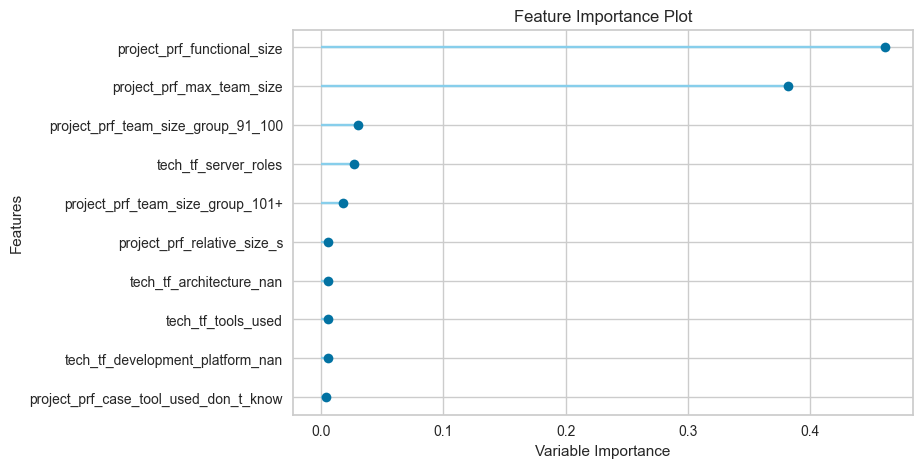

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_feature_importance_model_1_GradientBoostingRegressor.png

Model 2: ExtraTreesRegressor


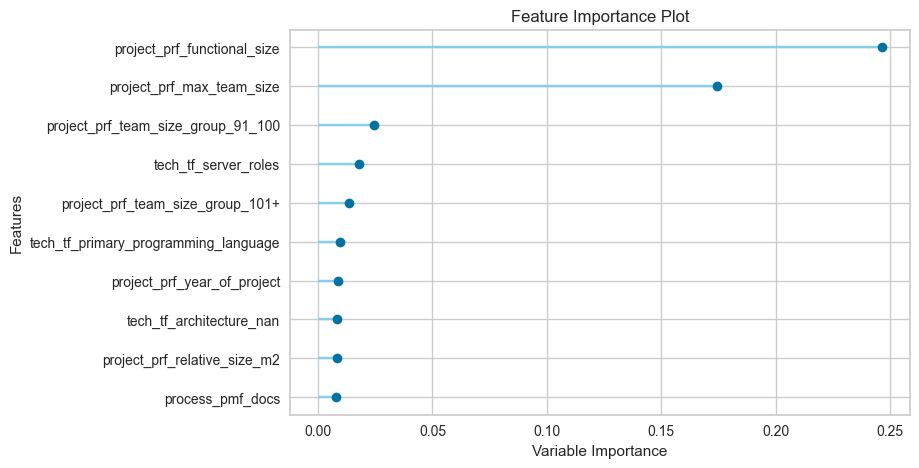

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_feature_importance_model_2_ExtraTreesRegressor.png

Model 3: RandomForestRegressor


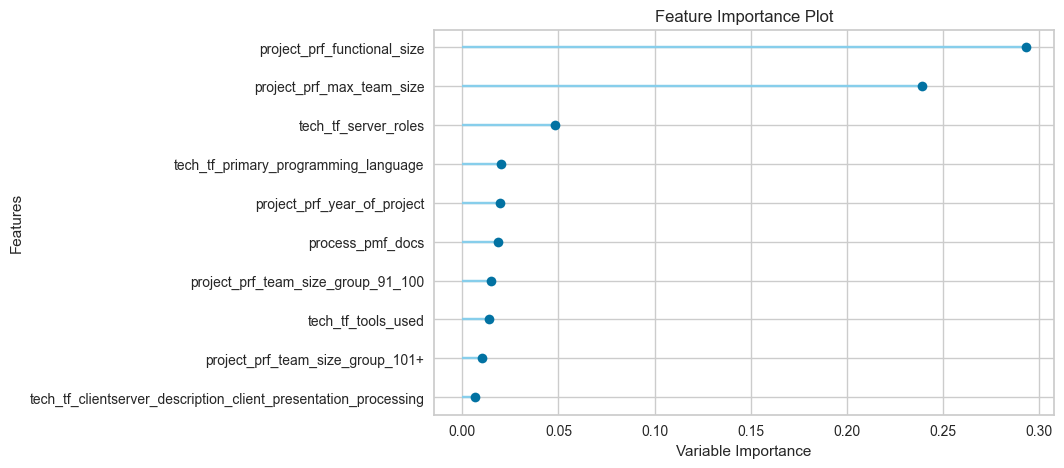

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_feature_importance_model_3_RandomForestRegressor.png
Cell executed at: 2025-06-05 15:00:22.541786


In [42]:
# code modified for top 3 models

from pycaret.regression import plot_model
import os
import matplotlib.pyplot as plt

pycaret_X=X
pycaret_y = y

os.makedirs(plots_folder, exist_ok=True)
feature_names = pycaret_X.columns.tolist()  # Make sure to use the same data as in training
print(f"All features: {feature_names}")


for i, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {i}: {model_name}")

    # First try PyCaret's plot_model
    try:
        plot_model(tuned_model, plot='feature', save=False)
        plt.savefig(f'{plots_folder}/{file_name_no_ext}_feature_importance_model_{i}_{model_name}.png')
        plt.show()
        plt.close()
        print(f"  PyCaret feature importance plot saved to {plots_folder}/{file_name_no_ext}_feature_importance_model_{i}_{model_name}.png")
    except Exception as e:
        print(f"  PyCaret plot_model failed: {e}")
        # Fallback for linear models with coefficients
        try:
            # If it's a linear model (like HuberRegressor, LinearRegression, etc.)
            if hasattr(tuned_model, 'coef_'):
                importance_df = plot_linear_feature_importance(
                    tuned_model, pycaret_X, pycaret_y, 
                    feature_names=feature_names, 
                    method='coefficients'
                )
                print("  Custom coefficient-based feature importance plot saved.")
                print("  All important features:")
                print(importance_df)
            else:
                print("  This model does not support .coef_ or is not a linear model.")
        except Exception as e2:
            print(f"  Could not generate feature plot for linear model: {e2}")

    # Optionally: also plot permutation-based feature importance for all linear models
    if hasattr(tuned_model, 'coef_'):
        print("\n  Generating permutation-based feature importance plot...")
        try:
            importance_df_perm = plot_linear_feature_importance(
                tuned_model, pycaret_X, pycaret_y, 
                feature_names=feature_names, 
                method='permutation'
            )
            print("  Allimportant features (permutation):")
            print(importance_df_perm)
        except Exception as e:
            print(f"  Could not generate permutation feature plot: {e}")


[Back to top](#Index:)

<a id='part9'></a>

# Part 9 - SHAP Analysis

xxx


==================== MODEL 1 ====================
SHAP already installed
Plots will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Starting SHAP Analysis...
Data shape: (10000, 182)
Using 100 samples for analysis
Model type: GradientBoostingRegressor
Using TreeExplainer

SHAP PLOTS
Summary plot saved to: ../plots/shap_summary_GradientBoostingRegressor.png


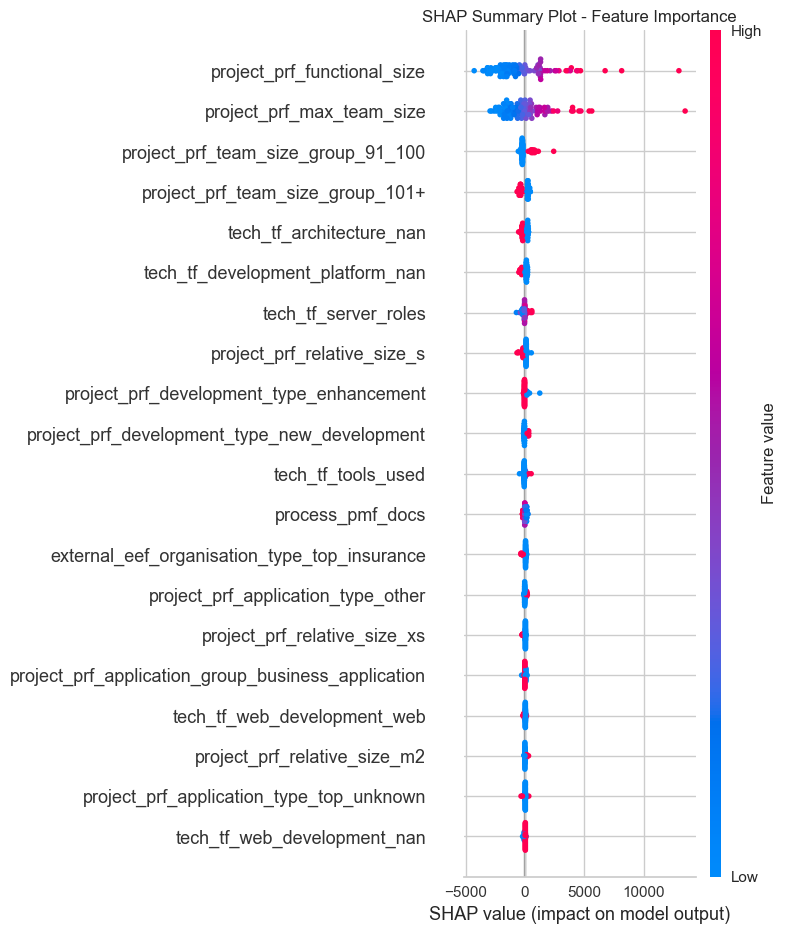

Summary plot created
Bar plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_importance_bar_GradientBoostingRegressor.png


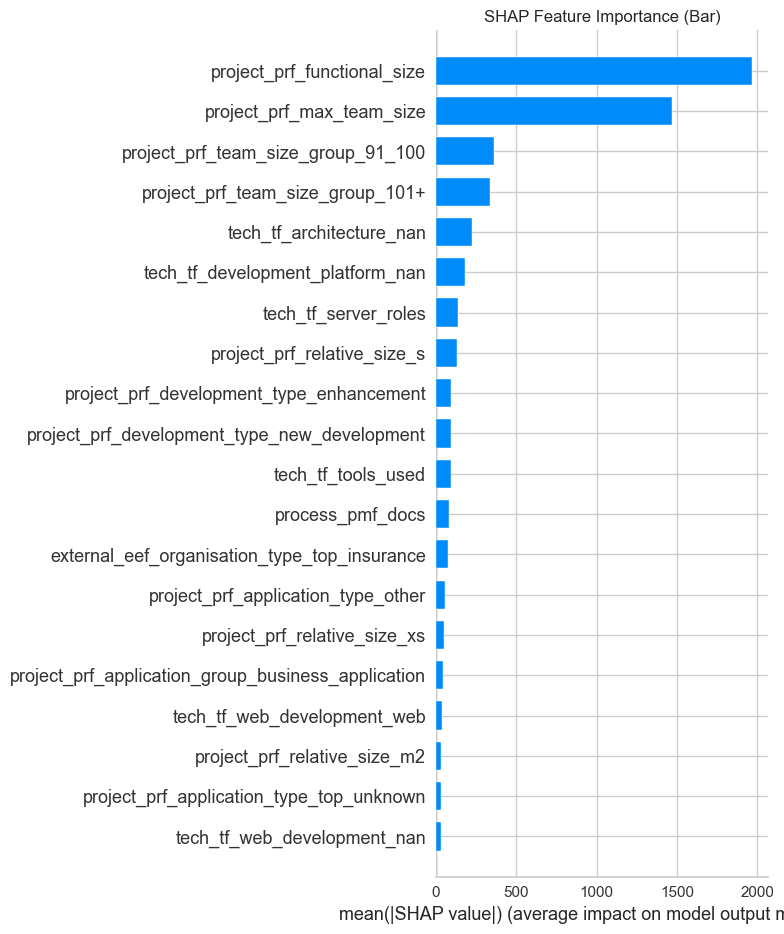

Bar plot created
Dependence plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_dependence_project_prf_functional_size_GradientBoostingRegressor.png


<Figure size 1000x600 with 0 Axes>

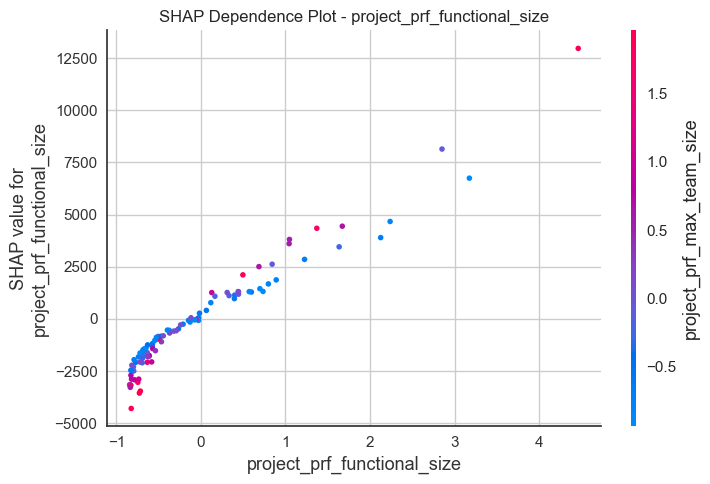

Dependence plot for 'project_prf_functional_size' created
Using modern waterfall plot...
Waterfall plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_waterfall_GradientBoostingRegressor.png


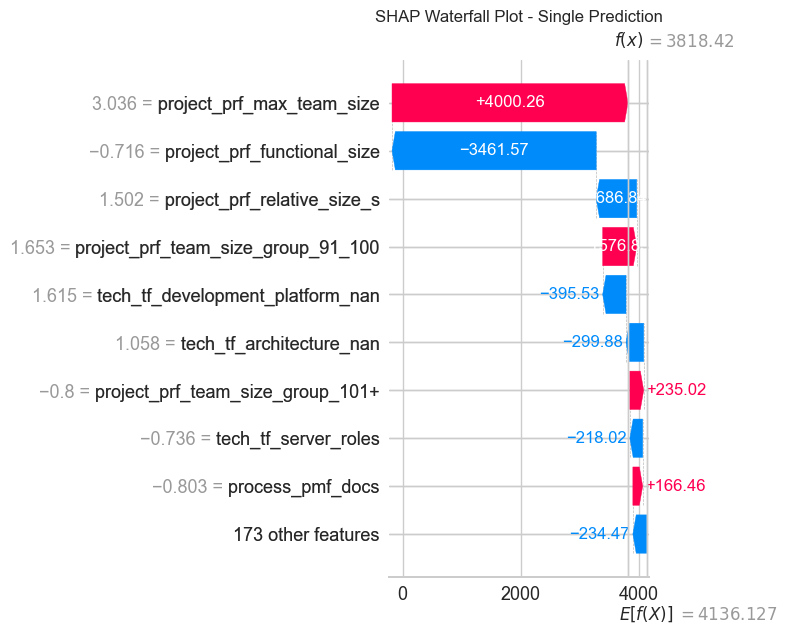

Waterfall plot created

All plots saved to folder: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots

SHAP Analysis Complete!

==================== MODEL 2 ====================
SHAP already installed
Plots will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Starting SHAP Analysis...
Data shape: (10000, 182)
Using 100 samples for analysis
Model type: ExtraTreesRegressor
Using TreeExplainer

SHAP PLOTS
Summary plot saved to: ../plots/shap_summary_ExtraTreesRegressor.png


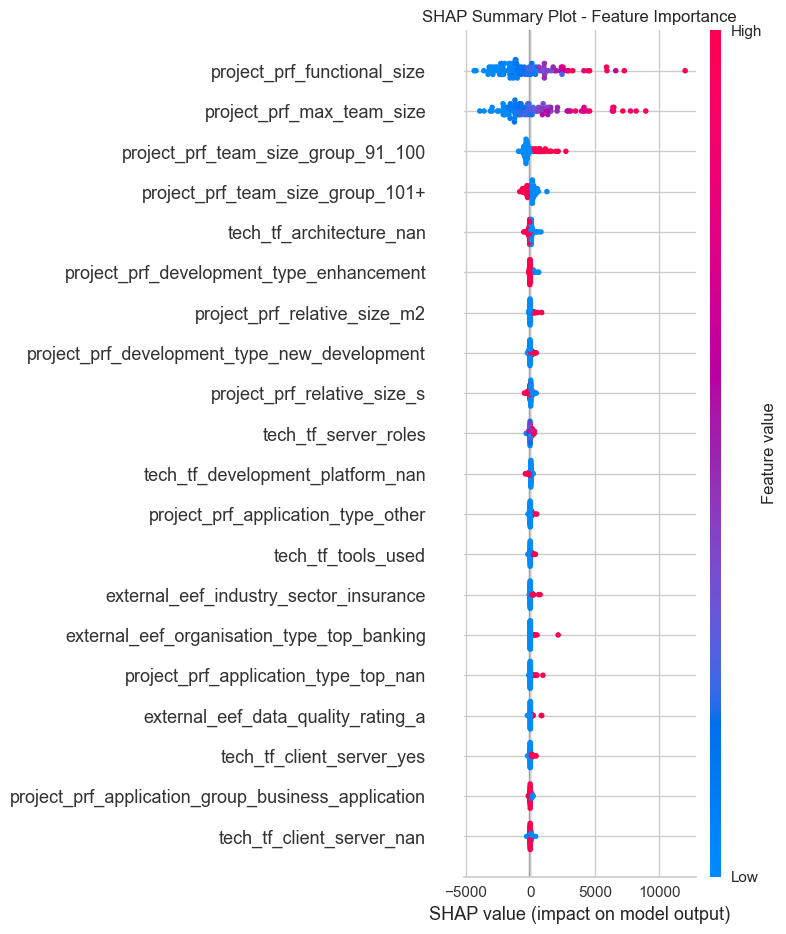

Summary plot created
Bar plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_importance_bar_ExtraTreesRegressor.png


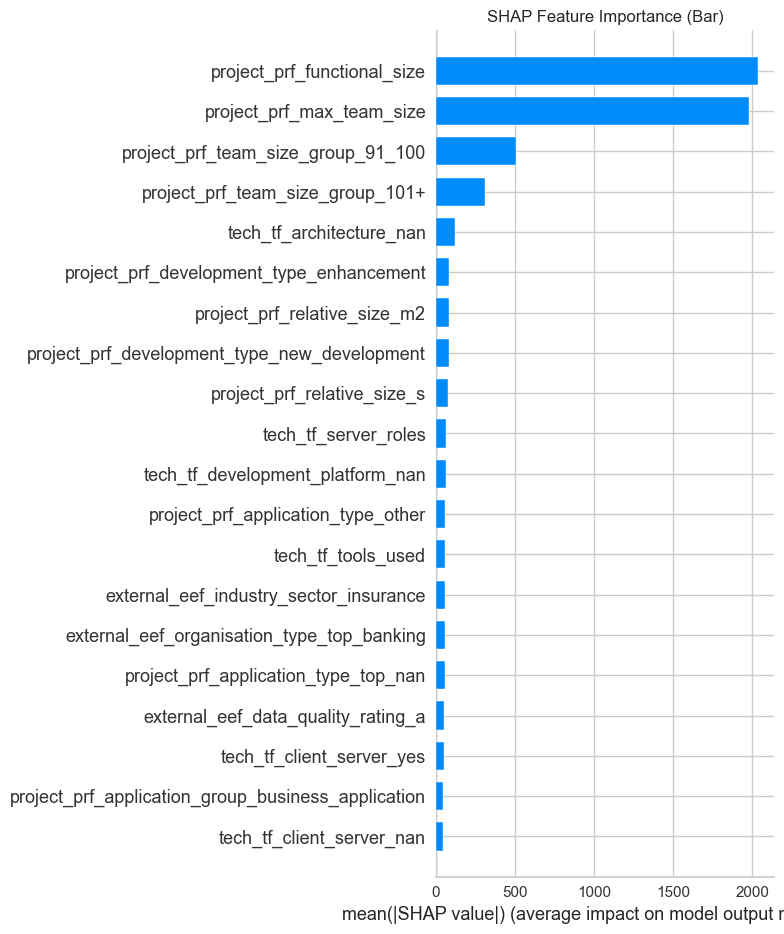

Bar plot created
Dependence plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_dependence_project_prf_functional_size_ExtraTreesRegressor.png


<Figure size 1000x600 with 0 Axes>

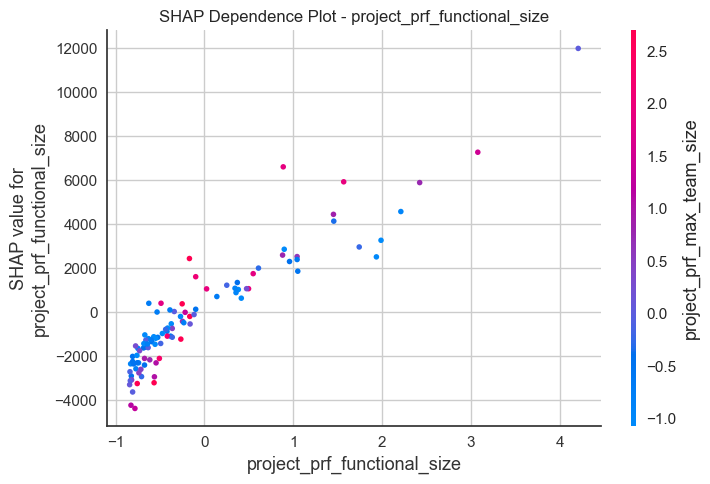

Dependence plot for 'project_prf_functional_size' created
Using modern waterfall plot...
Waterfall plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_waterfall_ExtraTreesRegressor.png


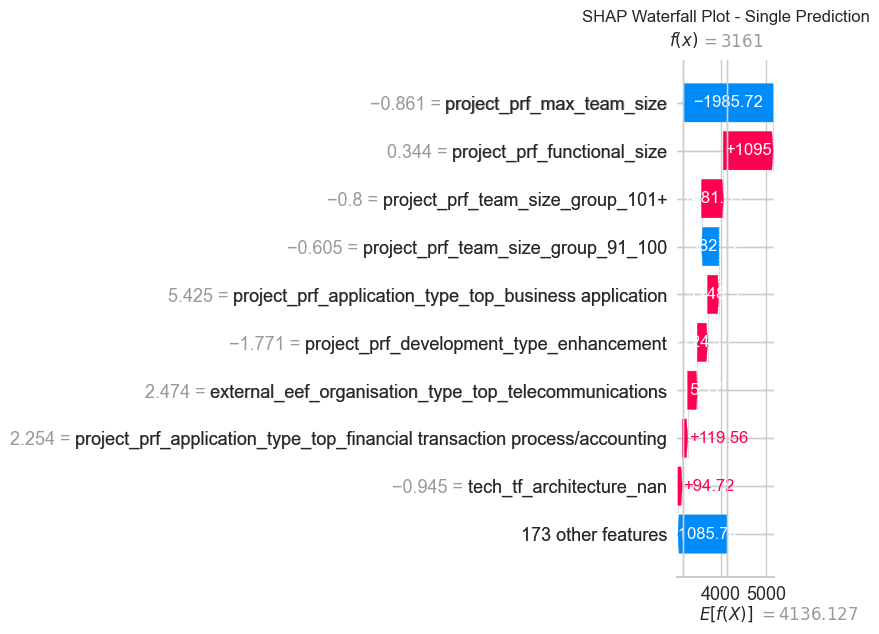

Waterfall plot created

All plots saved to folder: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots

SHAP Analysis Complete!

==================== MODEL 3 ====================
SHAP already installed
Plots will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Starting SHAP Analysis...
Data shape: (10000, 182)
Using 100 samples for analysis
Model type: RandomForestRegressor
Using TreeExplainer

SHAP PLOTS
Summary plot saved to: ../plots/shap_summary_RandomForestRegressor.png


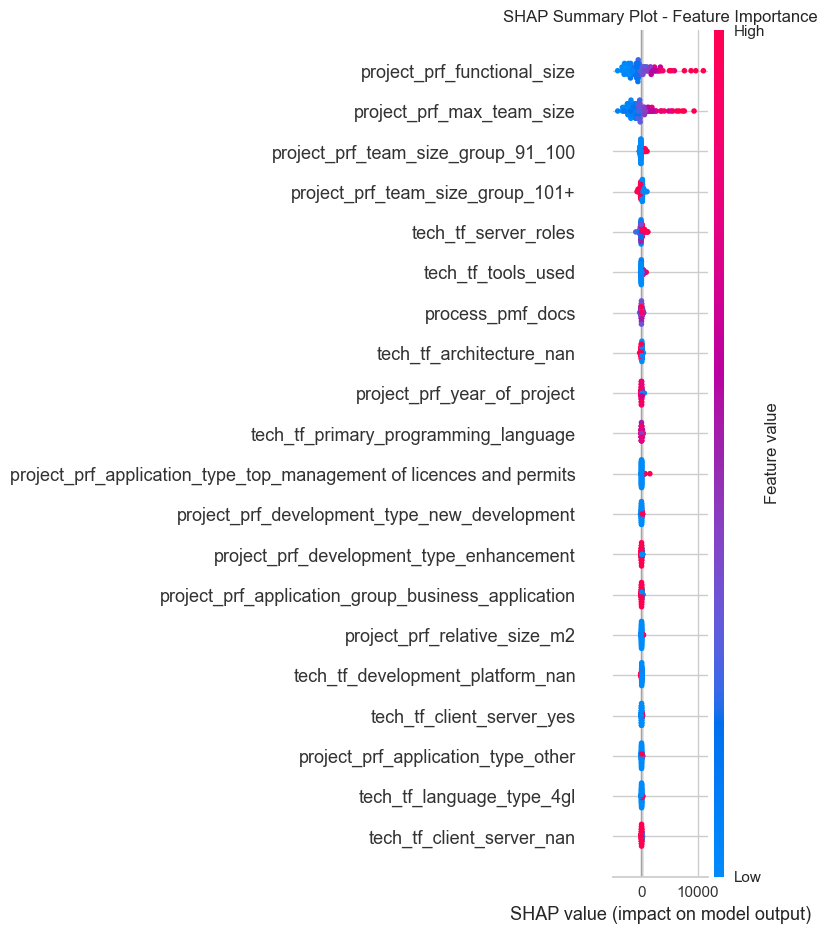

Summary plot created
Bar plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_importance_bar_RandomForestRegressor.png


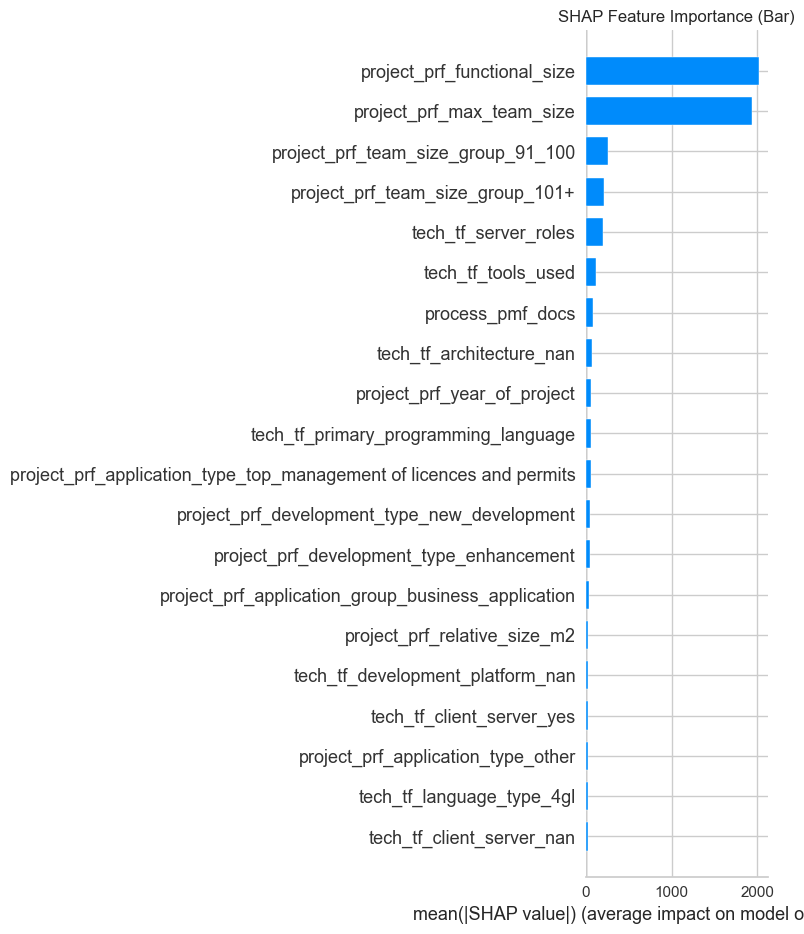

Bar plot created
Dependence plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_dependence_project_prf_functional_size_RandomForestRegressor.png


<Figure size 1000x600 with 0 Axes>

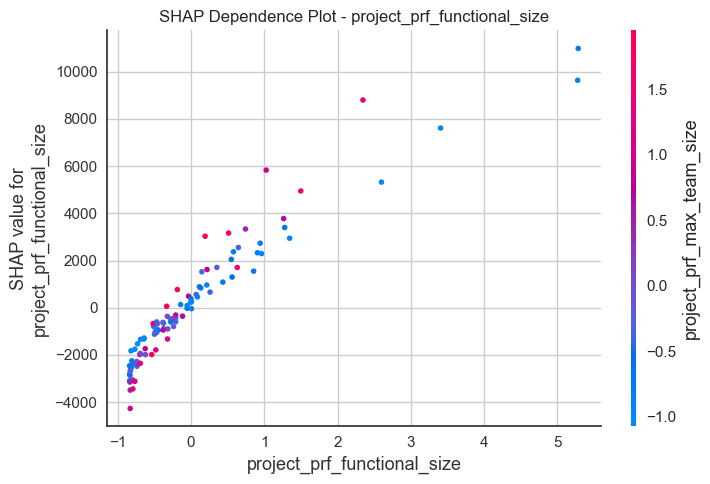

Dependence plot for 'project_prf_functional_size' created
Using modern waterfall plot...
Waterfall plot saved to: ../plots/synthetic_ISBSG2016R1_1_agile_SDV_generated_shap_waterfall_RandomForestRegressor.png


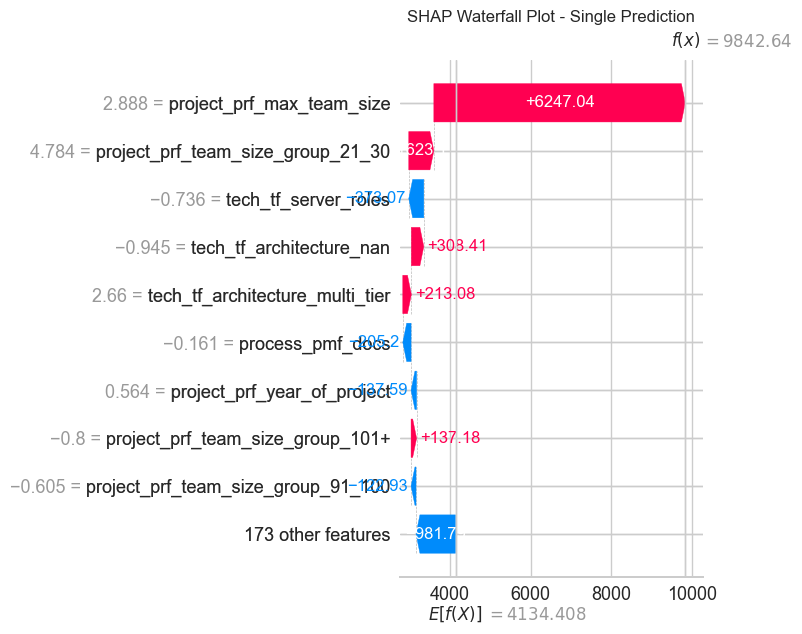

Waterfall plot created

All plots saved to folder: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots

SHAP Analysis Complete!
Cell executed at: 2025-06-05 15:03:37.397372


In [43]:
# SHAP analysis with proper data type handling and debugging
"""
Global Perspective:
- Summary Plot: Provides a global overview of feature importance and their 
  positive or negative impact on the model output across the entire dataset.
- Dependence Plot: Illustrates the relationship between a single feature's 
  value and its SHAP value across all instances to understand its general 
  effect on the prediction.
- Bar Chart: Shows the global importance of each feature based on the average 
  magnitude of their SHAP values across the entire dataset.

Single Instance Perspective:
- Force Plot: Explains the prediction for a single instance by showing how each 
  feature contributes to moving the prediction from the base value for that specific case.
- Waterfall Plot: Explains the prediction for a single instance by visualizing the sequential, 
  additive contribution of each feature's SHAP value for that specific prediction.
"""

def install_shap():
    """Install SHAP if not available"""
    try:
        import shap
        print("SHAP already installed")
        return True
    except ImportError:
        print("Installing SHAP...")
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
        import shap
        print("SHAP installed successfully")
        return True

def shap_analysis(model, X_data, feature_names=None, sample_size=100, save_plots=True, plots_folder='plots'):
    """
    Simplified SHAP analysis with essential plots
    
    Parameters:
    - model: trained model
    - X_data: feature data (DataFrame or array)
    - feature_names: list of feature names (optional)
    - sample_size: number of samples for analysis (default: 100)
    - save_plots: whether to save plots to folder (default: True)
    - plots_folder: folder name to save plots (default: 'plots')
    """
    
    # Install SHAP if needed
    install_shap()
    import shap
    import os
    
    # Create plots folder if saving is enabled
    if save_plots:
        os.makedirs(plots_folder, exist_ok=True)
        print(f"Plots will be saved to: {os.path.abspath(plots_folder)}")
    
    print("Starting SHAP Analysis...")
    print(f"Data shape: {X_data.shape}")
    
    # Prepare data
    if hasattr(X_data, 'columns') and feature_names is None:
        feature_names = X_data.columns.tolist()
    elif feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(X_data.shape[1])]
    
    # Sample data for efficiency
    if X_data.shape[0] > sample_size:
        sample_idx = np.random.choice(X_data.shape[0], sample_size, replace=False)
        X_sample = X_data.iloc[sample_idx] if hasattr(X_data, 'iloc') else X_data[sample_idx]
        print(f"Using {sample_size} samples for analysis")
    else:
        X_sample = X_data
    
    # Convert to float for SHAP
    try:
        X_sample = X_sample.astype(float)
    except:
        print("Could not convert to float, using original data")
    
    # Choose appropriate explainer
    model_type = str(type(model)).lower()
    print(f"Model type: {type(model).__name__}")
    
    # Track explainer type for waterfall plot handling
    explainer_type = None
    
    try:
        if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradient']):
            print("Using TreeExplainer")
            explainer = shap.TreeExplainer(model)
            shap_values = explainer(X_sample)
            explainer_type = 'tree'
        elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso']):
            print("Using LinearExplainer")
            explainer = shap.LinearExplainer(model, X_sample)
            shap_values = explainer(X_sample)
            explainer_type = 'linear'
        else:
            print("Using Explainer (auto-detect)")
            explainer = shap.Explainer(model, X_sample)
            shap_values = explainer(X_sample)
            explainer_type = 'auto'
    except Exception as e:
        print(f"Auto-explainer failed, using KernelExplainer: {e}")
        explainer = shap.KernelExplainer(model.predict, X_sample[:10])  # Smaller background
        shap_values = explainer.shap_values(X_sample)
        explainer_type = 'kernel'
    
    # Extract SHAP values array
    shap_array = shap_values.values if hasattr(shap_values, 'values') else shap_values
    
    # Get model name for file naming
    model_name = type(model).__name__
    
    print("\n" + "="*50)
    print("SHAP PLOTS")
    print("="*50)
    
    # 1. Summary Plot (Global Feature Importance)
    try:
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_array, X_sample, feature_names=feature_names, show=False)
        plt.title("SHAP Summary Plot - Feature Importance")
        plt.tight_layout()
        if save_plots:
            summary_path = f'{plots_folder}/shap_summary_{model_name}.png'
            plt.savefig(summary_path, dpi=300, bbox_inches='tight')
            print(f"Summary plot saved to: {summary_path}")
        plt.show()
        print("Summary plot created")
    except Exception as e:
        print(f"Summary plot failed: {e}")
    
    # 2. Bar Plot (Feature Importance)
    try:
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_array, X_sample, feature_names=feature_names, 
                         plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar)")
        plt.tight_layout()
        if save_plots:
            bar_path = f'{plots_folder}/{file_name_no_ext}_shap_importance_bar_{model_name}.png'
            plt.savefig(bar_path, dpi=300, bbox_inches='tight')
            print(f"Bar plot saved to: {bar_path}")
        plt.show()
        print("Bar plot created")
    except Exception as e:
        print(f"Bar plot failed: {e}")
    
    # 3. Dependence Plot for top feature
    try:
        # Find most important feature
        mean_shap = np.abs(shap_array).mean(0)
        top_feature_idx = np.argmax(mean_shap)
        top_feature = feature_names[top_feature_idx]
        
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(top_feature_idx, shap_array, X_sample, 
                           feature_names=feature_names, show=False)
        plt.title(f"SHAP Dependence Plot - {top_feature}")
        plt.tight_layout()
        if save_plots:
            dep_path = f'{plots_folder}/{file_name_no_ext}_shap_dependence_{top_feature}_{model_name}.png'
            plt.savefig(dep_path, dpi=300, bbox_inches='tight')
            print(f"Dependence plot saved to: {dep_path}")
        plt.show()
        print(f"Dependence plot for '{top_feature}' created")
    except Exception as e:
        print(f"Dependence plot failed: {e}")
    
    # 4. Waterfall Plot for first instance - FIXED VERSION
    try:
        plt.figure(figsize=(10, 6))
        
        if explainer_type == 'kernel':
            # For KernelExplainer, create proper Explanation object
            print("Creating waterfall plot for KernelExplainer...")
            
            # Get the first instance data
            first_instance = X_sample.iloc[0] if hasattr(X_sample, 'iloc') else X_sample[0]
            first_shap = shap_array[0]
            
            # Create Explanation object manually
            explanation = shap.Explanation(
                values=first_shap,
                base_values=explainer.expected_value,
                data=first_instance,
                feature_names=feature_names
            )
            
            shap.plots.waterfall(explanation, show=False)
            
        elif hasattr(shap_values, '__getitem__') and hasattr(shap_values, 'base_values'):
            # For newer SHAP versions with Explanation objects
            print("Using modern waterfall plot...")
            shap.plots.waterfall(shap_values[0], show=False)
            
        else:
            # Fallback for older versions or different explainer types
            print("Using legacy waterfall plot...")
            base_val = getattr(explainer, 'expected_value', 0)
            if hasattr(base_val, '__getitem__'):
                base_val = base_val[0] if len(base_val) > 0 else 0
                
            first_instance = X_sample.iloc[0] if hasattr(X_sample, 'iloc') else X_sample[0]
            
            shap.waterfall_plot(
                base_val, 
                shap_array[0], 
                first_instance,
                feature_names=feature_names,
                show=False
            )
        
        plt.title("SHAP Waterfall Plot - Single Prediction")
        plt.tight_layout()
        if save_plots:
            waterfall_path = f'{plots_folder}/{file_name_no_ext}_shap_waterfall_{model_name}.png'
            plt.savefig(waterfall_path, dpi=300, bbox_inches='tight')
            print(f"Waterfall plot saved to: {waterfall_path}")
        plt.show()
        print("Waterfall plot created")
        
    except Exception as e:
        print(f"Waterfall plot failed: {e}")
        # Alternative: Force plot as backup
        try:
            print("Attempting force plot as alternative...")
            plt.figure(figsize=(12, 4))
            base_val = getattr(explainer, 'expected_value', 0)
            if hasattr(base_val, '__getitem__'):
                base_val = base_val[0] if len(base_val) > 0 else 0
            
            first_instance = X_sample.iloc[0] if hasattr(X_sample, 'iloc') else X_sample[0]
            shap.force_plot(base_val, shap_array[0], first_instance, 
                           feature_names=feature_names, matplotlib=True, show=False)
            plt.title("SHAP Force Plot - Single Prediction (Alternative)")
            if save_plots:
                force_path = f'{plots_folder}/{file_name_no_ext}_shap_force_{model_name}.png'
                plt.savefig(force_path, dpi=300, bbox_inches='tight')
                print(f"Force plot saved to: {force_path}")
            plt.show()
            print("Force plot created as alternative")
        except Exception as e2:
            print(f"Both waterfall and force plots failed: {e2}")
    
    if save_plots:
        print(f"\nAll plots saved to folder: {os.path.abspath(plots_folder)}")
    print("\nSHAP Analysis Complete!")
    return shap_values, explainer

# Quick function for single model analysis
def quick_shap(model, X_data, y_data=None, save_plots=True):
    """
    Ultra-simple SHAP analysis - just pass your model and data
    """
    print("Quick SHAP Analysis")
    return shap_analysis(model, X_data, save_plots=save_plots)


# -------- RUN SHAP FOR ALL TUNED MODELS --------

# For a single model (saves plots by default):
#shap_values, explainer = quick_shap(your_model, X_test)

# Without saving plots:
#shap_analysis(your_model, X_test, save_plots=False)

# Custom plots folder:
#shap_analysis(your_model, X_test, plots_folder='my_shap_plots')

# For multiple models:
#models = [model1, model2, model3]  # Your list of models
#for i, model in enumerate(models, 1):
#    print(f"\n{'='*20} MODEL {i} {'='*20}")
#    shap_analysis(model, X_test, sample_size=50, plots_folder=f'plots/model_{i}')

# With PyCaret:
from pycaret.regression import get_config
X_transformed = get_config('X_transformed')

for idx, tuned_model in enumerate(tuned_models, 1):
    print(f"\n{'='*20} MODEL {idx} {'='*20}")
    shap_analysis(tuned_model, X_transformed, plots_folder=plots_folder)


# Function to check what plots were saved
def check_saved_plots(plots_folder=plots_folder):
    """Check what SHAP plots were saved in the folder"""
    import os
    if os.path.exists(plots_folder):
        files = [f for f in os.listdir(plots_folder) if f.endswith('.png')]
        if files:
            print(f"Found {len(files)} SHAP plots in '{plots_folder}':")
            for file in sorted(files):
                print(f"  - {file}")
        else:
            print(f"No plot files found in '{plots_folder}'")
    else:
        print(f"Folder '{plots_folder}' does not exist")

In [44]:
# Extract feature importance directly (if available)
# Feature Importance Extraction - Refined Version
"""
Extract and analyze built-in feature importance from trained models.
This provides quick numerical insights into which features each model considers most important.

Supports:
- Tree-based models: feature_importances_ attribute
- Linear models: coef_ attribute (absolute values)
- Saves results as CSV files for further analysis
"""

def extract_feature_importance(tuned_models, data_folder='feature_analysis', top_n=15):
    """
    Extract built-in feature importance from models
    
    Parameters:
    - tuned_models: list of trained models
    - data_folder: folder to save CSV files (default: 'feature_analysis')
    - top_n: number of top features to display (default: 15)
    """
    
    print("="*60)
    print("FEATURE IMPORTANCE EXTRACTION")
    print("="*60)
    
    from pycaret.regression import get_config
    
    # Create output directory
    os.makedirs(data_folder, exist_ok=True)
    print(f"Feature importance files will be saved to: {os.path.abspath(data_folder)}")
    
    # Get feature names from transformed data
    try:
        feature_names = get_config('X_transformed').columns
        print(f"Total features available: {len(feature_names)}")
    except Exception as e:
        print(f"Could not get feature names from PyCaret config: {e}")
        return
    
    successful_extractions = 0
    
    for idx, tuned_model in enumerate(tuned_models, 1):
        model_name = type(tuned_model).__name__
        print(f"\n{'-'*40}")
        print(f"Model {idx}: {model_name}")
        print(f"{'-'*40}")
        
        try:
            # Determine importance extraction method
            if hasattr(tuned_model, 'feature_importances_'):
                importances = tuned_model.feature_importances_
                importance_label = 'feature_importances_'
                print(f"✓ Using {importance_label} attribute")
                
            elif hasattr(tuned_model, 'coef_'):
                # For linear models, use absolute coefficients
                coef = tuned_model.coef_
                # Handle multi-output case
                if coef.ndim > 1:
                    importances = np.abs(coef).mean(axis=0)
                else:
                    importances = np.abs(coef)
                importance_label = 'coef_ (absolute values)'
                print(f"✓ Using {importance_label}")
                
            else:
                print(f"✗ Feature importance attribute not available for {model_name}")
                print("  Supported attributes: feature_importances_, coef_")
                continue
            
            # Validate lengths match
            if len(feature_names) != len(importances):
                print(f"⚠ Warning: Length mismatch detected!")
                print(f"  Features: {len(feature_names)}, Importances: {len(importances)}")
                min_length = min(len(feature_names), len(importances))
                feature_names_adj = feature_names[:min_length]
                importances_adj = importances[:min_length]
                print(f"  Using first {min_length} elements for both")
            else:
                feature_names_adj = feature_names
                importances_adj = importances
                print(f"✓ Lengths match: {len(feature_names_adj)} features")
            
            # Create feature importance DataFrame
            fi_df = pd.DataFrame({
                'feature': feature_names_adj,
                'importance': importances_adj,
                'model': model_name,
                'importance_type': importance_label
            })
            
            # Sort by importance (descending)
            fi_df = fi_df.sort_values('importance', ascending=False).reset_index(drop=True)
            
            # Add rank
            fi_df['rank'] = range(1, len(fi_df) + 1)
            
            # Display top features
            print(f"\nTop {min(top_n, len(fi_df))} Most Important Features:")
            display_df = fi_df[['rank', 'feature', 'importance']].head(top_n)
            print(display_df.to_string(index=False, float_format='{:.6f}'.format))
            
            # Save to CSV
            output_filename = f"{file_name_no_ext}_feature_importance_model_{idx}_{model_name}.csv"
            output_path = os.path.join(data_folder, output_filename)
            fi_df.to_csv(output_path, index=False)
            
            print(f"✓ Feature importance saved to: '{output_path}'")
            print(f"  Rows saved: {len(fi_df)}")
            print(f"  Importance type: {importance_label}")
            
            successful_extractions += 1
            
        except Exception as e:
            print(f"✗ Failed to extract feature importance for {model_name}")
            print(f"  Error: {str(e)}")
            continue
    
    # Summary
    print(f"\n{'='*60}")
    print("EXTRACTION SUMMARY")
    print(f"{'='*60}")
    print(f"Total models processed: {len(tuned_models)}")
    print(f"Successful extractions: {successful_extractions}")
    print(f"Failed extractions: {len(tuned_models) - successful_extractions}")
    print(f"Output folder: {os.path.abspath(data_folder)}")
    
    return successful_extractions

def compare_feature_importance(data_folder='feature_analysis', top_n=10):
    """
    Compare feature importance across all saved models
    
    Parameters:
    - data_folder: folder containing feature importance CSV files
    - top_n: number of top features to compare
    """
    
    print(f"\n{'='*60}")
    print("FEATURE IMPORTANCE COMPARISON")
    print(f"{'='*60}")
    
    # Find all feature importance files
    if not os.path.exists(data_folder):
        print(f"Folder '{data_folder}' does not exist")
        return
    
    csv_files = [f for f in os.listdir(data_folder) if f.startswith('feature_importance_') and f.endswith('.csv')]
    
    if not csv_files:
        print(f"No feature importance files found in '{data_folder}'")
        return
    
    print(f"Found {len(csv_files)} feature importance files")
    
    # Load and combine all results
    all_importance = []
    
    for file in csv_files:
        file_path = os.path.join(data_folder, file)
        try:
            df = pd.read_csv(file_path)
            all_importance.append(df)
            print(f"✓ Loaded: {file}")
        except Exception as e:
            print(f"✗ Failed to load {file}: {e}")
    
    if not all_importance:
        print("No files could be loaded")
        return
    
    # Combine all DataFrames
    combined_df = pd.concat(all_importance, ignore_index=True)
    
    # Create pivot table for comparison
    pivot_df = combined_df.pivot_table(
        index='feature', 
        columns='model', 
        values='importance', 
        fill_value=0
    )
    
    # Calculate average importance across models
    pivot_df['avg_importance'] = pivot_df.mean(axis=1)
    pivot_df = pivot_df.sort_values('avg_importance', ascending=False)
    
    # Display top features comparison
    print(f"\nTop {top_n} Features - Comparison Across Models:")
    print("-" * 80)
    comparison_df = pivot_df.head(top_n)
    print(comparison_df.to_string(float_format='{:.6f}'.format))
    
    # Save comparison
    comparison_path = os.path.join(data_folder, '{file_name_no_ext}_feature_importance_comparison.csv')
    pivot_df.to_csv(comparison_path)
    print(f"\n✓ Comparison saved to: '{comparison_path}'")
    
    return pivot_df

def check_saved_importance(data_folder='feature_analysis'):
    """Check what feature importance files were saved"""
    
    print(f"\n{'='*60}")
    print("SAVED FEATURE IMPORTANCE FILES")
    print(f"{'='*60}")
    
    if not os.path.exists(data_folder):
        print(f"Folder '{data_folder}' does not exist")
        return
    
    csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
    
    if csv_files:
        print(f"Found {len(csv_files)} CSV files in '{data_folder}':")
        for i, file in enumerate(sorted(csv_files), 1):
            file_path = os.path.join(data_folder, file)
            try:
                df = pd.read_csv(file_path)
                print(f"  {i}. {file} ({len(df)} features)")
            except:
                print(f"  {i}. {file} (could not read)")
    else:
        print(f"No CSV files found in '{data_folder}'")

# -------- USAGE EXAMPLES --------

# Basic usage with your tuned models:
# extract_feature_importance(tuned_models)

# Custom settings:
# extract_feature_importance(tuned_models, data_folder='my_analysis', top_n=20)

# Compare results across models:
# compare_feature_importance()

# Check what files were saved:
# check_saved_importance()

# -------- MAIN EXECUTION --------
# Uncomment to run with your models:


# Run feature importance extraction
successful = extract_feature_importance(tuned_models, data_folder=data_folder, top_n=15)

if successful > 0:
    # Compare importance across models
    comparison_df = compare_feature_importance(data_folder=data_folder, top_n=10)
    
    # Show saved files
    check_saved_importance(data_folder=data_folder)
else:
    print("No feature importance could be extracted from any model")


FEATURE IMPORTANCE EXTRACTION
Feature importance files will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\data
Total features available: 182

----------------------------------------
Model 1: GradientBoostingRegressor
----------------------------------------
✓ Using feature_importances_ attribute
✓ Lengths match: 182 features

Top 15 Most Important Features:
 rank                                                             feature  importance
    1                                         project_prf_functional_size    0.460556
    2                                           project_prf_max_team_size    0.381440
    3                                  project_prf_team_size_group_91_100    0.030619
    4                                                tech_tf_server_roles    0.027269
    5                                    project_prf_team_size_group_101+    0.017633
    6                                         project_prf_relative_size_s    0.006103
    7           

In [45]:
#verifying whether the trained model consider target column as input features

print(f"TARGET_COL value: {TARGET_COL}")


csv_features = pd.read_csv(f"{data_folder}/pycaret_processed_features_before_model_training.csv")
print("Features in CSV file:")
print(csv_features.columns.tolist())
print(f"\nDoes CSV contain target column? {'project_prf_normalised_work_effort' in csv_features.columns}")


for i, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {i}: {model_name}")
    
    # For PyCaret models, try different ways to get feature names
    if hasattr(tuned_model, 'feature_names_in_'):
        features = tuned_model.feature_names_in_
    elif hasattr(tuned_model, 'feature_names_'):
        features = tuned_model.feature_names_
    else:
        # Try to get from the pipeline
        try:
            features = tuned_model[:-1].get_feature_names_out()
        except:
            features = "Could not determine features"
    
    print(f"\n{model_name} expected features:")
    print(features)
    print(f"\nDoes CSV contain target column? {'project_prf_normalised_work_effort' in features}")

TARGET_COL value: project_prf_normalised_work_effort
Features in CSV file:
['project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_team_size_group', 'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 'tech_tf_clientserver_description_client_presentation', 'tech_tf_clientserver_description_client_presentation_processing', 'tech_tf_clientserver_description_client_server_architecture', 'tech_tf_clientserver_desc